<a href="https://www.kaggle.com/code/dataranch/bar-passage-eda-model-comparison?scriptVersionId=106681401" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**BAR Passage Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.

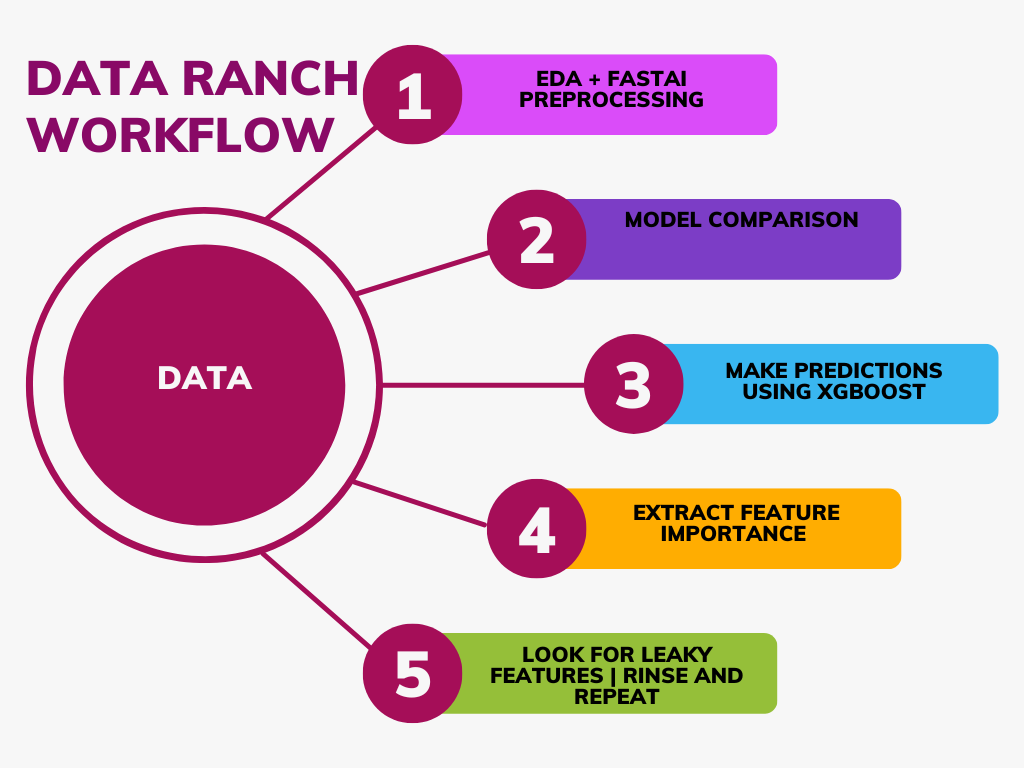

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 7.5 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.2 MB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'law-school-admissions-bar-passage'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/law-school-admissions-bar-passage
CSV!


In [9]:
df

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,hisp,pass_bar,bar,bar_passed,tier,index6040,indxgrp,indxgrp2,dnn_bar_pass_prediction,gpa
0,10.00,10.00,2,10.00,1.00,7.00,1.00,44.00,3.50,1.33,...,0,1,a Passed 1st time,True,4.00,886.84,g 700+,i 820+,0.98,3.50
1,5.00,4.00,3,5.00,1.00,7.00,2.00,29.00,3.50,-0.11,...,0,1,a Passed 1st time,True,2.00,650.00,f 640-700,f 640-700,0.98,3.50
2,3.00,2.00,36,3.00,2.00,7.00,3.00,36.00,3.50,-0.64,...,0,1,a Passed 1st time,True,3.00,760.53,g 700+,h 760-820,0.98,3.50
3,7.00,4.00,52,7.00,2.00,7.00,3.00,39.00,3.50,0.34,...,0,1,a Passed 1st time,True,3.00,807.89,g 700+,h 760-820,0.98,3.50
4,9.00,8.00,55,9.00,2.00,7.00,4.00,48.00,3.50,1.02,...,0,1,a Passed 1st time,True,5.00,950.00,g 700+,i 820+,0.98,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.00,1.00,12520,1.00,2.00,7.00,4.00,40.00,2.60,-1.68,...,0,1,a Passed 1st time,True,5.00,733.68,g 700+,g 700-760,0.97,2.60
19996,9.00,9.00,12530,9.00,2.00,7.00,3.00,32.00,2.60,0.89,...,0,1,a Passed 1st time,True,3.00,607.37,e 580-640,e 580-640,0.97,2.60
19997,6.00,7.00,12562,6.00,2.00,1.00,5.00,43.00,2.60,0.19,...,1,1,a Passed 1st time,True,6.00,781.05,g 700+,h 760-820,0.97,2.60
19998,2.00,1.00,12632,3.00,2.00,3.00,6.00,32.00,2.60,-0.80,...,0,1,a Passed 1st time,True,1.00,607.37,e 580-640,e 580-640,0.97,2.60


In [10]:
df.isna().sum()

decile1b                   1385
decile3                    1385
ID                            0
decile1                     939
sex                           5
race                         12
cluster                      80
lsat                          0
ugpa                          0
zfygpa                      850
DOB_yr                       47
grad                          3
zgpa                       1137
bar1                          0
bar1_yr                      39
bar2                          0
bar2_yr                      40
fulltime                     31
fam_inc                     248
age                          86
gender                        5
parttime                     31
male                          5
race1                        12
race2                        12
Dropout                       0
other                         0
asian                         0
black                         0
hisp                          0
pass_bar                      0
bar     

<AxesSubplot:>

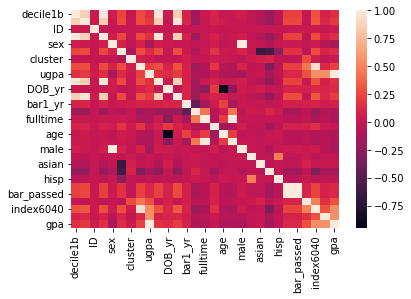

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,DOB_yr,grad,zgpa,bar1,bar1_yr,bar2,bar2_yr,fulltime,fam_inc,age,gender,parttime,male,race1,race2,Dropout,other,asian,black,hisp,pass_bar,bar,bar_passed,tier,index6040,indxgrp,indxgrp2,dnn_bar_pass_prediction,gpa
0,10.00,10.00,2,10.00,1.00,7.00,1.00,44.00,3.50,1.33,69.00,Y,1.88,P,7.00,P,94.00,1.00,5.00,-62.00,female,0.00,0.00,white,b white,NO,0,0,0,0,1,a Passed 1st time,True,4.00,886.84,g 700+,i 820+,0.98,3.50
1,5.00,4.00,3,5.00,1.00,7.00,2.00,29.00,3.50,-0.11,69.00,Y,-0.57,P,7.00,P,94.00,1.00,4.00,-62.00,female,0.00,0.00,white,b white,NO,0,0,0,0,1,a Passed 1st time,True,2.00,650.00,f 640-700,f 640-700,0.98,3.50
2,3.00,2.00,36,3.00,2.00,7.00,3.00,36.00,3.50,-0.64,65.00,Y,-1.12,P,7.00,P,94.00,1.00,1.00,-58.00,male,0.00,1.00,white,b white,NO,0,0,0,0,1,a Passed 1st time,True,3.00,760.53,g 700+,h 760-820,0.98,3.50
3,7.00,4.00,52,7.00,2.00,7.00,3.00,39.00,3.50,0.34,58.00,Y,-0.49,P,7.00,P,94.00,1.00,4.00,-51.00,male,0.00,1.00,white,b white,NO,0,0,0,0,1,a Passed 1st time,True,3.00,807.89,g 700+,h 760-820,0.98,3.50
4,9.00,8.00,55,9.00,2.00,7.00,4.00,48.00,3.50,1.02,68.00,Y,0.76,P,7.00,P,94.00,1.00,4.00,-61.00,male,0.00,1.00,white,b white,NO,0,0,0,0,1,a Passed 1st time,True,5.00,950.00,g 700+,i 820+,0.98,3.50


In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
decile1b,18615.00,5.54,2.84,1.00,3.00,6.00,8.00,10.00
decile3,18615.00,5.55,2.83,1.00,3.00,6.00,8.00,10.00
ID,20000.00,13702.87,7931.41,2.00,6872.75,13652.50,20579.25,27477.00
decile1,19061.00,5.72,2.77,1.00,3.00,6.00,8.00,10.00
sex,19995.00,1.56,0.50,1.00,1.00,2.00,2.00,2.00
race,19988.00,6.49,1.39,1.00,7.00,7.00,7.00,8.00
cluster,19920.00,2.80,1.37,1.00,1.00,3.00,4.00,6.00
lsat,20000.00,36.80,5.39,11.00,33.00,37.00,41.00,48.00
ugpa,20000.00,3.24,0.35,2.20,3.00,3.30,3.50,3.90
zfygpa,19150.00,0.09,0.92,-3.35,-0.55,0.08,0.73,3.25


In [14]:
df.columns

Index(['decile1b', 'decile3', 'ID', 'decile1', 'sex', 'race', 'cluster',
       'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr',
       'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime',
       'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp',
       'pass_bar', 'bar', 'bar_passed', 'tier', 'index6040', 'indxgrp',
       'indxgrp2', 'dnn_bar_pass_prediction', 'gpa'],
      dtype='object')

In [15]:
#remove 'ID' as it's a leaky feature
del(df['ID'])
#remove index6040 as it's also leaky
del(df['index6040'])

Target Variable: gpa
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:00<00:09,  4.48it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9778877153878898, 'Adjusted R-Squared': 0.9776867453686936, 'RMSE': 0.4942941771894518, 'Time taken': 0.2231612205505371}


  7%|▋         | 3/42 [00:00<00:09,  4.12it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.32438182830810547}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999988416159791, 'Adjusted R-Squared': 0.9999988310878739, 'RMSE': 0.0035776262278106393, 'Time taken': 0.19149279594421387}


 10%|▉         | 4/42 [00:00<00:07,  5.01it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1275041103363037}
{'Model': 'DummyRegressor', 'R-Squared': -0.00030119049217192106, 'Adjusted R-Squared': -0.009392541882658811, 'RMSE': 3.3245592667454096, 'Time taken': 0.03226590156555176}
{'Model': 'ElasticNet', 'R-Squared': 0.8217793134152759, 'Adjusted R-Squared': 0.820159534390522, 'RMSE': 1.4032910097119, 'Time taken': 0.046489715576171875}


 19%|█▉        | 8/42 [00:01<00:06,  5.51it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999769311019032, 'Adjusted R-Squared': 0.9999767214375933, 'RMSE': 0.01596548484870582, 'Time taken': 0.5220725536346436}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11634612083435059}


 21%|██▏       | 9/42 [00:03<00:19,  1.70it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.8186938762664795}
{'Model': 'GammaRegressor', 'R-Squared': 0.7968517448539731, 'Adjusted R-Squared': 0.7950054087809468, 'RMSE': 1.498218774173799, 'Time taken': 0.0867917537689209}


 29%|██▊       | 12/42 [01:17<06:02, 12.09s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.683108370359726, 'Adjusted R-Squared': -0.6984054926351488, 'RMSE': 4.312456492256987, 'Time taken': 73.71578407287598}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7875329391159338, 'Adjusted R-Squared': 0.7856019080147406, 'RMSE': 1.5321965911293205, 'Time taken': 0.11087536811828613}


 31%|███       | 13/42 [01:20<04:46,  9.89s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999986077616, 'Adjusted R-Squared': 0.999999998595108, 'RMSE': 0.00012402964463315575, 'Time taken': 3.138045310974121}


 33%|███▎      | 14/42 [01:21<03:33,  7.61s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999975016499, 'Adjusted R-Squared': 0.9999999974789434, 'RMSE': 0.00016614808317709628, 'Time taken': 1.1444344520568848}


 36%|███▌      | 15/42 [01:24<02:47,  6.22s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999996504574975, 'Adjusted R-Squared': 0.9999996472806406, 'RMSE': 0.001965253969840951, 'Time taken': 2.4593913555145264}


 38%|███▊      | 16/42 [01:28<02:30,  5.80s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8263412264353005, 'Adjusted R-Squared': 0.824762908877025, 'RMSE': 1.3852145717197941, 'Time taken': 4.703229188919067}


 40%|████      | 17/42 [01:57<05:09, 12.37s/it]

{'Model': 'KernelRidge', 'R-Squared': -6.93118207010192, 'Adjusted R-Squared': -7.003265522392672, 'RMSE': 9.361331973225324, 'Time taken': 28.852640628814697}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 1.485168851889806e-14, 'Time taken': 0.06299257278442383}


 48%|████▊     | 20/42 [01:57<01:54,  5.23s/it]

{'Model': 'LarsCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 1.485168851889806e-14, 'Time taken': 0.1693406105041504}
{'Model': 'Lasso', 'R-Squared': 0.9089276374141848, 'Adjusted R-Squared': 0.9080999158658158, 'RMSE': 1.0031410164758123, 'Time taken': 0.09909510612487793}


 50%|█████     | 21/42 [01:58<01:24,  4.02s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999989996988096, 'Adjusted R-Squared': 0.9999989906074582, 'RMSE': 0.003324559266740549, 'Time taken': 0.5263035297393799}
{'Model': 'LassoLars', 'R-Squared': -0.00030119049217192106, 'Adjusted R-Squared': -0.009392541882658811, 'RMSE': 3.3245592667454096, 'Time taken': 0.05771923065185547}


 60%|█████▉    | 25/42 [01:58<00:25,  1.50s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 1.485168851889806e-14, 'Time taken': 0.16573429107666016}
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 1.485168851889806e-14, 'Time taken': 0.06651473045349121}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 9.413965232823072e-15, 'Time taken': 0.09173846244812012}


 62%|██████▏   | 26/42 [01:59<00:19,  1.22s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999998259224, 'Adjusted R-Squared': 0.9999999998243402, 'RMSE': 4.385713251453851e-05, 'Time taken': 0.15042710304260254}


 64%|██████▍   | 27/42 [02:17<01:19,  5.29s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9992491795538491, 'Adjusted R-Squared': 0.9992423556366409, 'RMSE': 0.09108287531476394, 'Time taken': 18.71495008468628}


 67%|██████▋   | 28/42 [03:08<03:54, 16.74s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9804103476901005, 'Adjusted R-Squared': 0.9802323049021286, 'RMSE': 0.4652453601271114, 'Time taken': 51.199053049087524}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 7.236730037513693e-15, 'Time taken': 0.041481733322143555}


 71%|███████▏  | 30/42 [03:09<01:57,  9.82s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 7.236730037513693e-15, 'Time taken': 0.16509747505187988}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9998530111807649, 'Adjusted R-Squared': 0.9998516752561265, 'RMSE': 0.040300537386893875, 'Time taken': 0.09526205062866211}


 76%|███████▌  | 32/42 [03:09<01:02,  6.21s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9606337973383302, 'Adjusted R-Squared': 0.9602760131182292, 'RMSE': 0.6595237639199122, 'Time taken': 0.18007183074951172}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999818036373418, 'Adjusted R-Squared': 0.9999816382576256, 'RMSE': 0.014179502012434618, 'Time taken': 0.09372544288635254}


 86%|████████▌ | 36/42 [03:12<00:18,  3.06s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.71494197845459}
{'Model': 'Ridge', 'R-Squared': 0.9999999830067283, 'Adjusted R-Squared': 0.9999999828522831, 'RMSE': 0.0004333184559065813, 'Time taken': 0.05961918830871582}
{'Model': 'RidgeCV', 'R-Squared': 0.9999999998295338, 'Adjusted R-Squared': 0.9999999998279845, 'RMSE': 4.3399803857529467e-05, 'Time taken': 0.0978398323059082}


 88%|████████▊ | 37/42 [03:12<00:12,  2.50s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9999740900405718, 'Adjusted R-Squared': 0.9999738545549521, 'RMSE': 0.016920066014653484, 'Time taken': 0.12561535835266113}


 95%|█████████▌| 40/42 [03:24<00:05,  2.86s/it]

{'Model': 'SVR', 'R-Squared': 0.9798560961860988, 'Adjusted R-Squared': 0.9796730160201558, 'RMSE': 0.47178106473213, 'Time taken': 12.163328647613525}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 9.413965232823072e-15, 'Time taken': 0.0566706657409668}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7875329391159338, 'Adjusted R-Squared': 0.7856019080147406, 'RMSE': 1.5321965911293205, 'Time taken': 0.08945345878601074}


 98%|█████████▊| 41/42 [03:25<00:02,  2.41s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999859578, 'Adjusted R-Squared': 0.9999999999858301, 'RMSE': 1.2456233e-05, 'Time taken': 0.7261903285980225}


100%|██████████| 42/42 [03:26<00:00,  4.91s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992942796, 'Adjusted R-Squared': 0.9999999992878656, 'RMSE': 8.830494520883912e-05, 'Time taken': 0.39174389839172363}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: gpa
gpa
Target Standard Deviation: 3.3141494686610233
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
OrthogonalMatchingPursuitCV                  1.00       1.00  0.00        0.17
RandomForestRegressor                        1.00       1.00  0.00        2.71
OrthogonalMatchingPursuit                    1.00       1.00  0.00        0.04
DecisionTreeRegressor                        1.00       1.00  0.00        0.13
TransformedTargetRegressor                   1.00       1.00  0.00        0.06
ExtraTreeRegressor                           1.00       1.00  0.00        0.12
ExtraTreesRegressor                          1.00       1.00 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,12.284510,10.719498,3.274064,00:15
1,4.143280,3.364062,1.834138,00:16
2,2.265881,11.893962,3.448762,00:15


Better model found at epoch 0 with _rmse value: 3.274064302444458.
Better model found at epoch 1 with _rmse value: 1.8341376781463623.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      11      11.00
1      10      10.00
2       6       6.00
3       5       5.00
4      12      12.00
XGBoost RMSE:  1.2456233e-05


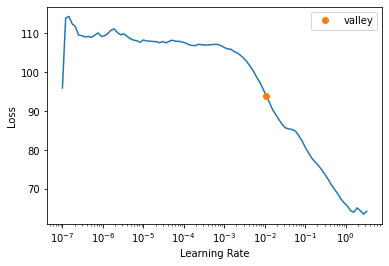

<Figure size 720x720 with 0 Axes>

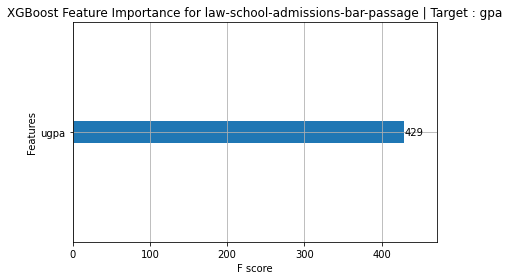

Target Variable: dnn_bar_pass_prediction
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Obje

  2%|▏         | 1/42 [00:02<01:25,  2.08s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8788887773215905, 'Adjusted R-Squared': 0.8777880441692495, 'RMSE': 1.3648628131959497, 'Time taken': 2.0809316635131836}


  5%|▍         | 2/42 [00:02<00:42,  1.06s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.3444788455963135}
{'Model': 'BayesianRidge', 'R-Squared': 0.2832186504408247, 'Adjusted R-Squared': 0.27670410144205415, 'RMSE': 3.3203980889046965, 'Time taken': 0.08450937271118164}


 10%|▉         | 4/42 [00:02<00:17,  2.13it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.15146207809448242}
{'Model': 'DummyRegressor', 'R-Squared': -0.0006003828682890067, 'Adjusted R-Squared': -0.009694453502790079, 'RMSE': 3.923079773092759, 'Time taken': 0.028860807418823242}
{'Model': 'ElasticNet', 'R-Squared': 0.23690859769136008, 'Adjusted R-Squared': 0.22997315449946132, 'RMSE': 3.4259820810642383, 'Time taken': 0.04812312126159668}


 17%|█▋        | 7/42 [00:03<00:12,  2.74it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.2841899773071368, 'Adjusted R-Squared': 0.27768425632330873, 'RMSE': 3.318147552359324, 'Time taken': 0.7811629772186279}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08001542091369629}


 21%|██▏       | 9/42 [00:05<00:19,  1.73it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.857781171798706}
{'Model': 'GammaRegressor', 'R-Squared': 0.2452573415914353, 'Adjusted R-Squared': 0.23839777691011532, 'RMSE': 3.4071892398824217, 'Time taken': 0.07663273811340332}


 26%|██▌       | 11/42 [01:19<06:35, 12.77s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.482601147301318, 'Adjusted R-Squared': -1.5051645508112519, 'RMSE': 6.179456548704983, 'Time taken': 73.76101231575012}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.2520118988119844, 'Adjusted R-Squared': 0.24521372369389083, 'RMSE': 3.3919086822589892, 'Time taken': 0.0947110652923584}


 31%|███       | 13/42 [01:22<04:24,  9.13s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9984628760268391, 'Adjusted R-Squared': 0.9984489057003979, 'RMSE': 0.15376279152171182, 'Time taken': 3.0064735412597656}


 33%|███▎      | 14/42 [01:23<03:33,  7.61s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999983601682, 'Adjusted R-Squared': 0.9999999983452644, 'RMSE': 0.00015881680902165766, 'Time taken': 1.0237987041473389}


 36%|███▌      | 15/42 [01:24<02:50,  6.31s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.282986159277828, 'Adjusted R-Squared': 0.27646949725662173, 'RMSE': 3.3209365380611344, 'Time taken': 1.4717390537261963}


 38%|███▊      | 16/42 [01:29<02:34,  5.96s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.11763257057559984, 'Adjusted R-Squared': 0.1096130736154185, 'RMSE': 3.6840162849794784, 'Time taken': 4.777601480484009}


 43%|████▎     | 18/42 [01:58<03:26,  8.59s/it]

{'Model': 'KernelRidge', 'R-Squared': -5.23040464580218, 'Adjusted R-Squared': -5.287030388606744, 'RMSE': 9.789374289900037, 'Time taken': 28.64859890937805}
{'Model': 'Lars', 'R-Squared': 0.2838384210714924, 'Adjusted R-Squared': 0.277329504928744, 'RMSE': 3.318962274305883, 'Time taken': 0.11886215209960938}


 45%|████▌     | 19/42 [01:58<02:26,  6.36s/it]

{'Model': 'LarsCV', 'R-Squared': 0.28433100787014, 'Adjusted R-Squared': 0.2778265686586593, 'RMSE': 3.317820661665896, 'Time taken': 0.3939950466156006}
{'Model': 'Lasso', 'R-Squared': 0.21299042562390558, 'Adjusted R-Squared': 0.20583759939882618, 'RMSE': 3.479259444700395, 'Time taken': 0.07245850563049316}


 52%|█████▏    | 22/42 [01:59<00:56,  2.85s/it]

{'Model': 'LassoCV', 'R-Squared': 0.28429994391444613, 'Adjusted R-Squared': 0.27779522237466325, 'RMSE': 3.3178926666827393, 'Time taken': 0.5234363079071045}
{'Model': 'LassoLars', 'R-Squared': -0.0006003828682890067, 'Adjusted R-Squared': -0.009694453502790079, 'RMSE': 3.923079773092759, 'Time taken': 0.10708093643188477}


 60%|█████▉    | 25/42 [02:00<00:22,  1.32s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.28398040507817046, 'Adjusted R-Squared': 0.277472779373251, 'RMSE': 3.3186332543371146, 'Time taken': 0.325855016708374}
{'Model': 'LassoLarsIC', 'R-Squared': 0.28433307372414696, 'Adjusted R-Squared': 0.2778286532884159, 'RMSE': 3.317815873042852, 'Time taken': 0.08961272239685059}
{'Model': 'LinearRegression', 'R-Squared': 0.2625870241510766, 'Adjusted R-Squared': 0.25588496226504753, 'RMSE': 3.3678457683695875, 'Time taken': 0.09386277198791504}


 62%|██████▏   | 26/42 [02:01<00:20,  1.31s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.049044289965222365, 'Adjusted R-Squared': -0.05857864857131889, 'RMSE': 4.016924962462271, 'Time taken': 1.2678258419036865}


 64%|██████▍   | 27/42 [02:32<02:10,  8.69s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.33087641132116774, 'Adjusted R-Squared': 0.32479500531449323, 'RMSE': 3.2081153638078446, 'Time taken': 31.07898187637329}


 67%|██████▋   | 28/42 [03:06<03:36, 15.45s/it]

{'Model': 'NuSVR', 'R-Squared': 0.28657128371443674, 'Adjusted R-Squared': 0.28008720550532784, 'RMSE': 3.3126236645329783, 'Time taken': 34.51746845245361}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2851988210643859, 'Adjusted R-Squared': 0.27870226907204, 'RMSE': 3.3158084731089397, 'Time taken': 0.05780744552612305}


 74%|███████▍  | 31/42 [03:07<01:15,  6.84s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.2851988210643859, 'Adjusted R-Squared': 0.27870226907204, 'RMSE': 3.3158084731089397, 'Time taken': 0.18470406532287598}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.911573723954189, 'Adjusted R-Squared': -0.9289472796376907, 'RMSE': 5.4224097578137815, 'Time taken': 0.13094520568847656}


 76%|███████▌  | 32/42 [03:07<00:51,  5.17s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.255316039853577, 'Adjusted R-Squared': 0.24854789479796702, 'RMSE': 3.3844087308354114, 'Time taken': 0.1505415439605713}


 79%|███████▊  | 33/42 [03:07<00:35,  3.91s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.13613803242059253, 'Adjusted R-Squared': -0.14646395243249377, 'RMSE': 4.180347221983252, 'Time taken': 0.4055337905883789}


 81%|████████  | 34/42 [03:10<00:29,  3.66s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.9680705070495605}
{'Model': 'Ridge', 'R-Squared': 0.2830320127360223, 'Adjusted R-Squared': 0.2765157674591975, 'RMSE': 3.320830348437807, 'Time taken': 0.054099082946777344}


 88%|████████▊ | 37/42 [03:11<00:08,  1.63s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.28302650148267083, 'Adjusted R-Squared': 0.2765102061161917, 'RMSE': 3.3208431118404564, 'Time taken': 0.15111017227172852}
{'Model': 'SGDRegressor', 'R-Squared': -10086669.025922958, 'Adjusted R-Squared': -10178342.876196431, 'RMSE': 12455.773828693638, 'Time taken': 0.12197113037109375}


 95%|█████████▌| 40/42 [03:37<00:09,  4.57s/it]

{'Model': 'SVR', 'R-Squared': 0.19475350382743029, 'Adjusted R-Squared': 0.18743492925984317, 'RMSE': 3.5193400258578103, 'Time taken': 25.989149808883667}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.2625870241510766, 'Adjusted R-Squared': 0.25588496226504753, 'RMSE': 3.3678457683695875, 'Time taken': 0.07523918151855469}
{'Model': 'TweedieRegressor', 'R-Squared': 0.2520118988119844, 'Adjusted R-Squared': 0.24521372369389083, 'RMSE': 3.3919086822589892, 'Time taken': 0.11484336853027344}


 98%|█████████▊| 41/42 [03:38<00:03,  3.75s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.999999999926036, 'Adjusted R-Squared': 0.9999999999253638, 'RMSE': 3.3729262e-05, 'Time taken': 1.0116276741027832}


100%|██████████| 42/42 [03:38<00:00,  5.21s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992940686, 'Adjusted R-Squared': 0.9999999992876526, 'RMSE': 0.00010420248556731195, 'Time taken': 0.384885311126709}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: dnn_bar_pass_prediction
dnn_bar_pass_prediction
Target Standard Deviation: 3.9058649749754593
                               Adjusted R-Squared    R-Squared     RMSE  \
Model                                                                     
DecisionTreeRegressor                        1.00         1.00     0.00   
RandomForestRegressor                        1.00         1.00     0.00   
BaggingRegressor                             1.00         1.00     0.00   
ExtraTreeRegressor                           1.00         1.00     0.00   
ExtraTreesRegressor                          1.00         1.00     0.00   
XGBRegressor                                 1.00         1.00     0.00   
LGBMRegressor                                1.00     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,16.210625,13.631909,3.692142,00:16
1,4.028541,3.302895,1.817387,00:15
2,1.517084,1.555122,1.247045,00:15
3,1.049914,1.902366,1.379263,00:19


Better model found at epoch 0 with _rmse value: 3.692141532897949.
Better model found at epoch 1 with _rmse value: 1.8173869848251343.
Better model found at epoch 2 with _rmse value: 1.2470453977584839.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      14      14.00
1       5       5.00
2      13      13.00
3       5       5.00
4       8       8.00
XGBoost RMSE:  3.3729262e-05


<Figure size 432x288 with 0 Axes>

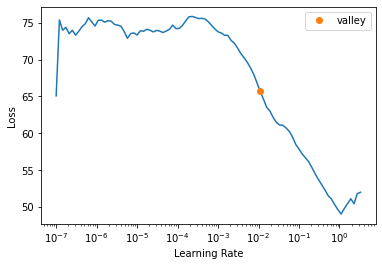

<Figure size 720x720 with 0 Axes>

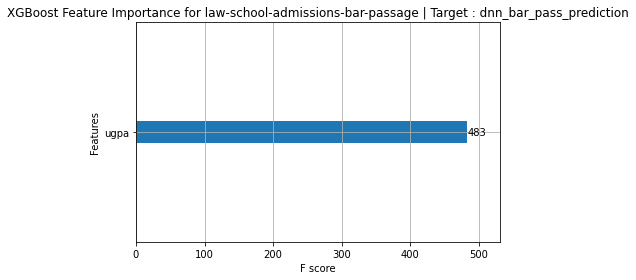

Target Variable: tier
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07135725021362305}


  7%|▋         | 3/42 [00:00<00:06,  6.40it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2641921043395996}
{'Model': 'BayesianRidge', 'R-Squared': 0.37304567769270625, 'Adjusted R-Squared': 0.3673475318701709, 'RMSE': 0.9393899725169684, 'Time taken': 0.1382124423980713}


 10%|▉         | 4/42 [00:00<00:05,  6.69it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.13244128227233887}
{'Model': 'DummyRegressor', 'R-Squared': -0.0004183002790847379, 'Adjusted R-Squared': -0.009510716035218802, 'RMSE': 1.1866394525719275, 'Time taken': 0.028313636779785156}
{'Model': 'ElasticNet', 'R-Squared': 0.01894992897866632, 'Adjusted R-Squared': 0.010033543581855375, 'RMSE': 1.1750965639889077, 'Time taken': 0.04434466361999512}


 19%|█▉        | 8/42 [00:02<00:09,  3.42it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.37297950572659133, 'Adjusted R-Squared': 0.3672807584925992, 'RMSE': 0.9394395452203538, 'Time taken': 1.3257567882537842}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10987973213195801}


 21%|██▏       | 9/42 [00:04<00:22,  1.44it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999632682391885, 'Adjusted R-Squared': 0.9999629343983935, 'RMSE': 0.007190330341869728, 'Time taken': 1.9361624717712402}
{'Model': 'GammaRegressor', 'R-Squared': 0.31198640327998484, 'Adjusted R-Squared': 0.3057333132820246, 'RMSE': 0.9840711053699299, 'Time taken': 0.06740117073059082}


 29%|██▊       | 12/42 [01:20<06:11, 12.40s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.9364282905541605, 'Adjusted R-Squared': -2.972204967772022, 'RMSE': 2.3538519402328637, 'Time taken': 75.78546404838562}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3119238649183437, 'Adjusted R-Squared': 0.3056702065333551, 'RMSE': 0.9841158289019394, 'Time taken': 0.1100618839263916}


 31%|███       | 13/42 [01:23<04:54, 10.14s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.999999999294197, 'Adjusted R-Squared': 0.9999999992877823, 'RMSE': 3.1518803835699974e-05, 'Time taken': 3.190983533859253}


 33%|███▎      | 14/42 [01:23<03:35,  7.69s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999794491664, 'Adjusted R-Squared': 0.9999999792623878, 'RMSE': 0.000170075866106549, 'Time taken': 0.6569497585296631}


 36%|███▌      | 15/42 [01:26<02:47,  6.20s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.3682337130656307, 'Adjusted R-Squared': 0.36249183315408384, 'RMSE': 0.9429880583541052, 'Time taken': 2.1910288333892822}


 38%|███▊      | 16/42 [01:31<02:32,  5.87s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5152544889126423, 'Adjusted R-Squared': 0.5108488240807451, 'RMSE': 0.8260091679713891, 'Time taken': 5.008274078369141}


 43%|████▎     | 18/42 [01:59<03:29,  8.75s/it]

{'Model': 'KernelRidge', 'R-Squared': -15.88234307909709, 'Adjusted R-Squared': -16.03578017852842, 'RMSE': 4.87466000799569, 'Time taken': 28.31324791908264}
{'Model': 'Lars', 'R-Squared': 0.09395790489958922, 'Adjusted R-Squared': 0.08572323804182236, 'RMSE': 1.1292813540940265, 'Time taken': 0.11014986038208008}


 45%|████▌     | 19/42 [01:59<02:24,  6.28s/it]

{'Model': 'LarsCV', 'R-Squared': 0.3367981529066947, 'Adjusted R-Squared': 0.33077056732341803, 'RMSE': 0.9661639596147323, 'Time taken': 0.30585598945617676}
{'Model': 'Lasso', 'R-Squared': -0.0004183002790847379, 'Adjusted R-Squared': -0.009510716035218802, 'RMSE': 1.1866394525719275, 'Time taken': 0.08346319198608398}


 52%|█████▏    | 22/42 [02:01<00:56,  2.84s/it]

{'Model': 'LassoCV', 'R-Squared': 0.3728698309704457, 'Adjusted R-Squared': 0.3671700869449309, 'RMSE': 0.9395217022621863, 'Time taken': 1.2143607139587402}
{'Model': 'LassoLars', 'R-Squared': -0.0004183002790847379, 'Adjusted R-Squared': -0.009510716035218802, 'RMSE': 1.1866394525719275, 'Time taken': 0.12144017219543457}


 55%|█████▍    | 23/42 [02:01<00:42,  2.22s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.3426293073185306, 'Adjusted R-Squared': 0.336654718846798, 'RMSE': 0.9619071184954132, 'Time taken': 0.43647336959838867}
{'Model': 'LassoLarsIC', 'R-Squared': 0.35890872908811633, 'Adjusted R-Squared': 0.3530820979967687, 'RMSE': 0.9499219025196778, 'Time taken': 0.08782577514648438}


 60%|█████▉    | 25/42 [02:01<00:22,  1.32s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.3680594299668437, 'Adjusted R-Squared': 0.3623159660634876, 'RMSE': 0.9431181187509993, 'Time taken': 0.11330151557922363}


 62%|██████▏   | 26/42 [02:04<00:26,  1.67s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.3469971077177658, 'Adjusted R-Squared': 0.3410622164978313, 'RMSE': 0.9587061692079796, 'Time taken': 2.8500497341156006}


 64%|██████▍   | 27/42 [02:27<01:43,  6.91s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9663882224474335, 'Adjusted R-Squared': 0.9660827379758625, 'RMSE': 0.21750723617909196, 'Time taken': 22.619104385375977}


 67%|██████▋   | 28/42 [02:59<03:09, 13.52s/it]

{'Model': 'NuSVR', 'R-Squared': 0.5880987794990744, 'Adjusted R-Squared': 0.584355168305428, 'RMSE': 0.7614204013090784, 'Time taken': 32.03419494628906}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.3335557520689091, 'Adjusted R-Squared': 0.3274986975560287, 'RMSE': 0.9685228728456908, 'Time taken': 0.05675482749938965}


 74%|███████▍  | 31/42 [02:59<01:05,  5.98s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.3544638727727789, 'Adjusted R-Squared': 0.3485968440981564, 'RMSE': 0.9532092449746431, 'Time taken': 0.18695616722106934}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.5939435337048025, 'Adjusted R-Squared': -0.6084302711987113, 'RMSE': 1.4978365905002815, 'Time taken': 0.13170623779296875}


 76%|███████▌  | 32/42 [02:59<00:45,  4.51s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.3739877364326787, 'Adjusted R-Squared': 0.3682981526183834, 'RMSE': 0.938683945628906, 'Time taken': 0.12668466567993164}


 79%|███████▊  | 33/42 [03:00<00:30,  3.44s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.18979446701225833, 'Adjusted R-Squared': 0.18243082167331393, 'RMSE': 1.067887669634989, 'Time taken': 0.4347531795501709}


 86%|████████▌ | 36/42 [03:02<00:10,  1.78s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.1794393062591553}
{'Model': 'Ridge', 'R-Squared': 0.37256721179007235, 'Adjusted R-Squared': 0.3668647173756423, 'RMSE': 0.939748356161766, 'Time taken': 0.047615766525268555}
{'Model': 'RidgeCV', 'R-Squared': 0.3726683039581308, 'Adjusted R-Squared': 0.3669667283313933, 'RMSE': 0.9396726468367969, 'Time taken': 0.14537525177001953}


 88%|████████▊ | 37/42 [03:02<00:06,  1.39s/it]

{'Model': 'SGDRegressor', 'R-Squared': -7926363.187381247, 'Adjusted R-Squared': -7998402.851795719, 'RMSE': 3340.142388536289, 'Time taken': 0.13701939582824707}


 95%|█████████▌| 40/42 [03:24<00:07,  3.86s/it]

{'Model': 'SVR', 'R-Squared': 0.5823965376960585, 'Adjusted R-Squared': 0.5786011010278076, 'RMSE': 0.7666727281771927, 'Time taken': 21.862364292144775}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.3680594299668437, 'Adjusted R-Squared': 0.3623159660634876, 'RMSE': 0.9431181187509993, 'Time taken': 0.05957913398742676}
{'Model': 'TweedieRegressor', 'R-Squared': 0.3119238649183437, 'Adjusted R-Squared': 0.3056702065333551, 'RMSE': 0.9841158289019394, 'Time taken': 0.12076044082641602}


 98%|█████████▊| 41/42 [03:25<00:03,  3.11s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.999999999784968, 'Adjusted R-Squared': 0.9999999997830137, 'RMSE': 1.7397208e-05, 'Time taken': 0.6085264682769775}


100%|██████████| 42/42 [03:25<00:00,  4.90s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.999999999294197, 'Adjusted R-Squared': 0.9999999992877823, 'RMSE': 3.151880381219886e-05, 'Time taken': 0.2608778476715088}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: tier
tier
Target Standard Deviation: 1.1853899141300226
                               Adjusted R-Squared   R-Squared    RMSE  \
Model                                                                   
AdaBoostRegressor                            1.00        1.00    0.00   
ExtraTreeRegressor                           1.00        1.00    0.00   
DecisionTreeRegressor                        1.00        1.00    0.00   
RandomForestRegressor                        1.00        1.00    0.00   
BaggingRegressor                             1.00        1.00    0.00   
XGBRegressor                                 1.00        1.00    0.00   
GradientBoostingRegressor                    1.00        1.00    0.00   
LGBMRegressor                       

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,2.550977,1.896903,1.377281,00:16
1,1.024207,1.985413,1.409047,00:15


Better model found at epoch 0 with _rmse value: 1.3772810697555542.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       3       3.00
1       4       4.00
2       4       4.00
3       4       4.00
4       5       5.00
XGBoost RMSE:  1.7397208e-05


<Figure size 432x288 with 0 Axes>

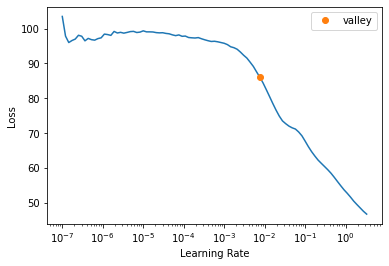

<Figure size 720x720 with 0 Axes>

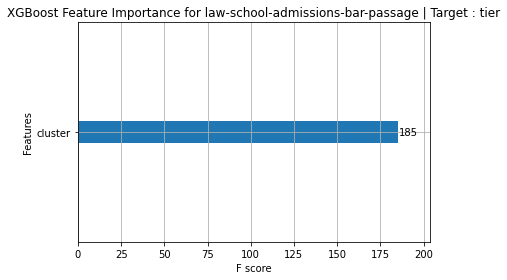

Target Variable: bar_passed
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 1999

  5%|▍         | 2/42 [00:00<00:03, 10.42it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.052978515625}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9991374151311043, 'Adjusted R-Squared': 0.9991295754302004, 'RMSE': 0.006326137052341064, 'Time taken': 0.13881492614746094}


 10%|▉         | 4/42 [00:00<00:03,  9.61it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9965166564446881, 'Adjusted R-Squared': 0.996484997679732, 'RMSE': 0.012712642488103477, 'Time taken': 0.1005556583404541}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11741042137145996}
{'Model': 'DummyRegressor', 'R-Squared': -5.657311689333255e-06, 'Adjusted R-Squared': -0.009094322715178516, 'RMSE': 0.21539663140584825, 'Time taken': 0.027405738830566406}
{'Model': 'ElasticNet', 'R-Squared': -5.657311689333255e-06, 'Adjusted R-Squared': -0.009094322715178516, 'RMSE': 0.21539663140584825, 'Time taken': 0.04181027412414551}


 17%|█▋        | 7/42 [00:01<00:09,  3.68it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9946083127377243, 'Adjusted R-Squared': 0.9945593097734623, 'RMSE': 0.01581612269487476, 'Time taken': 1.1425762176513672}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.994608844569402, 'Adjusted R-Squared': 0.9945598464387528, 'RMSE': 0.01581534263085266, 'Time taken': 0.07538866996765137}


 24%|██▍       | 10/42 [00:02<00:08,  3.98it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9966353798957638, 'Adjusted R-Squared': 0.9966048001624256, 'RMSE': 0.012494120678373605, 'Time taken': 0.5151462554931641}
{'Model': 'GammaRegressor', 'R-Squared': 0.9169683075251704, 'Adjusted R-Squared': 0.916213664523632, 'RMSE': 0.062066838435326344, 'Time taken': 0.12967300415039062}


 26%|██▌       | 11/42 [01:15<08:26, 16.34s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -16.46481738051398, 'Adjusted R-Squared': -16.62354836402787, 'RMSE': 0.9001599845284591, 'Time taken': 73.03805637359619}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9078475815537381, 'Adjusted R-Squared': 0.9070100437945698, 'RMSE': 0.065386945071739, 'Time taken': 0.08616805076599121}


 31%|███       | 13/42 [01:17<05:02, 10.42s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9978573120334533, 'Adjusted R-Squared': 0.9978378379696321, 'RMSE': 0.00997050473102137, 'Time taken': 1.9951913356781006}


 33%|███▎      | 14/42 [01:17<03:50,  8.22s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9946086587101831, 'Adjusted R-Squared': 0.9945596588903312, 'RMSE': 0.015815615244203544, 'Time taken': 0.2760303020477295}


 36%|███▌      | 15/42 [01:20<03:05,  6.87s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9964349060880271, 'Adjusted R-Squared': 0.996402504325636, 'RMSE': 0.012860953437311324, 'Time taken': 2.4978771209716797}


 38%|███▊      | 16/42 [01:24<02:44,  6.32s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9900802740076997, 'Adjusted R-Squared': 0.9899901174473051, 'RMSE': 0.021452974503726255, 'Time taken': 4.689837217330933}


 40%|████      | 17/42 [01:53<05:07, 12.30s/it]

{'Model': 'KernelRidge', 'R-Squared': -81.09120078853898, 'Adjusted R-Squared': -81.83729602418336, 'RMSE': 1.951578310441411, 'Time taken': 28.900510549545288}
{'Model': 'Lars', 'R-Squared': 0.994608844569402, 'Adjusted R-Squared': 0.9945598464387528, 'RMSE': 0.01581534263085267, 'Time taken': 0.05940580368041992}


 45%|████▌     | 19/42 [01:54<02:42,  7.05s/it]

{'Model': 'LarsCV', 'R-Squared': 0.994608844569402, 'Adjusted R-Squared': 0.9945598464387528, 'RMSE': 0.01581534263085267, 'Time taken': 0.17569541931152344}
{'Model': 'Lasso', 'R-Squared': -5.657311689333255e-06, 'Adjusted R-Squared': -0.009094322715178516, 'RMSE': 0.21539663140584825, 'Time taken': 0.061423301696777344}


 52%|█████▏    | 22/42 [01:54<01:11,  3.56s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9946083698111168, 'Adjusted R-Squared': 0.9945593673655728, 'RMSE': 0.015816038984329102, 'Time taken': 0.5921235084533691}
{'Model': 'LassoLars', 'R-Squared': -5.657311689333255e-06, 'Adjusted R-Squared': -0.009094322715178516, 'RMSE': 0.21539663140584825, 'Time taken': 0.11921572685241699}


 60%|█████▉    | 25/42 [01:55<00:28,  1.69s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.994608844569402, 'Adjusted R-Squared': 0.9945598464387528, 'RMSE': 0.01581534263085267, 'Time taken': 0.1769237518310547}
{'Model': 'LassoLarsIC', 'R-Squared': 0.994608844569402, 'Adjusted R-Squared': 0.9945598464387528, 'RMSE': 0.01581534263085267, 'Time taken': 0.0667726993560791}
{'Model': 'LinearRegression', 'R-Squared': 0.9965253665659028, 'Adjusted R-Squared': 0.9964937869638762, 'RMSE': 0.012696738520928634, 'Time taken': 0.07224416732788086}


 62%|██████▏   | 26/42 [01:55<00:21,  1.35s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9965220074959696, 'Adjusted R-Squared': 0.9964903973646531, 'RMSE': 0.012702874265995758, 'Time taken': 0.1514589786529541}


 64%|██████▍   | 27/42 [02:00<00:34,  2.33s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9299250908860762, 'Adjusted R-Squared': 0.92928820708701, 'RMSE': 0.05701891516067277, 'Time taken': 5.415129899978638}


 67%|██████▋   | 28/42 [08:11<22:35, 96.80s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9848336283189565, 'Adjusted R-Squared': 0.9846957870211737, 'RMSE': 0.026526412942836475, 'Time taken': 370.93785643577576}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.994608844569402, 'Adjusted R-Squared': 0.9945598464387528, 'RMSE': 0.01581534263085267, 'Time taken': 0.04527688026428223}


 74%|███████▍  | 31/42 [08:12<07:52, 42.98s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.994608844569402, 'Adjusted R-Squared': 0.9945598464387528, 'RMSE': 0.01581534263085267, 'Time taken': 0.18791460990905762}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9821089216479325, 'Adjusted R-Squared': 0.9819463165429907, 'RMSE': 0.028810841115490104, 'Time taken': 0.09586668014526367}


 76%|███████▌  | 32/42 [08:12<05:23, 32.31s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9404708004352518, 'Adjusted R-Squared': 0.9399297625194903, 'RMSE': 0.05255362770080727, 'Time taken': 0.10634660720825195}


 79%|███████▊  | 33/42 [08:12<03:35, 23.93s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [08:13<00:59,  9.97s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9974332708994923, 'Adjusted R-Squared': 0.9974099428894903, 'RMSE': 0.010912586415288337, 'Time taken': 0.9398698806762695}
{'Model': 'Ridge', 'R-Squared': 0.9965223768593571, 'Adjusted R-Squared': 0.9964907700850417, 'RMSE': 0.012702199724397185, 'Time taken': 0.05739903450012207}
{'Model': 'RidgeCV', 'R-Squared': 0.9965220448396862, 'Adjusted R-Squared': 0.9964904350477722, 'RMSE': 0.012702806069498989, 'Time taken': 0.09718775749206543}


 88%|████████▊ | 37/42 [08:13<00:38,  7.62s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9965366880741184, 'Adjusted R-Squared': 0.9965052113689097, 'RMSE': 0.012676036550982664, 'Time taken': 0.10694527626037598}


 95%|█████████▌| 40/42 [08:15<00:07,  3.52s/it]

{'Model': 'SVR', 'R-Squared': 0.9429774160895299, 'Adjusted R-Squared': 0.9424591598358624, 'RMSE': 0.051435281980496905, 'Time taken': 1.2547035217285156}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9965253665659028, 'Adjusted R-Squared': 0.9964937869638762, 'RMSE': 0.012696738520928634, 'Time taken': 0.0569300651550293}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9078475815537381, 'Adjusted R-Squared': 0.9070100437945698, 'RMSE': 0.065386945071739, 'Time taken': 0.13643670082092285}


100%|██████████| 42/42 [08:15<00:00, 11.81s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9946088613585533, 'Adjusted R-Squared': 0.9945598633804942, 'RMSE': 0.015815318, 'Time taken': 0.497133731842041}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9946088576892567, 'Adjusted R-Squared': 0.9945598596778488, 'RMSE': 0.015815323386821817, 'Time taken': 0.16876482963562012}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: bar_passed
bar_passed
Target Standard Deviation: 0.21431947776268917
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.05
DecisionTreeRegressor                        1.00       1.00  0.00        0.12
BaggingRegressor                             1.00       1.00  0.01        0.14
GradientBoostingRegressor                    1.00       1.00  0.01        2.00
RandomForestRegressor                        1.00 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.291005,0.085913,0.293109,00:15
1,0.073907,0.040136,0.200339,00:15
2,0.034584,0.011812,0.108684,00:15
3,0.016032,0.018202,0.134913,00:16


Better model found at epoch 0 with _rmse value: 0.29310891032218933.
Better model found at epoch 1 with _rmse value: 0.20033948123455048.
Better model found at epoch 2 with _rmse value: 0.10868436098098755.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       2.00
1       2       2.00
2       1       1.00
3       2       2.00
4       2       2.00
XGBoost RMSE:  0.015815318


<Figure size 432x288 with 0 Axes>

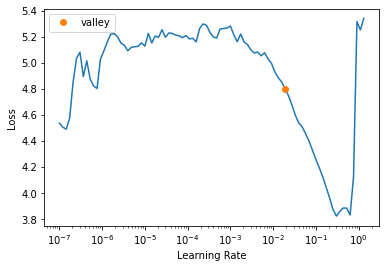

<Figure size 720x720 with 0 Axes>

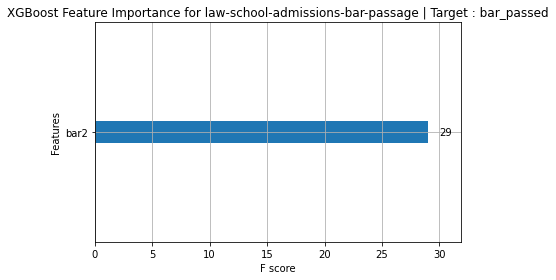

Target Variable: pass_bar
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  5%|▍         | 2/42 [00:00<00:03, 10.58it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04985189437866211}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.13890576362609863}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999999996024009, 'Adjusted R-Squared': 0.9999999995987873, 'RMSE': 4.315806024482943e-06, 'Time taken': 0.06490468978881836}


 10%|▉         | 4/42 [00:00<00:03, 12.65it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06979227066040039}
{'Model': 'DummyRegressor', 'R-Squared': -3.074467323793684e-05, 'Adjusted R-Squared': -0.009119638086072301, 'RMSE': 0.21644419077591714, 'Time taken': 0.05330371856689453}
{'Model': 'ElasticNet', 'R-Squared': -3.074467323793684e-05, 'Adjusted R-Squared': -0.009119638086072301, 'RMSE': 0.21644419077591714, 'Time taken': 0.04413938522338867}


 17%|█▋        | 7/42 [00:01<00:07,  4.59it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999988614599168, 'Adjusted R-Squared': 0.9999988511121655, 'RMSE': 0.00023094758251806965, 'Time taken': 0.884049654006958}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08061432838439941}


 21%|██▏       | 9/42 [00:01<00:08,  4.03it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.5282514095306396}
{'Model': 'GammaRegressor', 'R-Squared': 0.9166890078275352, 'Adjusted R-Squared': 0.9159318263788584, 'RMSE': 0.062472719468804776, 'Time taken': 0.07850456237792969}


 26%|██▌       | 11/42 [01:16<06:26, 12.48s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -17.66695510033481, 'Adjusted R-Squared': -17.8366118495426, 'RMSE': 0.9351386337248646, 'Time taken': 74.22827935218811}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9086693661105922, 'Adjusted R-Squared': 0.9078392972340412, 'RMSE': 0.06541050378878632, 'Time taken': 0.07958650588989258}


 31%|███       | 13/42 [01:18<04:15,  8.80s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992944704, 'Adjusted R-Squared': 0.999999999288058, 'RMSE': 5.749060488090713e-06, 'Time taken': 1.9922025203704834}


 33%|███▎      | 14/42 [01:18<03:21,  7.21s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999994015956408, 'Adjusted R-Squared': 0.9999993961569746, 'RMSE': 0.00016743129348746087, 'Time taken': 0.28064799308776855}


 36%|███▌      | 15/42 [01:21<02:47,  6.22s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9998909156713748, 'Adjusted R-Squared': 0.99988992424602, 'RMSE': 0.0022605829079848177, 'Time taken': 2.5102508068084717}


 38%|███▊      | 16/42 [01:25<02:33,  5.90s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.999359292304857, 'Adjusted R-Squared': 0.9993534691599377, 'RMSE': 0.005478595395149368, 'Time taken': 4.838306665420532}


 40%|████      | 17/42 [01:54<04:47, 11.52s/it]

{'Model': 'KernelRidge', 'R-Squared': -80.32948221586182, 'Adjusted R-Squared': -81.06865448543289, 'RMSE': 1.951925608085647, 'Time taken': 28.512113571166992}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 2.383308551814316e-12, 'Time taken': 0.07105040550231934}


 45%|████▌     | 19/42 [01:54<02:36,  6.79s/it]

{'Model': 'LarsCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 2.383308551814316e-12, 'Time taken': 0.18798112869262695}
{'Model': 'Lasso', 'R-Squared': -3.074467323793684e-05, 'Adjusted R-Squared': -0.009119638086072301, 'RMSE': 0.21644419077591714, 'Time taken': 0.08930301666259766}


 50%|█████     | 21/42 [01:55<01:32,  4.39s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999989830473915, 'Adjusted R-Squared': 0.9999989738047018, 'RMSE': 0.0002182677720364273, 'Time taken': 0.5979077816009521}
{'Model': 'LassoLars', 'R-Squared': -3.074467323793684e-05, 'Adjusted R-Squared': -0.009119638086072301, 'RMSE': 0.21644419077591714, 'Time taken': 0.05793952941894531}


 60%|█████▉    | 25/42 [01:55<00:33,  1.97s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 2.383308551814316e-12, 'Time taken': 0.1692812442779541}
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 2.383308551814316e-12, 'Time taken': 0.06680488586425781}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 2.672421685421147e-16, 'Time taken': 0.07245278358459473}


 62%|██████▏   | 26/42 [01:55<00:25,  1.62s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999975926174, 'Adjusted R-Squared': 0.9999999975707377, 'RMSE': 1.0619689423547852e-05, 'Time taken': 0.1230928897857666}


 64%|██████▍   | 27/42 [02:06<00:52,  3.51s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.969514862679794, 'Adjusted R-Squared': 0.9692377950343692, 'RMSE': 0.037790560727129247, 'Time taken': 10.424042463302612}


 67%|██████▋   | 28/42 [08:11<20:37, 88.43s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9926161472385491, 'Adjusted R-Squared': 0.9925490382510681, 'RMSE': 0.01859862218104759, 'Time taken': 365.2008059024811}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 9.364951760042637e-16, 'Time taken': 0.04834747314453125}


 74%|███████▍  | 31/42 [08:11<07:33, 41.19s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 9.364951760042637e-16, 'Time taken': 0.16557621955871582}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9787694401505844, 'Adjusted R-Squared': 0.9785764837873986, 'RMSE': 0.031536971194610124, 'Time taken': 0.10382676124572754}


 76%|███████▌  | 32/42 [08:11<05:12, 31.27s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9415443593009156, 'Adjusted R-Squared': 0.9410130785472759, 'RMSE': 0.05233020915744827, 'Time taken': 0.10372352600097656}


 79%|███████▊  | 33/42 [08:12<03:30, 23.34s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [08:13<00:59,  9.85s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9421727657318115}
{'Model': 'Ridge', 'R-Squared': 0.9999999975729259, 'Adjusted R-Squared': 0.9999999975508672, 'RMSE': 1.0663033442416524e-05, 'Time taken': 0.04942655563354492}
{'Model': 'RidgeCV', 'R-Squared': 0.9999999999757173, 'Adjusted R-Squared': 0.9999999999754966, 'RMSE': 1.0665647670271803e-06, 'Time taken': 0.0986318588256836}


 88%|████████▊ | 37/42 [08:13<00:37,  7.55s/it]

{'Model': 'SGDRegressor', 'R-Squared': -64852.25887973661, 'Adjusted R-Squared': -65441.68511545247, 'RMSE': 55.11948615326521, 'Time taken': 0.13958454132080078}


 95%|█████████▌| 40/42 [08:14<00:06,  3.50s/it]

{'Model': 'SVR', 'R-Squared': 0.9490848103252013, 'Adjusted R-Squared': 0.9486220618202044, 'RMSE': 0.04883857020655757, 'Time taken': 1.2585539817810059}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 2.672421685421147e-16, 'Time taken': 0.056189537048339844}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9086693661105922, 'Adjusted R-Squared': 0.9078392972340412, 'RMSE': 0.06541050378878632, 'Time taken': 0.10871386528015137}


100%|██████████| 42/42 [08:15<00:00, 11.80s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999987715987, 'Adjusted R-Squared': 0.9999999987604342, 'RMSE': 7.58594e-06, 'Time taken': 0.4986429214477539}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944705, 'Adjusted R-Squared': 0.9999999992880582, 'RMSE': 5.749060266276767e-06, 'Time taken': 0.168290376663208}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: pass_bar
pass_bar
Target Standard Deviation: 0.21392372306077728
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.05
Lars                                         1.00       1.00  0.00        0.07
DecisionTreeRegressor                        1.00       1.00  0.00        0.07
TransformedTargetRegressor                   1.00       1.00  0.00        0.06
RandomForestRegressor                        1.00     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.651943,0.333663,0.577636,00:15
1,0.083850,0.057535,0.239864,00:16
2,0.062107,0.219145,0.468130,00:15


Better model found at epoch 0 with _rmse value: 0.5776360630989075.
Better model found at epoch 1 with _rmse value: 0.23986351490020752.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       2.00
1       2       2.00
2       2       2.00
3       2       2.00
4       2       2.00
XGBoost RMSE:  7.58594e-06


<Figure size 432x288 with 0 Axes>

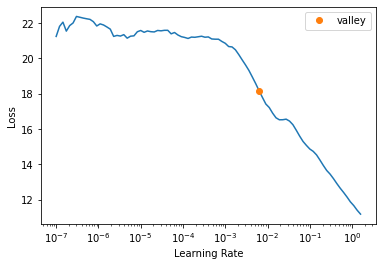

<Figure size 720x720 with 0 Axes>

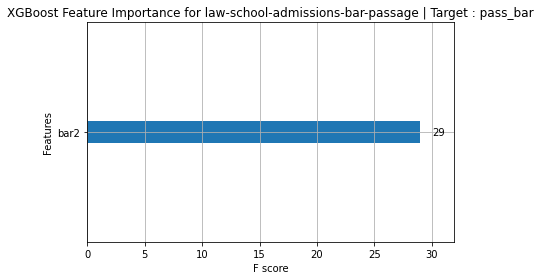

Target Variable: hisp
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  5%|▍         | 2/42 [00:00<00:03, 10.56it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05099749565124512}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.13815069198608398}


 10%|▉         | 4/42 [00:00<00:04,  9.02it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.7891538368398634, 'Adjusted R-Squared': 0.7872375374523943, 'RMSE': 0.025118825657876775, 'Time taken': 0.12419843673706055}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11890482902526855}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005752890540606792, 'Adjusted R-Squared': -0.009669131620570592, 'RMSE': 0.05471940507137442, 'Time taken': 0.02852463722229004}
{'Model': 'ElasticNet', 'R-Squared': -0.0005752890540606792, 'Adjusted R-Squared': -0.009669131620570592, 'RMSE': 0.05471940507137442, 'Time taken': 0.0354619026184082}


 19%|█▉        | 8/42 [00:01<00:07,  4.62it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7895005469996439, 'Adjusted R-Squared': 0.7875873987269822, 'RMSE': 0.02509816477633844, 'Time taken': 0.9788460731506348}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11162590980529785}


 21%|██▏       | 9/42 [00:02<00:09,  3.56it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.4957447052001953}
{'Model': 'GammaRegressor', 'R-Squared': 0.22093792527276812, 'Adjusted R-Squared': 0.21385733080415403, 'RMSE': 0.048283918921202346, 'Time taken': 0.06360125541687012}


 29%|██▊       | 12/42 [01:17<05:55, 11.84s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -82.48387563081958, 'Adjusted R-Squared': -83.24262835051398, 'RMSE': 0.4998247778478811, 'Time taken': 75.41760683059692}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.2219352921056319, 'Adjusted R-Squared': 0.2148637623191645, 'RMSE': 0.0482530021281219, 'Time taken': 0.15255403518676758}


 31%|███       | 13/42 [01:19<04:33,  9.44s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992940862, 'Adjusted R-Squared': 0.9999999992876705, 'RMSE': 1.4534239449687803e-06, 'Time taken': 1.8319363594055176}


 33%|███▎      | 14/42 [01:20<03:21,  7.20s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9981080809975743, 'Adjusted R-Squared': 0.9980908860760678, 'RMSE': 0.0023794016042605897, 'Time taken': 0.6475772857666016}


 36%|███▌      | 15/42 [01:23<02:42,  6.03s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.5325906538010607, 'Adjusted R-Squared': 0.5283425506798384, 'RMSE': 0.037399446645524956, 'Time taken': 2.8213136196136475}


 38%|███▊      | 16/42 [01:27<02:27,  5.66s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9531928416123098, 'Adjusted R-Squared': 0.9527674294179254, 'RMSE': 0.011835118715818134, 'Time taken': 4.6986403465271}


 40%|████      | 17/42 [01:56<05:06, 12.27s/it]

{'Model': 'KernelRidge', 'R-Squared': -336.1227181505791, 'Adjusted R-Squared': -339.18669640188455, 'RMSE': 1.004408756758209, 'Time taken': 29.004595041275024}
{'Model': 'Lars', 'R-Squared': 0.7811694401493053, 'Adjusted R-Squared': 0.7791805736624018, 'RMSE': 0.02559001062143382, 'Time taken': 0.08587384223937988}


 45%|████▌     | 19/42 [01:57<02:38,  6.87s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7893498919030505, 'Adjusted R-Squared': 0.7874353743843708, 'RMSE': 0.02510714458621143, 'Time taken': 0.2991807460784912}
{'Model': 'Lasso', 'R-Squared': -0.0005752890540606792, 'Adjusted R-Squared': -0.009669131620570592, 'RMSE': 0.05471940507137442, 'Time taken': 0.06068754196166992}


 50%|█████     | 21/42 [01:57<01:31,  4.34s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7896551587203028, 'Adjusted R-Squared': 0.787743415653888, 'RMSE': 0.025088945789783542, 'Time taken': 0.6932187080383301}
{'Model': 'LassoLars', 'R-Squared': -0.0005752890540606792, 'Adjusted R-Squared': -0.009669131620570592, 'RMSE': 0.05471940507137442, 'Time taken': 0.07939958572387695}


 60%|█████▉    | 25/42 [01:58<00:32,  1.91s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7896158369702453, 'Adjusted R-Squared': 0.7877037365236229, 'RMSE': 0.02509129073712807, 'Time taken': 0.2796440124511719}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7896158369702453, 'Adjusted R-Squared': 0.7877037365236229, 'RMSE': 0.02509129073712807, 'Time taken': 0.08174490928649902}
{'Model': 'LinearRegression', 'R-Squared': 0.7888918307101669, 'Adjusted R-Squared': 0.7869731500501229, 'RMSE': 0.0251344276563184, 'Time taken': 0.0753326416015625}


 62%|██████▏   | 26/42 [02:01<00:35,  2.22s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.0029962251046316, 'Adjusted R-Squared': -0.012112070624390903, 'RMSE': 0.05478556308470621, 'Time taken': 3.473363161087036}


 64%|██████▍   | 27/42 [02:08<00:47,  3.18s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.5993419590710669, 'Adjusted R-Squared': 0.5957005327965298, 'RMSE': 0.034626086690457386, 'Time taken': 6.6370909214019775}


 67%|██████▋   | 28/42 [02:47<02:44, 11.77s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9511791919880856, 'Adjusted R-Squared': 0.9507354785095629, 'RMSE': 0.01208701224010898, 'Time taken': 39.41303634643555}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7035828490588865, 'Adjusted R-Squared': 0.700888827995044, 'RMSE': 0.029782979650445462, 'Time taken': 0.047745704650878906}


 74%|███████▍  | 31/42 [02:48<01:00,  5.51s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7891953359656774, 'Adjusted R-Squared': 0.7872794137477436, 'RMSE': 0.025116353569725098, 'Time taken': 0.18908405303955078}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.06195778959085341, 'Adjusted R-Squared': 0.053432286037526144, 'RMSE': 0.05298191738524633, 'Time taken': 0.10343790054321289}
{'Model': 'PoissonRegressor', 'R-Squared': 0.23636625514914178, 'Adjusted R-Squared': 0.22942588281522835, 'RMSE': 0.04780342745678742, 'Time taken': 0.08747339248657227}


 79%|███████▊  | 33/42 [02:48<00:31,  3.45s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:49<00:10,  1.82s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9451644420623779}
{'Model': 'Ridge', 'R-Squared': 0.7891920772401846, 'Adjusted R-Squared': 0.7872761254049527, 'RMSE': 0.025116547699645636, 'Time taken': 0.05447554588317871}
{'Model': 'RidgeCV', 'R-Squared': 0.7891329768527118, 'Adjusted R-Squared': 0.7872164878768717, 'RMSE': 0.025120068188007206, 'Time taken': 0.11080241203308105}


 88%|████████▊ | 37/42 [02:49<00:07,  1.46s/it]

{'Model': 'SGDRegressor', 'R-Squared': -1132342123.3718987, 'Adjusted R-Squared': -1142633543.8408177, 'RMSE': 1840.794518173284, 'Time taken': 0.1340498924255371}


 95%|█████████▌| 40/42 [02:51<00:01,  1.20it/s]

{'Model': 'SVR', 'R-Squared': -0.34577825373085824, 'Adjusted R-Squared': -0.35800951279026516, 'RMSE': 0.06346046259706792, 'Time taken': 0.9245016574859619}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7888918307101669, 'Adjusted R-Squared': 0.7869731500501229, 'RMSE': 0.0251344276563184, 'Time taken': 0.05769777297973633}
{'Model': 'TweedieRegressor', 'R-Squared': 0.2219352921056319, 'Adjusted R-Squared': 0.2148637623191645, 'RMSE': 0.0482530021281219, 'Time taken': 0.127838134765625}


 98%|█████████▊| 41/42 [02:51<00:00,  1.31it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999740399602, 'Adjusted R-Squared': 0.9999999738040194, 'RMSE': 8.813921e-06, 'Time taken': 0.509044885635376}


100%|██████████| 42/42 [02:51<00:00,  4.09s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9980689479969929, 'Adjusted R-Squared': 0.9980513974107499, 'RMSE': 0.002403883769132977, 'Time taken': 0.23181796073913574}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: hisp
hisp
Target Standard Deviation: 0.0655360315859322
                               Adjusted R-Squared      R-Squared    RMSE  \
Model                                                                      
AdaBoostRegressor                            1.00           1.00    0.00   
DecisionTreeRegressor                        1.00           1.00    0.00   
RandomForestRegressor                        1.00           1.00    0.00   
BaggingRegressor                             1.00           1.00    0.00   
ExtraTreeRegressor                           1.00           1.00    0.00   
ExtraTreesRegressor                          1.00           1.00    0.00   
GradientBoostingRegressor                    1.00           1.00    0.00   
XGBRegre

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.466655,0.228548,0.478067,00:15
1,0.035418,0.022998,0.151652,00:16
2,0.020454,0.016672,0.129119,00:15
3,0.017165,0.018755,0.136948,00:16


Better model found at epoch 0 with _rmse value: 0.4780667722225189.
Better model found at epoch 1 with _rmse value: 0.1516522765159607.
Better model found at epoch 2 with _rmse value: 0.12911924719810486.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  8.813921e-06


<Figure size 432x288 with 0 Axes>

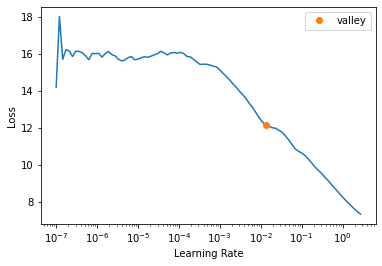

<Figure size 720x720 with 0 Axes>

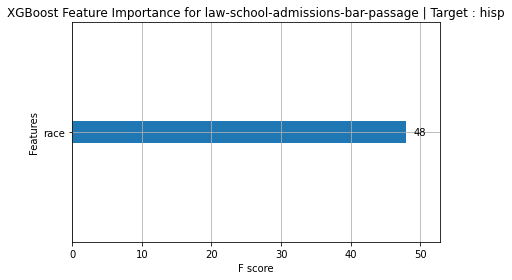

Target Variable: black
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  5%|▍         | 2/42 [00:00<00:03, 10.23it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05207633972167969}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1432514190673828}


 10%|▉         | 4/42 [00:00<00:03, 10.19it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.982227064641009, 'Adjusted R-Squared': 0.9820655332921264, 'RMSE': 0.029199510935938696, 'Time taken': 0.07202649116516113}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12358975410461426}
{'Model': 'DummyRegressor', 'R-Squared': -0.0002721506138256835, 'Adjusted R-Squared': -0.00936323807206807, 'RMSE': 0.21905596591262963, 'Time taken': 0.02879190444946289}
{'Model': 'ElasticNet', 'R-Squared': -0.0002721506138256835, 'Adjusted R-Squared': -0.00936323807206807, 'RMSE': 0.21905596591262963, 'Time taken': 0.04126405715942383}


 19%|█▉        | 8/42 [00:01<00:05,  6.21it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9823768956092009, 'Adjusted R-Squared': 0.9822167260161515, 'RMSE': 0.02907617028942483, 'Time taken': 0.6429629325866699}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0980534553527832}


 21%|██▏       | 9/42 [00:01<00:08,  3.81it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.5934362411499023}
{'Model': 'GammaRegressor', 'R-Squared': 0.7085815257324058, 'Adjusted R-Squared': 0.7059329357112916, 'RMSE': 0.11823730898603142, 'Time taken': 0.07345461845397949}


 29%|██▊       | 12/42 [01:15<05:44, 11.47s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -6.157357089488093, 'Adjusted R-Squared': -6.222407545237037, 'RMSE': 0.5859658949343304, 'Time taken': 73.10925889015198}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7331262383286414, 'Adjusted R-Squared': 0.7307007257257208, 'RMSE': 0.11314853503935804, 'Time taken': 0.12850642204284668}


 31%|███       | 13/42 [01:17<04:27,  9.23s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992943001, 'Adjusted R-Squared': 0.9999999992878862, 'RMSE': 5.818432889283851e-06, 'Time taken': 2.1033573150634766}


 33%|███▎      | 14/42 [01:18<03:18,  7.09s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9985022072162408, 'Adjusted R-Squared': 0.9984885943557977, 'RMSE': 0.00847660339447197, 'Time taken': 0.8744633197784424}


 36%|███▌      | 15/42 [01:20<02:39,  5.93s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9770923516351987, 'Adjusted R-Squared': 0.9768841528618756, 'RMSE': 0.03315020747416881, 'Time taken': 2.7192957401275635}


 38%|███▊      | 16/42 [01:25<02:25,  5.61s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9758073636657659, 'Adjusted R-Squared': 0.9755874861328115, 'RMSE': 0.03406729061937672, 'Time taken': 4.7909626960754395}


 40%|████      | 17/42 [01:54<05:06, 12.27s/it]

{'Model': 'KernelRidge', 'R-Squared': -22.203163731521034, 'Adjusted R-Squared': -22.414048329939302, 'RMSE': 1.0550416365375794, 'Time taken': 29.144846439361572}
{'Model': 'Lars', 'R-Squared': -11.720278981067834, 'Adjusted R-Squared': -11.835888686525658, 'RMSE': 0.7811677672260731, 'Time taken': 0.08958101272583008}


 45%|████▌     | 19/42 [01:55<02:38,  6.88s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8247233587874172, 'Adjusted R-Squared': 0.823130337054609, 'RMSE': 0.09169761033647994, 'Time taken': 0.3421323299407959}
{'Model': 'Lasso', 'R-Squared': -0.0002721506138256835, 'Adjusted R-Squared': -0.00936323807206807, 'RMSE': 0.21905596591262963, 'Time taken': 0.0799705982208252}


 52%|█████▏    | 22/42 [01:56<01:08,  3.42s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9823964376202827, 'Adjusted R-Squared': 0.9822364456370285, 'RMSE': 0.029060044740942113, 'Time taken': 0.641394853591919}
{'Model': 'LassoLars', 'R-Squared': -0.0002721506138256835, 'Adjusted R-Squared': -0.00936323807206807, 'RMSE': 0.21905596591262963, 'Time taken': 0.11617112159729004}


 55%|█████▍    | 23/42 [01:56<00:51,  2.69s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9824029639200018, 'Adjusted R-Squared': 0.9822430312517665, 'RMSE': 0.029054657418222704, 'Time taken': 0.3219642639160156}
{'Model': 'LassoLarsIC', 'R-Squared': 0.982414521315843, 'Adjusted R-Squared': 0.9822546936883172, 'RMSE': 0.029045114580169777, 'Time taken': 0.0961618423461914}


 60%|█████▉    | 25/42 [01:56<00:27,  1.64s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.9822314630106894, 'Adjusted R-Squared': 0.9820699716368911, 'RMSE': 0.029195897627618678, 'Time taken': 0.10587501525878906}


 62%|██████▏   | 26/42 [01:57<00:23,  1.48s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9831068701320262, 'Adjusted R-Squared': 0.9829533349956346, 'RMSE': 0.028467613260707687, 'Time taken': 0.8990478515625}


 64%|██████▍   | 27/42 [02:03<00:38,  2.60s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9343164073185718, 'Adjusted R-Squared': 0.9337194344994525, 'RMSE': 0.056133800452699466, 'Time taken': 6.106548070907593}


 67%|██████▋   | 28/42 [07:05<18:34, 79.58s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9858923087457142, 'Adjusted R-Squared': 0.9857640893856652, 'RMSE': 0.026015008379430465, 'Time taken': 301.8897018432617}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9374573458713292, 'Adjusted R-Squared': 0.9368889198302709, 'RMSE': 0.05477522252543518, 'Time taken': 0.04528188705444336}


 76%|███████▌  | 32/42 [07:05<04:46, 28.64s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9826640733672729, 'Adjusted R-Squared': 0.982506513822012, 'RMSE': 0.028838291472509638, 'Time taken': 0.18549036979675293}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9562273611393428, 'Adjusted R-Squared': 0.9558295285215737, 'RMSE': 0.04582446057832611, 'Time taken': 0.09453749656677246}
{'Model': 'PoissonRegressor', 'R-Squared': 0.7890776705407115, 'Adjusted R-Squared': 0.7871606789071507, 'RMSE': 0.10059057168376945, 'Time taken': 0.09374666213989258}


 79%|███████▊  | 33/42 [07:06<03:23, 22.64s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [07:07<01:03, 10.61s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9855785369873047}
{'Model': 'Ridge', 'R-Squared': 0.9822237372550493, 'Adjusted R-Squared': 0.9820621756648402, 'RMSE': 0.029202244122488463, 'Time taken': 0.0582122802734375}
{'Model': 'RidgeCV', 'R-Squared': 0.9821583752807655, 'Adjusted R-Squared': 0.9819962196408027, 'RMSE': 0.029255882084066615, 'Time taken': 0.12307143211364746}


 88%|████████▊ | 37/42 [07:07<00:41,  8.29s/it]

{'Model': 'SGDRegressor', 'R-Squared': -11791.976802124756, 'Adjusted R-Squared': -11899.15861602945, 'RMSE': 23.785249913177957, 'Time taken': 0.12399864196777344}


 95%|█████████▌| 40/42 [07:09<00:07,  3.99s/it]

{'Model': 'SVR', 'R-Squared': 0.9334239277771129, 'Adjusted R-Squared': 0.9328188435559506, 'RMSE': 0.0565138743388209, 'Time taken': 1.644763708114624}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9822314630106894, 'Adjusted R-Squared': 0.9820699716368911, 'RMSE': 0.029195897627618678, 'Time taken': 0.04954051971435547}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7331262383286414, 'Adjusted R-Squared': 0.7307007257257208, 'RMSE': 0.11314853503935804, 'Time taken': 0.06309723854064941}


 98%|█████████▊| 41/42 [07:09<00:03,  3.20s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999979577765, 'Adjusted R-Squared': 0.9999999979392156, 'RMSE': 9.8980045e-06, 'Time taken': 0.511894702911377}


100%|██████████| 42/42 [07:10<00:00, 10.24s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.998785251268682, 'Adjusted R-Squared': 0.9987742108863726, 'RMSE': 0.007633772690545631, 'Time taken': 0.29460620880126953}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: black
black
Target Standard Deviation: 0.2262908608436907
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.05
ExtraTreesRegressor                          1.00       1.00  0.00        0.59
DecisionTreeRegressor                        1.00       1.00  0.00        0.12
RandomForestRegressor                        1.00       1.00  0.00        0.99
BaggingRegressor                             1.00       1.00  0.00        0.14
ExtraTreeRegressor                           1.00       1.00  0.00        0.10
GradientBoostingRegressor                    1.00       1.0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.474148,0.410121,0.640407,00:15
1,0.075093,0.040566,0.201409,00:15
2,0.051015,0.034191,0.184908,00:16
3,0.020966,0.012563,0.112086,00:16
4,0.009473,0.005562,0.074577,00:16
5,0.012409,0.205462,0.453280,00:16


Better model found at epoch 0 with _rmse value: 0.6404072642326355.
Better model found at epoch 1 with _rmse value: 0.20140905678272247.
Better model found at epoch 2 with _rmse value: 0.18490776419639587.
Better model found at epoch 3 with _rmse value: 0.11208608001470566.
Better model found at epoch 4 with _rmse value: 0.07457705587148666.
No improvement since epoch 4: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  9.8980045e-06


<Figure size 432x288 with 0 Axes>

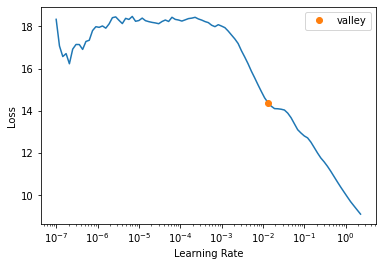

<Figure size 720x720 with 0 Axes>

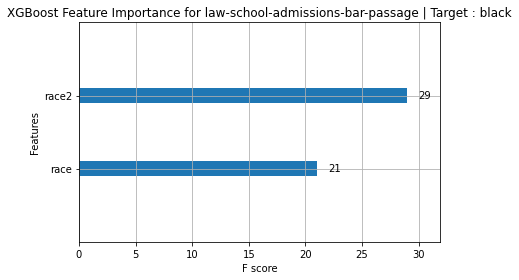

Target Variable: asian
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  5%|▍         | 2/42 [00:00<00:04,  9.95it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05283713340759277}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14802813529968262}


 10%|▉         | 4/42 [00:00<00:03, 10.19it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.8512287353097775, 'Adjusted R-Squared': 0.8498766107127445, 'RMSE': 0.07672344929754644, 'Time taken': 0.06382393836975098}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12711811065673828}
{'Model': 'DummyRegressor', 'R-Squared': -0.00012918703967090828, 'Adjusted R-Squared': -0.009218975157173626, 'RMSE': 0.1989283327470742, 'Time taken': 0.027409791946411133}
{'Model': 'ElasticNet', 'R-Squared': -0.00012918703967090828, 'Adjusted R-Squared': -0.009218975157173626, 'RMSE': 0.1989283327470742, 'Time taken': 0.04372906684875488}


 19%|█▉        | 8/42 [00:01<00:07,  4.45it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8507599634223107, 'Adjusted R-Squared': 0.8494035783385449, 'RMSE': 0.076844230380816, 'Time taken': 1.0763802528381348}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09587383270263672}


 21%|██▏       | 9/42 [00:02<00:10,  3.24it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.5807957649230957}
{'Model': 'GammaRegressor', 'R-Squared': 0.5724843464533744, 'Adjusted R-Squared': 0.5685988217051596, 'RMSE': 0.1300602554023472, 'Time taken': 0.07028579711914062}


 26%|██▌       | 11/42 [01:16<07:46, 15.03s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -6.540613494921591, 'Adjusted R-Squared': -6.609147220197324, 'RMSE': 0.5462254516366708, 'Time taken': 74.68860220909119}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.588267294738103, 'Adjusted R-Squared': 0.584525215114415, 'RMSE': 0.12763690798979796, 'Time taken': 0.0903158187866211}


 31%|███       | 13/42 [01:19<04:49,  9.97s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.999999999294401, 'Adjusted R-Squared': 0.9999999992879881, 'RMSE': 5.283814796161678e-06, 'Time taken': 2.022787094116211}


 33%|███▎      | 14/42 [01:20<03:47,  8.11s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.997743448382877, 'Adjusted R-Squared': 0.9977229394562886, 'RMSE': 0.009449117033324623, 'Time taken': 0.8951687812805176}


 36%|███▌      | 15/42 [01:22<03:04,  6.83s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.5858711259356371, 'Adjusted R-Squared': 0.5821072684586572, 'RMSE': 0.12800777468081143, 'Time taken': 2.489168643951416}


 38%|███▊      | 16/42 [01:27<02:45,  6.35s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9527151926254457, 'Adjusted R-Squared': 0.9522854392637986, 'RMSE': 0.04325431155080227, 'Time taken': 4.869188547134399}


 40%|████      | 17/42 [01:56<05:05, 12.22s/it]

{'Model': 'KernelRidge', 'R-Squared': -26.36985593880573, 'Adjusted R-Squared': -26.618609994296012, 'RMSE': 1.0406503813380357, 'Time taken': 28.981173276901245}
{'Model': 'Lars', 'R-Squared': 0.5473017687227719, 'Adjusted R-Squared': 0.543187369246382, 'RMSE': 0.133836013110798, 'Time taken': 0.07483434677124023}


 45%|████▌     | 19/42 [01:56<02:43,  7.09s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8238237253287706, 'Adjusted R-Squared': 0.8222225271747277, 'RMSE': 0.08349150759979232, 'Time taken': 0.2682678699493408}
{'Model': 'Lasso', 'R-Squared': -0.00012918703967090828, 'Adjusted R-Squared': -0.009218975157173626, 'RMSE': 0.1989283327470742, 'Time taken': 0.06096959114074707}


 50%|█████     | 21/42 [01:57<01:36,  4.59s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8510360539950161, 'Adjusted R-Squared': 0.8496821781918908, 'RMSE': 0.07677311746296497, 'Time taken': 0.8788628578186035}
{'Model': 'LassoLars', 'R-Squared': -0.00012918703967090828, 'Adjusted R-Squared': -0.009218975157173626, 'RMSE': 0.1989283327470742, 'Time taken': 0.06138753890991211}


 60%|█████▉    | 25/42 [01:58<00:35,  2.07s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8507963892447655, 'Adjusted R-Squared': 0.8494403352212391, 'RMSE': 0.07683485191516998, 'Time taken': 0.3422126770019531}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8516294129124959, 'Adjusted R-Squared': 0.850280929919527, 'RMSE': 0.07662006208013974, 'Time taken': 0.08932781219482422}
{'Model': 'LinearRegression', 'R-Squared': 0.8510957878664801, 'Adjusted R-Squared': 0.8497424549614544, 'RMSE': 0.07675772308236985, 'Time taken': 0.09749674797058105}


 62%|██████▏   | 26/42 [01:58<00:28,  1.78s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.743979258915422, 'Adjusted R-Squared': 0.7416523852272007, 'RMSE': 0.10064823587410743, 'Time taken': 0.5463001728057861}


 64%|██████▍   | 27/42 [02:05<00:42,  2.81s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9627262169329447, 'Adjusted R-Squared': 0.9623874499068367, 'RMSE': 0.03840345772321737, 'Time taken': 6.5572545528411865}


 67%|██████▋   | 28/42 [06:33<15:15, 65.39s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9899199921976384, 'Adjusted R-Squared': 0.9898283788977431, 'RMSE': 0.01997096387504959, 'Time taken': 268.48901534080505}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.753892046855365, 'Adjusted R-Squared': 0.7516552666702585, 'RMSE': 0.09868051700632421, 'Time taken': 0.04215049743652344}


 74%|███████▍  | 31/42 [06:34<05:34, 30.43s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8446318943866495, 'Adjusted R-Squared': 0.8432198136489367, 'RMSE': 0.07840604133359552, 'Time taken': 0.20817327499389648}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.787268260116958, 'Adjusted R-Squared': 0.7853348234505129, 'RMSE': 0.09174549284866715, 'Time taken': 0.11102581024169922}


 76%|███████▌  | 32/42 [06:34<03:50, 23.10s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.6385595480742792, 'Adjusted R-Squared': 0.6352745553276682, 'RMSE': 0.11958782582859154, 'Time taken': 0.10377740859985352}


 79%|███████▊  | 33/42 [06:34<02:35, 17.26s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [06:35<01:43, 12.89s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9799988269805908}
{'Model': 'Ridge', 'R-Squared': 0.8512543327377833, 'Adjusted R-Squared': 0.8499024407858924, 'RMSE': 0.07671684853543441, 'Time taken': 0.05604887008666992}


 88%|████████▊ | 37/42 [06:36<00:28,  5.64s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8513661180727257, 'Adjusted R-Squared': 0.8500152420945934, 'RMSE': 0.07668801599665356, 'Time taken': 0.1918659210205078}
{'Model': 'SGDRegressor', 'R-Squared': -23012627.953221936, 'Adjusted R-Squared': -23221780.854589265, 'RMSE': 954.2270190901578, 'Time taken': 0.12669110298156738}


 95%|█████████▌| 40/42 [06:37<00:05,  2.70s/it]

{'Model': 'SVR', 'R-Squared': 0.8948105174047922, 'Adjusted R-Squared': 0.8938544908020587, 'RMSE': 0.06451411609603934, 'Time taken': 1.5380215644836426}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8510957878664801, 'Adjusted R-Squared': 0.8497424549614544, 'RMSE': 0.07675772308236985, 'Time taken': 0.05125308036804199}
{'Model': 'TweedieRegressor', 'R-Squared': 0.588267294738103, 'Adjusted R-Squared': 0.584525215114415, 'RMSE': 0.12763690798979796, 'Time taken': 0.06529998779296875}


 98%|█████████▊| 41/42 [06:38<00:02,  2.20s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999976488277, 'Adjusted R-Squared': 0.9999999976274588, 'RMSE': 9.64519e-06, 'Time taken': 0.5214645862579346}


100%|██████████| 42/42 [06:38<00:00,  9.49s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9975469196179478, 'Adjusted R-Squared': 0.9975246245172779, 'RMSE': 0.009852001779474297, 'Time taken': 0.26521778106689453}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: asian
asian
Target Standard Deviation: 0.19361815940873658
                               Adjusted R-Squared    R-Squared   RMSE  \
Model                                                                   
AdaBoostRegressor                            1.00         1.00   0.00   
DecisionTreeRegressor                        1.00         1.00   0.00   
RandomForestRegressor                        1.00         1.00   0.00   
BaggingRegressor                             1.00         1.00   0.00   
ExtraTreeRegressor                           1.00         1.00   0.00   
ExtraTreesRegressor                          1.00         1.00   0.00   
GradientBoostingRegressor                    1.00         1.00   0.00   
XGBRegressor                    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.708620,0.230574,0.480181,00:15
1,0.089256,0.077515,0.278415,00:16
2,0.049320,0.034596,0.185999,00:16
3,0.029894,0.027449,0.165677,00:16
4,0.013091,0.002808,0.052988,00:15
5,0.010667,0.663248,0.814400,00:16


Better model found at epoch 0 with _rmse value: 0.480181485414505.
Better model found at epoch 1 with _rmse value: 0.27841538190841675.
Better model found at epoch 2 with _rmse value: 0.18599937856197357.
Better model found at epoch 3 with _rmse value: 0.1656767725944519.
Better model found at epoch 4 with _rmse value: 0.052987780421972275.
No improvement since epoch 4: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  9.64519e-06


<Figure size 432x288 with 0 Axes>

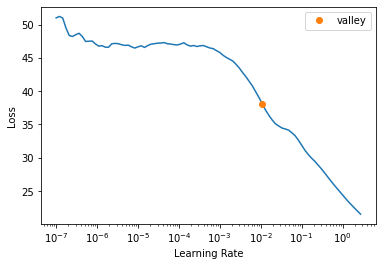

<Figure size 720x720 with 0 Axes>

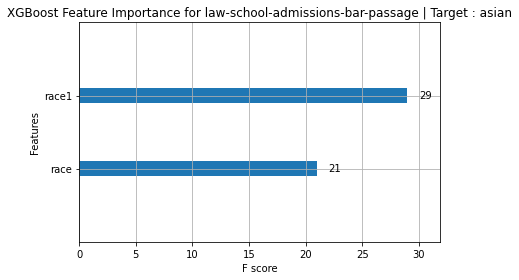

Target Variable: other
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  5%|▍         | 2/42 [00:00<00:05,  7.57it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0606236457824707}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.20345568656921387}


 10%|▉         | 4/42 [00:00<00:04,  8.33it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.6954846680172171, 'Adjusted R-Squared': 0.6927170457118952, 'RMSE': 0.07437759841934519, 'Time taken': 0.09535384178161621}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12639212608337402}
{'Model': 'DummyRegressor', 'R-Squared': -1.7713450318090906e-05, 'Adjusted R-Squared': -0.009106488427397474, 'RMSE': 0.13478495433364157, 'Time taken': 0.02814459800720215}
{'Model': 'ElasticNet', 'R-Squared': -1.7713450318090906e-05, 'Adjusted R-Squared': -0.009106488427397474, 'RMSE': 0.13478495433364157, 'Time taken': 0.038033246994018555}


 17%|█▋        | 7/42 [00:01<00:09,  3.82it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6964405481481921, 'Adjusted R-Squared': 0.6936816134683979, 'RMSE': 0.0742607702307369, 'Time taken': 1.0547513961791992}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06564879417419434}


 21%|██▏       | 9/42 [00:02<00:11,  2.77it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0296926498413086}
{'Model': 'GammaRegressor', 'R-Squared': 0.2312887609295251, 'Adjusted R-Squared': 0.22430224121063158, 'RMSE': 0.1181732514082166, 'Time taken': 0.06672072410583496}


 26%|██▌       | 11/42 [01:18<06:37, 12.81s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -15.076368179221358, 'Adjusted R-Squared': -15.222480083905015, 'RMSE': 0.5404201595388052, 'Time taken': 75.81584143638611}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.24090693999175727, 'Adjusted R-Squared': 0.23400783618961218, 'RMSE': 0.11743162750789057, 'Time taken': 0.08484888076782227}


 31%|███       | 13/42 [01:21<04:24,  9.13s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992944796, 'Adjusted R-Squared': 0.9999999992880674, 'RMSE': 3.5800769360904924e-06, 'Time taken': 2.6071484088897705}


 33%|███▎      | 14/42 [01:21<03:29,  7.48s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999988739689888, 'Adjusted R-Squared': 0.9999988637349276, 'RMSE': 0.0001430252597168336, 'Time taken': 0.31279635429382324}


 36%|███▌      | 15/42 [01:23<02:49,  6.28s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.38025882096822583, 'Adjusted R-Squared': 0.37462623262055006, 'RMSE': 0.10610668499959183, 'Time taken': 1.767124891281128}


 38%|███▊      | 16/42 [01:27<02:32,  5.86s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6502837700085408, 'Adjusted R-Squared': 0.6471053341893809, 'RMSE': 0.07970681644811908, 'Time taken': 4.467335939407349}


 40%|████      | 17/42 [01:57<04:56, 11.85s/it]

{'Model': 'KernelRidge', 'R-Squared': -56.66961978141941, 'Adjusted R-Squared': -57.19375669435328, 'RMSE': 1.023554833501435, 'Time taken': 29.976922273635864}
{'Model': 'Lars', 'R-Squared': 0.6448778916481583, 'Adjusted R-Squared': 0.6416503238873237, 'RMSE': 0.08032050394470576, 'Time taken': 0.07710695266723633}


 45%|████▌     | 19/42 [01:58<02:41,  7.01s/it]

{'Model': 'LarsCV', 'R-Squared': 0.6667977487442668, 'Adjusted R-Squared': 0.663769402103215, 'RMSE': 0.07780213825042236, 'Time taken': 0.2964770793914795}
{'Model': 'Lasso', 'R-Squared': -1.7713450318090906e-05, 'Adjusted R-Squared': -0.009106488427397474, 'RMSE': 0.13478495433364157, 'Time taken': 0.06284260749816895}


 50%|█████     | 21/42 [01:59<01:36,  4.61s/it]

{'Model': 'LassoCV', 'R-Squared': 0.6963802450839187, 'Adjusted R-Squared': 0.6936207623328511, 'RMSE': 0.07426814593522435, 'Time taken': 1.0378286838531494}
{'Model': 'LassoLars', 'R-Squared': -1.7713450318090906e-05, 'Adjusted R-Squared': -0.009106488427397474, 'RMSE': 0.13478495433364157, 'Time taken': 0.06224846839904785}


 57%|█████▋    | 24/42 [01:59<00:44,  2.49s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.6963089804256563, 'Adjusted R-Squared': 0.6935488499776188, 'RMSE': 0.07427686141473377, 'Time taken': 0.33170533180236816}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6964306335028208, 'Adjusted R-Squared': 0.6936716087126419, 'RMSE': 0.07426198294736551, 'Time taken': 0.10008382797241211}
{'Model': 'LinearRegression', 'R-Squared': 0.6953348031759867, 'Adjusted R-Squared': 0.6925658188069728, 'RMSE': 0.07439589834502805, 'Time taken': 0.08001279830932617}


 62%|██████▏   | 26/42 [02:00<00:27,  1.71s/it]

{'Model': 'LinearSVR', 'R-Squared': -1.2304674819820232, 'Adjusted R-Squared': -1.2507393399349018, 'RMSE': 0.20129617263085087, 'Time taken': 0.6135458946228027}


 64%|██████▍   | 27/42 [02:05<00:34,  2.33s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8560657789087587, 'Adjusted R-Squared': 0.854757616333832, 'RMSE': 0.05113515778928856, 'Time taken': 4.7081263065338135}


 67%|██████▋   | 28/42 [07:16<16:55, 72.55s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9133846105649929, 'Adjusted R-Squared': 0.9125973967251393, 'RMSE': 0.03966752468074352, 'Time taken': 311.74338126182556}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.30260856536040426, 'Adjusted R-Squared': 0.29627024381356626, 'RMSE': 0.11255787204277123, 'Time taken': 0.046494483947753906}


 74%|███████▍  | 31/42 [07:17<06:18, 34.42s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6670283577676556, 'Adjusted R-Squared': 0.6640021070429991, 'RMSE': 0.0777752101901885, 'Time taken': 0.18717408180236816}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.48650827632758153, 'Adjusted R-Squared': 0.4818413482659286, 'RMSE': 0.09658380115530159, 'Time taken': 0.11946654319763184}


 76%|███████▌  | 32/42 [07:17<04:22, 26.24s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.2554693814572636, 'Adjusted R-Squared': 0.2487026300642976, 'RMSE': 0.11629976863863146, 'Time taken': 0.10810065269470215}


 79%|███████▊  | 33/42 [07:17<02:56, 19.66s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [07:19<01:58, 14.84s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.5805931091308594}
{'Model': 'Ridge', 'R-Squared': 0.6955233752112886, 'Adjusted R-Squared': 0.692756104700712, 'RMSE': 0.07437287117029336, 'Time taken': 0.060240745544433594}


 88%|████████▊ | 37/42 [07:19<00:32,  6.51s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.6962645763182245, 'Adjusted R-Squared': 0.6935040422983951, 'RMSE': 0.07428229140272963, 'Time taken': 0.18129253387451172}
{'Model': 'SGDRegressor', 'R-Squared': 0.6953972615597626, 'Adjusted R-Squared': 0.6926288448508888, 'RMSE': 0.07438827212813255, 'Time taken': 0.13762474060058594}


 95%|█████████▌| 40/42 [07:21<00:06,  3.16s/it]

{'Model': 'SVR', 'R-Squared': 0.7836698967727808, 'Adjusted R-Squared': 0.7817037559709177, 'RMSE': 0.06268967930857541, 'Time taken': 2.048724889755249}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6953348031759867, 'Adjusted R-Squared': 0.6925658188069728, 'RMSE': 0.07439589834502805, 'Time taken': 0.049384117126464844}
{'Model': 'TweedieRegressor', 'R-Squared': 0.24090693999175727, 'Adjusted R-Squared': 0.23400783618961218, 'RMSE': 0.11743162750789057, 'Time taken': 0.06677889823913574}


100%|██████████| 42/42 [07:22<00:00, 10.54s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999939603416, 'Adjusted R-Squared': 0.9999999939054495, 'RMSE': 1.0474752e-05, 'Time taken': 0.5491733551025391}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944796, 'Adjusted R-Squared': 0.9999999992880674, 'RMSE': 3.5800769051991834e-06, 'Time taken': 0.17160654067993164}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: other
other
Target Standard Deviation: 0.1327406141797679
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.06
ExtraTreeRegressor                           1.00       1.00  0.00        0.07
RandomForestRegressor                        1.00       1.00  0.00        1.58
DecisionTreeRegressor                        1.00       1.00  0.00        0.13
BaggingRegressor                             1.00       

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.228431,0.179705,0.423917,00:16
1,0.031694,0.018997,0.137831,00:15
2,0.022551,0.679179,0.824123,00:16


Better model found at epoch 0 with _rmse value: 0.42391660809516907.
Better model found at epoch 1 with _rmse value: 0.1378309577703476.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  1.0474752e-05


<Figure size 432x288 with 0 Axes>

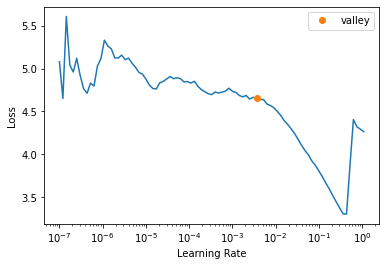

<Figure size 720x720 with 0 Axes>

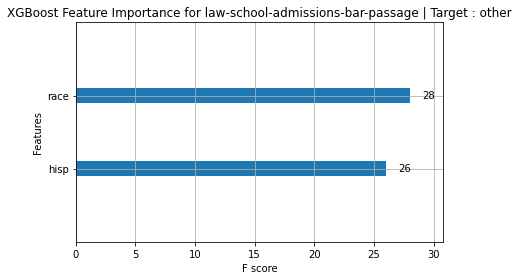

Target Variable: male
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  5%|▍         | 2/42 [00:00<00:03, 10.32it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05237579345703125}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14089488983154297}


 10%|▉         | 4/42 [00:00<00:03, 10.62it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9999545270884277, 'Adjusted R-Squared': 0.9999541138026876, 'RMSE': 0.0033466758618498817, 'Time taken': 0.0694429874420166}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11159539222717285}
{'Model': 'DummyRegressor', 'R-Squared': -0.00016264238073460113, 'Adjusted R-Squared': -0.009252734560917908, 'RMSE': 0.49633235228055783, 'Time taken': 0.0290377140045166}
{'Model': 'ElasticNet', 'R-Squared': -0.00016264238073460113, 'Adjusted R-Squared': -0.009252734560917908, 'RMSE': 0.49633235228055783, 'Time taken': 0.03846001625061035}


 17%|█▋        | 7/42 [00:01<00:07,  4.89it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999896095550163, 'Adjusted R-Squared': 0.9999895151202727, 'RMSE': 0.001599758195464645, 'Time taken': 0.8044791221618652}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08826494216918945}


 21%|██▏       | 9/42 [00:01<00:08,  3.86it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.6309089660644531}
{'Model': 'GammaRegressor', 'R-Squared': 0.8828886540840786, 'Adjusted R-Squared': 0.8818242742676249, 'RMSE': 0.16983873882688158, 'Time taken': 0.07247614860534668}


 26%|██▌       | 11/42 [01:17<06:34, 12.72s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.6086145060038164, 'Adjusted R-Squared': -1.6323231962881226, 'RMSE': 0.8015714173721576, 'Time taken': 75.6640510559082}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8881735368603714, 'Adjusted R-Squared': 0.8871571893034346, 'RMSE': 0.16596234579341074, 'Time taken': 0.08642840385437012}


 31%|███       | 13/42 [01:19<04:20,  8.98s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992943773, 'Adjusted R-Squared': 0.9999999992879642, 'RMSE': 1.3183281589703405e-05, 'Time taken': 2.069037675857544}


 33%|███▎      | 14/42 [01:21<03:31,  7.54s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999998890930327, 'Adjusted R-Squared': 0.9999998880850421, 'RMSE': 0.0001652786226204627, 'Time taken': 1.2584829330444336}


 36%|███▌      | 15/42 [01:23<02:52,  6.39s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999990374484173, 'Adjusted R-Squared': 0.9999990287001576, 'RMSE': 0.00048691065286813776, 'Time taken': 2.066495180130005}


 38%|███▊      | 16/42 [01:27<02:35,  5.99s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.972581326874191, 'Adjusted R-Squared': 0.9723321291381322, 'RMSE': 0.08217893092724053, 'Time taken': 4.661937713623047}


 40%|████      | 17/42 [01:57<04:54, 11.80s/it]

{'Model': 'KernelRidge', 'R-Squared': -8.806220885856733, 'Adjusted R-Squared': -8.895345842153336, 'RMSE': 1.55413272688149, 'Time taken': 29.37986731529236}
{'Model': 'Lars', 'R-Squared': 0.9998783817076266, 'Adjusted R-Squared': 0.9998772763659135, 'RMSE': 0.005473142059863324, 'Time taken': 0.0907125473022461}


 45%|████▌     | 19/42 [01:57<02:40,  6.99s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9999920132389496, 'Adjusted R-Squared': 0.9999919406503615, 'RMSE': 0.0014025637682474835, 'Time taken': 0.3558661937713623}
{'Model': 'Lasso', 'R-Squared': -0.00016264238073460113, 'Adjusted R-Squared': -0.009252734560917908, 'RMSE': 0.49633235228055783, 'Time taken': 0.07041025161743164}


 50%|█████     | 21/42 [01:58<01:34,  4.48s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999905326900602, 'Adjusted R-Squared': 0.9999904466453347, 'RMSE': 0.001527040543002962, 'Time taken': 0.41972780227661133}
{'Model': 'LassoLars', 'R-Squared': -0.00016264238073460113, 'Adjusted R-Squared': -0.009252734560917908, 'RMSE': 0.49633235228055783, 'Time taken': 0.0935051441192627}


 60%|█████▉    | 25/42 [01:58<00:34,  2.02s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999921005065374, 'Adjusted R-Squared': 0.9999920287110906, 'RMSE': 0.001394880143899744, 'Time taken': 0.2696981430053711}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999867531646403, 'Adjusted R-Squared': 0.9999866327692671, 'RMSE': 0.0018063143804866592, 'Time taken': 0.08355545997619629}
{'Model': 'LinearRegression', 'R-Squared': 0.999954475280329, 'Adjusted R-Squared': 0.999954061523725, 'RMSE': 0.0033485817828739703, 'Time taken': 0.07138681411743164}


 62%|██████▏   | 26/42 [01:59<00:28,  1.81s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999999999966, 'Adjusted R-Squared': 0.9999999999999966, 'RMSE': 2.8931246658937967e-08, 'Time taken': 0.9126663208007812}


 64%|██████▍   | 27/42 [02:05<00:40,  2.72s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9891567427284887, 'Adjusted R-Squared': 0.9890581925487931, 'RMSE': 0.051679362916562346, 'Time taken': 6.0570526123046875}


 67%|██████▋   | 28/42 [17:59<52:44, 226.06s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9946185715938409, 'Adjusted R-Squared': 0.994569661868362, 'RMSE': 0.03640709722381589, 'Time taken': 954.0011694431305}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.999992038019138, 'Adjusted R-Squared': 0.9999919656557674, 'RMSE': 0.001400386240022382, 'Time taken': 0.06179618835449219}


 74%|███████▍  | 31/42 [18:00<19:17, 105.21s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999929703760603, 'Adjusted R-Squared': 0.9999929064865218, 'RMSE': 0.001315840703008669, 'Time taken': 0.19031167030334473}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9956245264729827, 'Adjusted R-Squared': 0.9955847594830881, 'RMSE': 0.03282840634508788, 'Time taken': 0.10234832763671875}


 76%|███████▌  | 32/42 [18:00<13:18, 79.83s/it] 

{'Model': 'PoissonRegressor', 'R-Squared': 0.9354256160478561, 'Adjusted R-Squared': 0.9348387243987076, 'RMSE': 0.12611519215980935, 'Time taken': 0.09988665580749512}


 79%|███████▊  | 33/42 [18:00<08:55, 59.46s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [18:01<05:50, 43.78s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.977583646774292}
{'Model': 'Ridge', 'R-Squared': 0.9999547310800448, 'Adjusted R-Squared': 0.9999543196483058, 'RMSE': 0.003339160825300019, 'Time taken': 0.08650565147399902}


 88%|████████▊ | 37/42 [18:01<01:34, 19.00s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9999563989506128, 'Adjusted R-Squared': 0.9999560026775055, 'RMSE': 0.0032770701725453742, 'Time taken': 0.18048572540283203}
{'Model': 'SGDRegressor', 'R-Squared': -77934.35340526783, 'Adjusted R-Squared': -78642.6777482594, 'RMSE': 138.54936022031882, 'Time taken': 0.12391042709350586}


 95%|█████████▌| 40/42 [18:04<00:17,  8.62s/it]

{'Model': 'SVR', 'R-Squared': 0.9822435778309546, 'Adjusted R-Squared': 0.9820821965640812, 'RMSE': 0.0661325092227955, 'Time taken': 2.3730833530426025}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.999954475280329, 'Adjusted R-Squared': 0.999954061523725, 'RMSE': 0.0033485817828739703, 'Time taken': 0.04887533187866211}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8881735368603714, 'Adjusted R-Squared': 0.8871571893034346, 'RMSE': 0.16596234579341074, 'Time taken': 0.0625143051147461}


100%|██████████| 42/42 [18:05<00:00, 25.84s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999997521539, 'Adjusted R-Squared': 0.9999999997499014, 'RMSE': 7.813188e-06, 'Time taken': 0.5024888515472412}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992943774, 'Adjusted R-Squared': 0.9999999992879643, 'RMSE': 1.31832809028314e-05, 'Time taken': 0.19195890426635742}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: male
male
Target Standard Deviation: 0.49702623302720783


                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
AdaBoostRegressor                            1.00       1.00   0.00   
ExtraTreesRegressor                          1.00       1.00   0.00   
DecisionTreeRegressor                        1.00       1.00   0.00   
RandomForestRegressor                        1.00       1.00   0.00   
BaggingRegressor                             1.00       1.00   0.00   
ExtraTreeRegressor                           1.00       1.00   0.00   
LinearSVR                                    1.00       1.00   0.00   
XGBRegressor                                 1.00       1.00   0.00   
LGBMRegressor                                1.00       1.00   0.00   
GradientBoostingRegressor                    1.00       1.00   0.00   
HistGradientBoostingRegressor                1.00       1.00   0.00   
HuberRegressor                               1.00       1.00   0.00   
Orthog

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.346676,0.256011,0.505975,00:16
1,0.049506,0.098494,0.313838,00:16
2,0.021730,0.029435,0.171565,00:16
3,0.008543,0.006474,0.080459,00:16
4,0.010258,0.001604,0.040055,00:16
5,0.002002,0.251504,0.501502,00:16


Better model found at epoch 0 with _rmse value: 0.5059753060340881.
Better model found at epoch 1 with _rmse value: 0.3138376474380493.
Better model found at epoch 2 with _rmse value: 0.17156514525413513.
Better model found at epoch 3 with _rmse value: 0.08045896142721176.
Better model found at epoch 4 with _rmse value: 0.04005492851138115.
No improvement since epoch 4: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       2.00
1       1       1.00
2       1       1.00
3       2       2.00
4       1       1.00
XGBoost RMSE:  7.813188e-06


<Figure size 432x288 with 0 Axes>

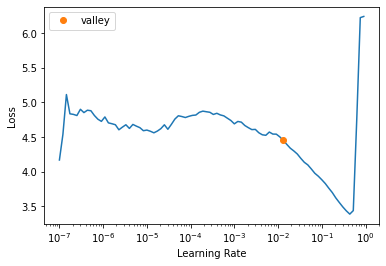

<Figure size 720x720 with 0 Axes>

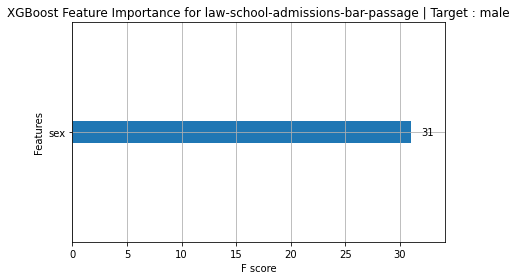

Target Variable: parttime
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  5%|▍         | 2/42 [00:00<00:03, 10.14it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05376243591308594}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14327263832092285}


 10%|▉         | 4/42 [00:00<00:03, 12.54it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.97732192604566, 'Adjusted R-Squared': 0.9771158137855348, 'RMSE': 0.03817710735971088, 'Time taken': 0.0626363754272461}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06873106956481934}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005572085363843016, 'Adjusted R-Squared': -0.009650886776048528, 'RMSE': 0.25358344540430167, 'Time taken': 0.05244851112365723}
{'Model': 'ElasticNet', 'R-Squared': -0.0005572085363843016, 'Adjusted R-Squared': -0.009650886776048528, 'RMSE': 0.25358344540430167, 'Time taken': 0.042162179946899414}


 17%|█▋        | 7/42 [00:00<00:05,  6.57it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9775315267918357, 'Adjusted R-Squared': 0.9773273195119837, 'RMSE': 0.03800027299686456, 'Time taken': 0.5316882133483887}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06316113471984863}


 21%|██▏       | 9/42 [00:01<00:08,  4.09it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999964973249539, 'Adjusted R-Squared': 0.9999964654904925, 'RMSE': 0.0004744602789255803, 'Time taken': 0.7687482833862305}
{'Model': 'GammaRegressor', 'R-Squared': 0.7212502360759127, 'Adjusted R-Squared': 0.7187167870728157, 'RMSE': 0.13384655258458444, 'Time taken': 0.06958699226379395}


 26%|██▌       | 11/42 [01:27<07:25, 14.37s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -4.933295625684526, 'Adjusted R-Squared': -4.987221059293373, 'RMSE': 0.6175155942784456, 'Time taken': 85.6560845375061}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7533832097979052, 'Adjusted R-Squared': 0.7511418049892015, 'RMSE': 0.1258958041301997, 'Time taken': 0.0901949405670166}


 31%|███       | 13/42 [01:29<04:52, 10.09s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.999999999294099, 'Adjusted R-Squared': 0.9999999992876833, 'RMSE': 6.7355310446891186e-06, 'Time taken': 1.9900927543640137}


 33%|███▎      | 14/42 [01:29<03:51,  8.26s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999996818397717, 'Adjusted R-Squared': 0.9999996789481362, 'RMSE': 0.0001429956678624093, 'Time taken': 0.32645344734191895}


 36%|███▌      | 15/42 [01:32<03:09,  7.02s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9766393771560143, 'Adjusted R-Squared': 0.9764270614725042, 'RMSE': 0.038747362389449105, 'Time taken': 2.3424015045166016}


 38%|███▊      | 16/42 [01:37<02:48,  6.49s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9792952986161406, 'Adjusted R-Squared': 0.9791071215775597, 'RMSE': 0.036478285769294766, 'Time taken': 4.7410125732421875}


 40%|████      | 17/42 [02:08<05:18, 12.76s/it]

{'Model': 'KernelRidge', 'R-Squared': -16.999715622134815, 'Adjusted R-Squared': -17.16330808928878, 'RMSE': 1.0755553317836628, 'Time taken': 31.724517583847046}
{'Model': 'Lars', 'R-Squared': 0.9773483284134548, 'Adjusted R-Squared': 0.9771424561142587, 'RMSE': 0.03815487752711028, 'Time taken': 0.06742596626281738}


 45%|████▌     | 19/42 [02:09<02:53,  7.54s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9774609768117943, 'Adjusted R-Squared': 0.977256128330407, 'RMSE': 0.038059885799296304, 'Time taken': 0.31360340118408203}
{'Model': 'Lasso', 'R-Squared': -0.0005572085363843016, 'Adjusted R-Squared': -0.009650886776048528, 'RMSE': 0.25358344540430167, 'Time taken': 0.06160116195678711}


 50%|█████     | 21/42 [02:09<01:41,  4.84s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9775316197640749, 'Adjusted R-Squared': 0.9773274133292116, 'RMSE': 0.038000194376165905, 'Time taken': 0.4862678050994873}
{'Model': 'LassoLars', 'R-Squared': -0.0005572085363843016, 'Adjusted R-Squared': -0.009650886776048528, 'RMSE': 0.25358344540430167, 'Time taken': 0.06162667274475098}


 60%|█████▉    | 25/42 [02:10<00:37,  2.18s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9775317907447751, 'Adjusted R-Squared': 0.9773275858638895, 'RMSE': 0.03800004978825749, 'Time taken': 0.2822563648223877}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9773686233544394, 'Adjusted R-Squared': 0.9771629355081278, 'RMSE': 0.03813778111749387, 'Time taken': 0.09259033203125}
{'Model': 'LinearRegression', 'R-Squared': 0.9773109692917153, 'Adjusted R-Squared': 0.9771047574498829, 'RMSE': 0.03818632874818418, 'Time taken': 0.08424091339111328}


 62%|██████▏   | 26/42 [02:11<00:31,  1.98s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9766488347700442, 'Adjusted R-Squared': 0.9764366050431372, 'RMSE': 0.03873951810596272, 'Time taken': 1.102363109588623}


 64%|██████▍   | 27/42 [02:18<00:47,  3.15s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9791795420564057, 'Adjusted R-Squared': 0.9789903129511369, 'RMSE': 0.03658011566924935, 'Time taken': 7.441848993301392}


 67%|██████▋   | 28/42 [10:06<26:11, 112.25s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9929587212498663, 'Adjusted R-Squared': 0.9928947257853359, 'RMSE': 0.0212728513035275, 'Time taken': 467.83512330055237}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.977447340203896, 'Adjusted R-Squared': 0.9772423677846434, 'RMSE': 0.03807139759499203, 'Time taken': 0.041792869567871094}


 74%|███████▍  | 31/42 [10:06<09:35, 52.28s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9774794911799187, 'Adjusted R-Squared': 0.9772748109684765, 'RMSE': 0.03804425070505878, 'Time taken': 0.1941838264465332}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9443362893940592, 'Adjusted R-Squared': 0.943830383415313, 'RMSE': 0.05981168155544785, 'Time taken': 0.1231536865234375}


 76%|███████▌  | 32/42 [10:07<06:36, 39.69s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8146958294663972, 'Adjusted R-Squared': 0.8130116713903534, 'RMSE': 0.10912959226358056, 'Time taken': 0.14439964294433594}


 79%|███████▊  | 33/42 [10:07<04:26, 29.61s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [10:08<01:14, 12.44s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9428932666778564}
{'Model': 'Ridge', 'R-Squared': 0.9773227511605217, 'Adjusted R-Squared': 0.9771166463995469, 'RMSE': 0.03817641283897577, 'Time taken': 0.04537701606750488}
{'Model': 'RidgeCV', 'R-Squared': 0.977337903998251, 'Adjusted R-Squared': 0.9771319369555691, 'RMSE': 0.03816365605221025, 'Time taken': 0.09373140335083008}


 88%|████████▊ | 37/42 [10:08<00:47,  9.53s/it]

{'Model': 'SGDRegressor', 'R-Squared': -3792.2679361712385, 'Adjusted R-Squared': -3826.743484189962, 'RMSE': 15.613731099888206, 'Time taken': 0.13300037384033203}


 95%|█████████▌| 40/42 [10:10<00:08,  4.42s/it]

{'Model': 'SVR', 'R-Squared': 0.9548575191609929, 'Adjusted R-Squared': 0.9544472365782602, 'RMSE': 0.05386326147432911, 'Time taken': 1.741926670074463}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9773109692917153, 'Adjusted R-Squared': 0.9771047574498829, 'RMSE': 0.03818632874818418, 'Time taken': 0.0527496337890625}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7533832097979052, 'Adjusted R-Squared': 0.7511418049892015, 'RMSE': 0.1258958041301997, 'Time taken': 0.0664825439453125}


100%|██████████| 42/42 [10:11<00:00, 14.55s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999991815433, 'Adjusted R-Squared': 0.9999999991741046, 'RMSE': 7.2526677e-06, 'Time taken': 0.49396753311157227}
{'Model': 'LGBMRegressor', 'R-Squared': 0.999999999294099, 'Adjusted R-Squared': 0.9999999992876833, 'RMSE': 6.735530958028738e-06, 'Time taken': 0.16355013847351074}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: parttime
parttime
Target Standard Deviation: 0.26342160339203957
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.05
ExtraTreeRegressor                           1.00       1.00  0.00        0.06
RandomForestRegressor                        1.00       1.00  0.00        0.94
DecisionTreeRegressor                        1.00       1.00  0.00        0.07
BaggingRegressor                             1.00 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.607678,0.241473,0.491399,00:17
1,0.102300,0.103800,0.322180,00:16
2,0.049279,0.040945,0.202350,00:15
3,0.017351,0.003908,0.062510,00:16
4,0.033975,0.381488,0.617647,00:16


Better model found at epoch 0 with _rmse value: 0.4913986921310425.
Better model found at epoch 1 with _rmse value: 0.32218047976493835.
Better model found at epoch 2 with _rmse value: 0.2023497074842453.
Better model found at epoch 3 with _rmse value: 0.06251025199890137.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  7.2526677e-06


<Figure size 432x288 with 0 Axes>

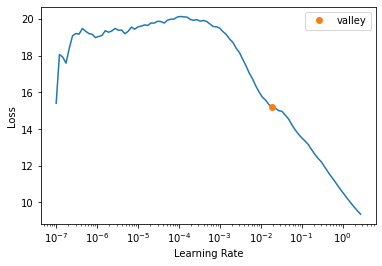

<Figure size 720x720 with 0 Axes>

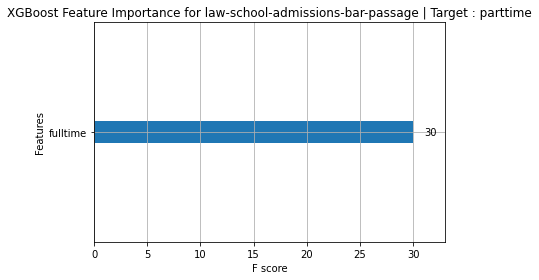

Target Variable: age
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:02<01:27,  2.15s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8766505428387309, 'Adjusted R-Squared': 0.8755294672371642, 'RMSE': 2.1027529480656093, 'Time taken': 2.144667148590088}


  7%|▋         | 3/42 [00:02<00:27,  1.42it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9378603994841147, 'Adjusted R-Squared': 0.9372956366417587, 'RMSE': 1.492463977576069, 'Time taken': 0.5570399761199951}
{'Model': 'BayesianRidge', 'R-Squared': 0.7843690703377064, 'Adjusted R-Squared': 0.7824092840544844, 'RMSE': 2.7801943530471256, 'Time taken': 0.09996223449707031}


 10%|▉         | 4/42 [00:02<00:18,  2.00it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9385117064877948, 'Adjusted R-Squared': 0.9379528631233819, 'RMSE': 1.4846218545560728, 'Time taken': 0.17970514297485352}
{'Model': 'DummyRegressor', 'R-Squared': -0.00018892211643595225, 'Adjusted R-Squared': -0.009279253142992827, 'RMSE': 5.987708498391718, 'Time taken': 0.02748274803161621}
{'Model': 'ElasticNet', 'R-Squared': 0.6528945298725555, 'Adjusted R-Squared': 0.6497398222420107, 'RMSE': 3.5273646494789306, 'Time taken': 0.043663978576660156}


 19%|█▉        | 8/42 [00:03<00:10,  3.24it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7848133588170095, 'Adjusted R-Squared': 0.7828576105002745, 'RMSE': 2.7773287037663272, 'Time taken': 0.7552132606506348}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9384628619514143, 'Adjusted R-Squared': 0.9379035746578649, 'RMSE': 1.4852114080033292, 'Time taken': 0.13826942443847656}


 21%|██▏       | 9/42 [00:07<00:34,  1.03s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.938458595730051, 'Adjusted R-Squared': 0.9378992696624624, 'RMSE': 1.4852628901734746, 'Time taken': 3.238274097442627}
{'Model': 'GammaRegressor', 'R-Squared': 0.553851644677158, 'Adjusted R-Squared': 0.5497967744949761, 'RMSE': 3.9990724981203947, 'Time taken': 0.07934713363647461}


 29%|██▊       | 12/42 [01:28<06:42, 13.43s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.7021454982649054, 'Adjusted R-Squared': -0.7176156416472674, 'RMSE': 7.811203808944619, 'Time taken': 80.86281752586365}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6003505598853742, 'Adjusted R-Squared': 0.5967183003943046, 'RMSE': 3.784942042472581, 'Time taken': 0.11009979248046875}


 31%|███       | 13/42 [01:31<05:15, 10.89s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9367938258227211, 'Adjusted R-Squared': 0.9362193693040687, 'RMSE': 1.5052179233875218, 'Time taken': 3.0749926567077637}


 33%|███▎      | 14/42 [01:32<03:52,  8.30s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.930184598403436, 'Adjusted R-Squared': 0.9295500731680216, 'RMSE': 1.5819590943958655, 'Time taken': 0.9400293827056885}


 36%|███▌      | 15/42 [01:34<03:00,  6.68s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.7344600515809723, 'Adjusted R-Squared': 0.732046661491832, 'RMSE': 3.085208807681906, 'Time taken': 2.3153860569000244}


 38%|███▊      | 16/42 [01:39<02:39,  6.15s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7559738126893012, 'Adjusted R-Squared': 0.7537559528702693, 'RMSE': 2.957589164646337, 'Time taken': 4.772806644439697}


 43%|████▎     | 18/42 [02:11<03:53,  9.72s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.5895976307630626, 'Adjusted R-Squared': -2.622222097995446, 'RMSE': 11.343380864876405, 'Time taken': 32.38828706741333}
{'Model': 'Lars', 'R-Squared': 0.7839492464676872, 'Adjusted R-Squared': 0.7819856445673683, 'RMSE': 2.7828994946266468, 'Time taken': 0.13736176490783691}


 48%|████▊     | 20/42 [02:12<01:49,  4.97s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7843664816139092, 'Adjusted R-Squared': 0.7824066718027758, 'RMSE': 2.7802110415938315, 'Time taken': 0.41796040534973145}
{'Model': 'Lasso', 'R-Squared': 0.7210666623607891, 'Adjusted R-Squared': 0.7185315449270573, 'RMSE': 3.1620580676088883, 'Time taken': 0.10578799247741699}


 52%|█████▏    | 22/42 [02:13<00:52,  2.63s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7843996898896373, 'Adjusted R-Squared': 0.7824401818957032, 'RMSE': 2.77999695249849, 'Time taken': 0.6643021106719971}
{'Model': 'LassoLars', 'R-Squared': -0.00018892211643595225, 'Adjusted R-Squared': -0.009279253142992827, 'RMSE': 5.987708498391718, 'Time taken': 0.1123189926147461}


 60%|█████▉    | 25/42 [02:13<00:18,  1.08s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7843857873351926, 'Adjusted R-Squared': 0.7824261529863077, 'RMSE': 2.7800865823230865, 'Time taken': 0.30117321014404297}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7839972278629266, 'Adjusted R-Squared': 0.7820340620469876, 'RMSE': 2.782590458872836, 'Time taken': 0.0872654914855957}
{'Model': 'LinearRegression', 'R-Squared': 0.7843456399436705, 'Adjusted R-Squared': 0.7823856407106414, 'RMSE': 2.780345396498626, 'Time taken': 0.07295656204223633}


 62%|██████▏   | 26/42 [02:14<00:17,  1.12s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7344601776161757, 'Adjusted R-Squared': 0.7320467886725206, 'RMSE': 3.085208075504003, 'Time taken': 1.2294080257415771}


 64%|██████▍   | 27/42 [02:38<01:43,  6.89s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9325507925435748, 'Adjusted R-Squared': 0.9319377727333169, 'RMSE': 1.5549200181404954, 'Time taken': 23.220230102539062}


 67%|██████▋   | 28/42 [03:17<03:41, 15.83s/it]

{'Model': 'NuSVR', 'R-Squared': 0.7929342582229997, 'Adjusted R-Squared': 0.7910523176261878, 'RMSE': 2.7244180911141993, 'Time taken': 39.79061007499695}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7707317354769324, 'Adjusted R-Squared': 0.768648004721358, 'RMSE': 2.8667617485668866, 'Time taken': 0.042195796966552734}


 74%|███████▍  | 31/42 [03:18<01:15,  6.88s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7788352678995304, 'Adjusted R-Squared': 0.7768251870220709, 'RMSE': 2.815642850983049, 'Time taken': 0.23210930824279785}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7505054765572183, 'Adjusted R-Squared': 0.7482379171419342, 'RMSE': 2.990543594899378, 'Time taken': 0.1706247329711914}


 79%|███████▊  | 33/42 [03:18<00:34,  3.84s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.47571850761569223, 'Adjusted R-Squared': 0.4709535155112148, 'RMSE': 4.335127677137018, 'Time taken': 0.1537775993347168}
{'Model': 'RANSACRegressor', 'R-Squared': 0.7343543653904965, 'Adjusted R-Squared': 0.7319400147603672, 'RMSE': 3.085822710656471, 'Time taken': 0.13712406158447266}


 81%|████████  | 34/42 [03:23<00:33,  4.13s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9377899028625357, 'Adjusted R-Squared': 0.937224499303599, 'RMSE': 1.4933103287223772, 'Time taken': 4.916509628295898}
{'Model': 'Ridge', 'R-Squared': 0.7843517889129088, 'Adjusted R-Squared': 0.7823918455654877, 'RMSE': 2.7803057581157544, 'Time taken': 0.05723905563354492}


 88%|████████▊ | 37/42 [03:23<00:09,  1.83s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.7844060946172557, 'Adjusted R-Squared': 0.7824466448334186, 'RMSE': 2.779955660221392, 'Time taken': 0.17801380157470703}
{'Model': 'SGDRegressor', 'R-Squared': -12214.166723586482, 'Adjusted R-Squared': -12325.185658716277, 'RMSE': 661.7124848067411, 'Time taken': 0.1347641944885254}


 95%|█████████▌| 40/42 [03:38<00:05,  2.98s/it]

{'Model': 'SVR', 'R-Squared': 0.7935136858523001, 'Adjusted R-Squared': 0.7916370114495439, 'RMSE': 2.720603580338882, 'Time taken': 14.675861120223999}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7843456399436705, 'Adjusted R-Squared': 0.7823856407106414, 'RMSE': 2.780345396498626, 'Time taken': 0.06172943115234375}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6003505598853742, 'Adjusted R-Squared': 0.5967183003943046, 'RMSE': 3.784942042472581, 'Time taken': 0.0686650276184082}


 98%|█████████▊| 41/42 [03:40<00:02,  2.60s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9375512210317007, 'Adjusted R-Squared': 0.9369836481857379, 'RMSE': 1.4961722, 'Time taken': 1.3334989547729492}


100%|██████████| 42/42 [03:40<00:00,  5.25s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9284170615431034, 'Adjusted R-Squared': 0.9277664718474589, 'RMSE': 1.6018593859226806, 'Time taken': 0.36377477645874023}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: age
age
Target Standard Deviation: 5.919953585427098
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
DecisionTreeRegressor                        0.94       0.94   1.48   
ExtraTreeRegressor                           0.94       0.94   1.49   
ExtraTreesRegressor                          0.94       0.94   1.49   
BaggingRegressor                             0.94       0.94   1.49   
RandomForestRegressor                        0.94       0.94   1.49   
XGBRegressor                                 0.94       0.94   1.50   
GradientBoostingRegressor                    0.94       0.94   1.51   
MLPRegressor                                 0.93       0.

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,35.880936,36.199467,6.016599,00:16
1,30.868235,65.246750,8.077546,00:16


Better model found at epoch 0 with _rmse value: 6.016599178314209.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       3       3.00
1      11      11.00
2       9       9.00
3      16      16.00
4       9       9.00
XGBoost RMSE:  1.4961996


<Figure size 432x288 with 0 Axes>

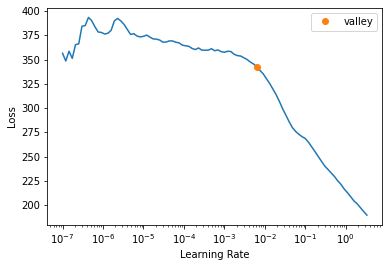

<Figure size 720x720 with 0 Axes>

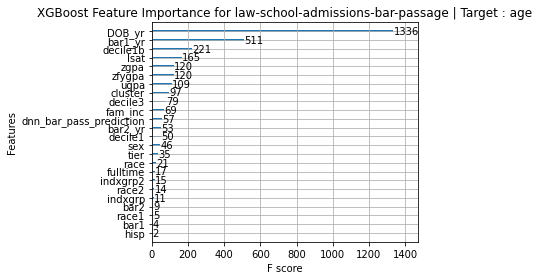

Target Variable: fam_inc
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:00<00:18,  2.25it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.025343305721019727, 'Adjusted R-Squared': -0.03466225523022359, 'RMSE': 0.9548030021609589, 'Time taken': 0.44333648681640625}


  5%|▍         | 2/42 [00:01<00:37,  1.06it/s]

{'Model': 'BaggingRegressor', 'R-Squared': -0.05554164587774357, 'Adjusted R-Squared': -0.06513505644366102, 'RMSE': 0.9687613687449372, 'Time taken': 1.2940645217895508}
{'Model': 'BayesianRidge', 'R-Squared': 0.07947194788825895, 'Adjusted R-Squared': 0.07110562375899299, 'RMSE': 0.9046855206580671, 'Time taken': 0.07640933990478516}


 10%|▉         | 4/42 [00:02<00:17,  2.16it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.9311138034291357, 'Adjusted R-Squared': -0.9486649513522483, 'RMSE': 1.310337167200058, 'Time taken': 0.276824951171875}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005181983610291763, 'Adjusted R-Squared': -0.009611522052267896, 'RMSE': 0.9431735691979555, 'Time taken': 0.02704787254333496}
{'Model': 'ElasticNet', 'R-Squared': -0.0005181983610291763, 'Adjusted R-Squared': -0.009611522052267896, 'RMSE': 0.9431735691979555, 'Time taken': 0.04314780235290527}


 17%|█▋        | 7/42 [00:04<00:20,  1.71it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.0772155492615817, 'Adjusted R-Squared': 0.06882871759619846, 'RMSE': 0.9057936247319268, 'Time taken': 1.9574456214904785}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.9327313872837089, 'Adjusted R-Squared': -0.9502972368020661, 'RMSE': 1.3108858496663345, 'Time taken': 0.19826531410217285}


 21%|██▏       | 9/42 [00:13<01:21,  2.47s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.038641731475099084, 'Adjusted R-Squared': -0.048081545242608215, 'RMSE': 0.9609748234504651, 'Time taken': 8.894728183746338}
{'Model': 'GammaRegressor', 'R-Squared': 0.06830559653602075, 'Adjusted R-Squared': 0.05983778574967813, 'RMSE': 0.9101560684602046, 'Time taken': 0.07064223289489746}


 29%|██▊       | 12/42 [01:30<06:36, 13.23s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.132793288249911, 'Adjusted R-Squared': -5.188531879104998, 'RMSE': 2.3351150828392857, 'Time taken': 77.21558904647827}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.06805844357406232, 'Adjusted R-Squared': 0.059588386509852875, 'RMSE': 0.9102767801716782, 'Time taken': 0.10540175437927246}


 31%|███       | 13/42 [01:33<05:12, 10.79s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.07470926963316482, 'Adjusted R-Squared': 0.06629965935969695, 'RMSE': 0.9070228569497429, 'Time taken': 3.1212892532348633}


 33%|███▎      | 14/42 [01:34<03:47,  8.13s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.08512702847408071, 'Adjusted R-Squared': 0.07681210118932102, 'RMSE': 0.9019023620520223, 'Time taken': 0.40938329696655273}


 36%|███▌      | 15/42 [01:36<03:00,  6.67s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.07250994740922156, 'Adjusted R-Squared': 0.06408034834502874, 'RMSE': 0.908100167835785, 'Time taken': 2.706590414047241}


 38%|███▊      | 16/42 [01:41<02:39,  6.12s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.07805915550280362, 'Adjusted R-Squared': -0.08785721902163757, 'RMSE': 0.9790399683515555, 'Time taken': 4.659251928329468}


 43%|████▎     | 18/42 [02:13<03:50,  9.62s/it]

{'Model': 'KernelRidge', 'R-Squared': -21.934413000002397, 'Adjusted R-Squared': -22.14285502676334, 'RMSE': 4.51567773093732, 'Time taken': 32.028749227523804}
{'Model': 'Lars', 'R-Squared': 0.05630292688391292, 'Adjusted R-Squared': 0.047726028466296366, 'RMSE': 0.9159999073715901, 'Time taken': 0.12498021125793457}


 45%|████▌     | 19/42 [02:13<02:38,  6.90s/it]

{'Model': 'LarsCV', 'R-Squared': 0.07882513238381572, 'Adjusted R-Squared': 0.07045292959810945, 'RMSE': 0.9050033066634227, 'Time taken': 0.2907283306121826}
{'Model': 'Lasso', 'R-Squared': -0.0005181983610291763, 'Adjusted R-Squared': -0.009611522052267896, 'RMSE': 0.9431735691979555, 'Time taken': 0.06364846229553223}


 52%|█████▏    | 22/42 [02:16<01:04,  3.21s/it]

{'Model': 'LassoCV', 'R-Squared': 0.0770958369201662, 'Adjusted R-Squared': 0.06870791723552239, 'RMSE': 0.9058523768917643, 'Time taken': 1.9363038539886475}
{'Model': 'LassoLars', 'R-Squared': -0.0005181983610291763, 'Adjusted R-Squared': -0.009611522052267896, 'RMSE': 0.9431735691979555, 'Time taken': 0.11771678924560547}


 57%|█████▋    | 24/42 [02:16<00:32,  1.83s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.07379701704861652, 'Adjusted R-Squared': 0.0653791156635497, 'RMSE': 0.9074698678594764, 'Time taken': 0.3468630313873291}
{'Model': 'LassoLarsIC', 'R-Squared': 0.07551322625743362, 'Adjusted R-Squared': 0.06711092283538556, 'RMSE': 0.9066287292039945, 'Time taken': 0.09860396385192871}


 60%|█████▉    | 25/42 [02:16<00:22,  1.35s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.07552060396466476, 'Adjusted R-Squared': 0.06711836759574985, 'RMSE': 0.9066251115996835, 'Time taken': 0.10458850860595703}


 62%|██████▏   | 26/42 [02:19<00:28,  1.80s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.05225568263195157, 'Adjusted R-Squared': -0.06181922834635456, 'RMSE': 0.9672522877963174, 'Time taken': 2.933581590652466}


 64%|██████▍   | 27/42 [02:40<01:51,  7.41s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.04000093135048777, 'Adjusted R-Squared': 0.03127587038826041, 'RMSE': 0.9238778001183854, 'Time taken': 21.19599723815918}


 67%|██████▋   | 28/42 [03:45<05:38, 24.19s/it]

{'Model': 'NuSVR', 'R-Squared': 0.05054974053702288, 'Adjusted R-Squared': 0.04192055362950786, 'RMSE': 0.9187878309408393, 'Time taken': 64.79687929153442}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.0643436328702256, 'Adjusted R-Squared': 0.05583981332549648, 'RMSE': 0.912089202232236, 'Time taken': 0.04221320152282715}


 74%|███████▍  | 31/42 [03:45<01:50, 10.02s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.07309727471298721, 'Adjusted R-Squared': 0.06467301363994193, 'RMSE': 0.9078125979131528, 'Time taken': 0.19283103942871094}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.5688357997968712, 'Adjusted R-Squared': -0.5830943427892183, 'RMSE': 1.181048877680167, 'Time taken': 0.14992141723632812}


 76%|███████▌  | 32/42 [03:46<01:14,  7.46s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.0785063299372546, 'Adjusted R-Squared': 0.07013122967917362, 'RMSE': 0.905159895993028, 'Time taken': 0.1237645149230957}


 79%|███████▊  | 33/42 [03:46<00:50,  5.56s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -1.1660827253138086e+22, 'Adjusted R-Squared': -1.1766808010803567e+22, 'RMSE': 101822511878.93384, 'Time taken': 0.43601179122924805}


 81%|████████  | 34/42 [03:59<01:00,  7.56s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.02811016272649991, 'Adjusted R-Squared': 0.01927703115824797, 'RMSE': 0.9295818726431805, 'Time taken': 12.754754066467285}
{'Model': 'Ridge', 'R-Squared': 0.07584419680395493, 'Adjusted R-Squared': 0.06744490144544502, 'RMSE': 0.9064664260344367, 'Time taken': 0.05794405937194824}


 88%|████████▊ | 37/42 [03:59<00:16,  3.27s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.07555694512949362, 'Adjusted R-Squared': 0.06715503905139764, 'RMSE': 0.9066072917669431, 'Time taken': 0.20263218879699707}
{'Model': 'SGDRegressor', 'R-Squared': -17067.859940518185, 'Adjusted R-Squared': -17222.99221970492, 'RMSE': 123.1916814866636, 'Time taken': 0.12845778465270996}


 90%|█████████ | 38/42 [04:28<00:38,  9.69s/it]

{'Model': 'SVR', 'R-Squared': 0.03556492237687103, 'Adjusted R-Squared': 0.026799544241442486, 'RMSE': 0.9260098889991052, 'Time taken': 28.344396352767944}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.07552060396466476, 'Adjusted R-Squared': 0.06711836759574985, 'RMSE': 0.9066251115996835, 'Time taken': 0.06648969650268555}


 95%|█████████▌| 40/42 [04:28<00:11,  5.65s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.06805844357406232, 'Adjusted R-Squared': 0.059588386509852875, 'RMSE': 0.9102767801716782, 'Time taken': 0.17241668701171875}


 98%|█████████▊| 41/42 [04:30<00:04,  4.77s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.005832903491003738, 'Adjusted R-Squared': -0.0032026974871137703, 'RMSE': 0.94017524, 'Time taken': 1.834794521331787}


100%|██████████| 42/42 [04:30<00:00,  6.44s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.07691362688301429, 'Adjusted R-Squared': 0.06852405116167837, 'RMSE': 0.9059417942201744, 'Time taken': 0.4602954387664795}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: fam_inc
fam_inc
Target Standard Deviation: 0.9268245808581329
                                       Adjusted R-Squared  \
Model                                                       
HistGradientBoostingRegressor                        0.08   
BayesianRidge                                        0.07   
LarsCV                                               0.07   
PoissonRegressor                                     0.07   
ElasticNetCV                                         0.07   
LassoCV                                              0.07   
LGBMRegressor                                        0.07   
Ridge                                                0.07   
RidgeCV                                              0.07   
TransformedTarge

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.587560,0.934900,0.966902,00:16
1,0.468289,0.653945,0.808668,00:16
2,0.231340,0.197967,0.444935,00:16
3,0.122234,0.630993,0.794350,00:16


Better model found at epoch 0 with _rmse value: 0.9669023752212524.
Better model found at epoch 1 with _rmse value: 0.8086683750152588.
Better model found at epoch 2 with _rmse value: 0.444935142993927.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       4       4.64
1       5       4.33
2       4       4.73
3       5       4.61
4       5       4.72
XGBoost RMSE:  0.94046086


<Figure size 432x288 with 0 Axes>

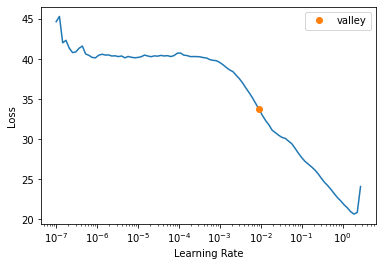

<Figure size 720x720 with 0 Axes>

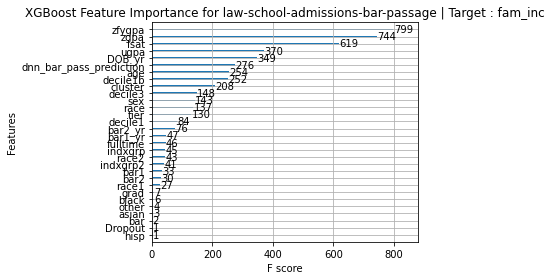

Target Variable: fulltime
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:00<00:14,  2.90it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9858730352484515, 'Adjusted R-Squared': 0.9857446407190257, 'RMSE': 0.031808474945149726, 'Time taken': 0.3443722724914551}


  5%|▍         | 2/42 [00:00<00:18,  2.14it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9793950109234867, 'Adjusted R-Squared': 0.979207740131577, 'RMSE': 0.038415333773565825, 'Time taken': 0.5501468181610107}
{'Model': 'BayesianRidge', 'R-Squared': 0.9860223172029139, 'Adjusted R-Squared': 0.9858952794395472, 'RMSE': 0.031639965910287136, 'Time taken': 0.0681772232055664}


 10%|▉         | 4/42 [00:01<00:09,  3.99it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9615839186709073, 'Adjusted R-Squared': 0.9612347697368383, 'RMSE': 0.05245355743745053, 'Time taken': 0.17411589622497559}
{'Model': 'DummyRegressor', 'R-Squared': -0.00019842279981152622, 'Adjusted R-Squared': -0.009288840174412227, 'RMSE': 0.26764645735218706, 'Time taken': 0.028348445892333984}
{'Model': 'ElasticNet', 'R-Squared': -0.00019842279981152622, 'Adjusted R-Squared': -0.009288840174412227, 'RMSE': 0.26764645735218706, 'Time taken': 0.037668466567993164}


 19%|█▉        | 8/42 [00:01<00:06,  5.05it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9860520130789328, 'Adjusted R-Squared': 0.9859252452099203, 'RMSE': 0.03160633815929299, 'Time taken': 0.48271965980529785}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9511068055811548, 'Adjusted R-Squared': 0.9506624342105215, 'RMSE': 0.059175593579090684, 'Time taken': 0.14201045036315918}


 21%|██▏       | 9/42 [00:04<00:27,  1.19it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9807091901420446, 'Adjusted R-Squared': 0.9805338634177613, 'RMSE': 0.03717009292299324, 'Time taken': 2.9254274368286133}
{'Model': 'GammaRegressor', 'R-Squared': 0.7416423230260472, 'Adjusted R-Squared': 0.7392942098296165, 'RMSE': 0.13602824723515985, 'Time taken': 0.07701945304870605}


 29%|██▊       | 12/42 [01:25<06:27, 12.93s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -16.727064001216366, 'Adjusted R-Squared': -16.888178443035045, 'RMSE': 1.1267740149090604, 'Time taken': 80.20312690734863}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7606356642877298, 'Adjusted R-Squared': 0.7584601742383378, 'RMSE': 0.1309327043266246, 'Time taken': 0.10403895378112793}


 31%|███       | 13/42 [01:28<05:06, 10.58s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9851235286867063, 'Adjusted R-Squared': 0.9849883221814605, 'RMSE': 0.03264137021237096, 'Time taken': 3.1791481971740723}


 33%|███▎      | 14/42 [01:28<03:44,  8.01s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9843101806364901, 'Adjusted R-Squared': 0.9841675819247794, 'RMSE': 0.0335218044598593, 'Time taken': 0.5469341278076172}


 36%|███▌      | 15/42 [01:31<02:57,  6.56s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9859743094061796, 'Adjusted R-Squared': 0.9858468353184802, 'RMSE': 0.031694254702232014, 'Time taken': 2.6013565063476562}


 38%|███▊      | 16/42 [01:36<02:37,  6.05s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9474747397100406, 'Adjusted R-Squared': 0.9469973578947317, 'RMSE': 0.06133417432777778, 'Time taken': 4.710252285003662}


 40%|████      | 17/42 [02:08<05:34, 13.40s/it]

{'Model': 'KernelRidge', 'R-Squared': -58.969503949040515, 'Adjusted R-Squared': -59.51454362138726, 'RMSE': 2.072448011596066, 'Time taken': 31.97156071662903}
{'Model': 'Lars', 'R-Squared': 0.9858556629598678, 'Adjusted R-Squared': 0.985727110540417, 'RMSE': 0.03182802678229131, 'Time taken': 0.0870661735534668}


 45%|████▌     | 19/42 [02:08<02:52,  7.51s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9860478670285955, 'Adjusted R-Squared': 0.985921061477732, 'RMSE': 0.03161103531498755, 'Time taken': 0.37735867500305176}
{'Model': 'Lasso', 'R-Squared': -0.00019842279981152622, 'Adjusted R-Squared': -0.009288840174412227, 'RMSE': 0.26764645735218706, 'Time taken': 0.06971168518066406}


 52%|█████▏    | 22/42 [02:09<01:13,  3.69s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9860482011171132, 'Adjusted R-Squared': 0.9859213986026513, 'RMSE': 0.031610656844284275, 'Time taken': 0.4757874011993408}
{'Model': 'LassoLars', 'R-Squared': -0.00019842279981152622, 'Adjusted R-Squared': -0.009288840174412227, 'RMSE': 0.26764645735218706, 'Time taken': 0.10724616050720215}


 60%|█████▉    | 25/42 [02:09<00:29,  1.76s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9860533617935462, 'Adjusted R-Squared': 0.9859266061824802, 'RMSE': 0.03160481001903408, 'Time taken': 0.29093003273010254}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9860259071868341, 'Adjusted R-Squared': 0.9858989020514456, 'RMSE': 0.031635902494885286, 'Time taken': 0.08616948127746582}
{'Model': 'LinearRegression', 'R-Squared': 0.9859140085223925, 'Adjusted R-Squared': 0.9857859863832373, 'RMSE': 0.031762313446162066, 'Time taken': 0.09766340255737305}


 62%|██████▏   | 26/42 [02:10<00:25,  1.60s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9860305306852772, 'Adjusted R-Squared': 0.9859035675710813, 'RMSE': 0.031630668500501065, 'Time taken': 1.0337319374084473}


 64%|██████▍   | 27/42 [02:19<00:48,  3.21s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9542336874005453, 'Adjusted R-Squared': 0.9538177350517494, 'RMSE': 0.057252094300960246, 'Time taken': 8.246183395385742}


 67%|██████▋   | 28/42 [09:29<26:21, 112.98s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9753535145462194, 'Adjusted R-Squared': 0.9751295121538094, 'RMSE': 0.04201418232853495, 'Time taken': 429.9476697444916}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9860395024867825, 'Adjusted R-Squared': 0.9859126209138273, 'RMSE': 0.03162050957276621, 'Time taken': 0.06776952743530273}


 74%|███████▍  | 31/42 [09:29<09:10, 50.07s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9860526461688034, 'Adjusted R-Squared': 0.9859258840537004, 'RMSE': 0.031605620855795685, 'Time taken': 0.24242329597473145}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9365378725972703, 'Adjusted R-Squared': 0.9359610898185532, 'RMSE': 0.06741797907083123, 'Time taken': 0.10082149505615234}


 76%|███████▌  | 32/42 [09:29<06:16, 37.62s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9021408064583804, 'Adjusted R-Squared': 0.9012514020232634, 'RMSE': 0.08371807483444378, 'Time taken': 0.1037294864654541}


 79%|███████▊  | 33/42 [09:29<04:10, 27.84s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [09:35<02:53, 21.70s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9831653746873856, 'Adjusted R-Squared': 0.9830123712763141, 'RMSE': 0.03472323215695383, 'Time taken': 5.300332069396973}
{'Model': 'Ridge', 'R-Squared': 0.9860223983633668, 'Adjusted R-Squared': 0.9858953613376362, 'RMSE': 0.031639874052511896, 'Time taken': 0.06052541732788086}


 88%|████████▊ | 37/42 [09:35<00:46,  9.36s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.986022398363347, 'Adjusted R-Squared': 0.9858953613376162, 'RMSE': 0.031639874052534246, 'Time taken': 0.17206048965454102}
{'Model': 'SGDRegressor', 'R-Squared': -81255.9475625388, 'Adjusted R-Squared': -81994.46059264519, 'RMSE': 76.28667188223125, 'Time taken': 0.13212895393371582}


 95%|█████████▌| 40/42 [09:37<00:08,  4.37s/it]

{'Model': 'SVR', 'R-Squared': 0.9247656242384058, 'Adjusted R-Squared': 0.9240818480386034, 'RMSE': 0.07340515795948264, 'Time taken': 1.9567899703979492}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9859140085223925, 'Adjusted R-Squared': 0.9857859863832373, 'RMSE': 0.031762313446162066, 'Time taken': 0.05746722221374512}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7606356642877298, 'Adjusted R-Squared': 0.7584601742383378, 'RMSE': 0.1309327043266246, 'Time taken': 0.1021718978881836}


 98%|█████████▊| 41/42 [09:39<00:03,  3.68s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9820344330348786, 'Adjusted R-Squared': 0.9818711509316864, 'RMSE': 0.03587062, 'Time taken': 1.3725929260253906}


100%|██████████| 42/42 [09:39<00:00, 13.80s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9845224574669192, 'Adjusted R-Squared': 0.9843817880573785, 'RMSE': 0.03329426406384013, 'Time taken': 0.3341367244720459}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: fulltime
fulltime
Target Standard Deviation: 0.26415699185709857
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LassoLarsCV                                  0.99       0.99  0.03        0.29
OrthogonalMatchingPursuitCV                  0.99       0.99  0.03        0.24
ElasticNetCV                                 0.99       0.99  0.03        0.48
LassoCV                                      0.99       0.99  0.03        0.48
LarsCV                                       0.99       0.99  0.03        0.38
OrthogonalMatchingPursuit                    0.99       0.99  0.03        0.07
LinearSVR                                    0.99    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.535059,0.319629,0.565357,00:16
1,0.124350,0.105431,0.324702,00:15
2,0.065123,0.039712,0.199277,00:16
3,0.030688,0.031230,0.176720,00:15
4,0.034780,0.013926,0.118008,00:16
5,0.013128,0.016314,0.127725,00:16


Better model found at epoch 0 with _rmse value: 0.5653571486473083.
Better model found at epoch 1 with _rmse value: 0.3247016668319702.
Better model found at epoch 2 with _rmse value: 0.19927749037742615.
Better model found at epoch 3 with _rmse value: 0.17672033607959747.
Better model found at epoch 4 with _rmse value: 0.11800754070281982.
No improvement since epoch 4: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       1.98
1       3       3.00
2       2       2.00
3       2       2.00
4       3       3.00
XGBoost RMSE:  0.036084495


<Figure size 432x288 with 0 Axes>

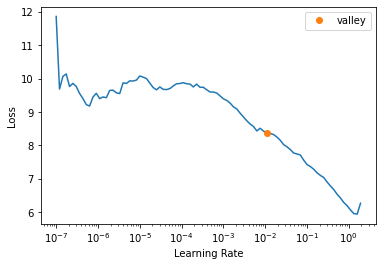

<Figure size 720x720 with 0 Axes>

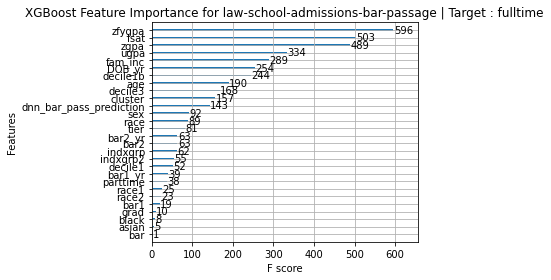

Target Variable: bar2_yr
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:00<00:24,  1.67it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.45195000223284965, 'Adjusted R-Squared': 0.4469689873579147, 'RMSE': 0.37610888798045766, 'Time taken': 0.5968246459960938}


  5%|▍         | 2/42 [00:01<00:38,  1.03it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.6002699229869874, 'Adjusted R-Squared': 0.5966369306182754, 'RMSE': 0.3212084191539487, 'Time taken': 1.2246944904327393}
{'Model': 'BayesianRidge', 'R-Squared': 0.6056968204399282, 'Adjusted R-Squared': 0.6021131510473096, 'RMSE': 0.319020540085381, 'Time taken': 0.0905923843383789}


 10%|▉         | 4/42 [00:02<00:18,  2.09it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.31099908572026913, 'Adjusted R-Squared': 0.3047370223741267, 'RMSE': 0.42170952023843367, 'Time taken': 0.28156423568725586}
{'Model': 'DummyRegressor', 'R-Squared': -0.00026358037917617594, 'Adjusted R-Squared': -0.009354589945864022, 'RMSE': 0.5081135009448349, 'Time taken': 0.027265548706054688}
{'Model': 'ElasticNet', 'R-Squared': -0.00026358037917617594, 'Adjusted R-Squared': -0.009354589945864022, 'RMSE': 0.5081135009448349, 'Time taken': 0.049262285232543945}


 19%|█▉        | 8/42 [00:03<00:13,  2.43it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6061718559999281, 'Adjusted R-Squared': 0.602592504022144, 'RMSE': 0.3188283126574007, 'Time taken': 1.3370115756988525}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.24122684123624583, 'Adjusted R-Squared': 0.23433064489302569, 'RMSE': 0.4425470867173131, 'Time taken': 0.17922377586364746}


 24%|██▍       | 10/42 [00:10<00:43,  1.36s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.6223805480685234, 'Adjusted R-Squared': 0.6189485106361747, 'RMSE': 0.3121984087454829, 'Time taken': 6.254326581954956}
{'Model': 'GammaRegressor', 'R-Squared': 0.42534646212013927, 'Adjusted R-Squared': 0.4201236579384491, 'RMSE': 0.3851292897911463, 'Time taken': 0.1022496223449707}


 26%|██▌       | 11/42 [01:30<11:26, 22.15s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -10.717158858413692, 'Adjusted R-Squared': -10.823651592294755, 'RMSE': 1.7390603978565224, 'Time taken': 80.1314606666565}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.4312855899036291, 'Adjusted R-Squared': 0.4261167641617787, 'RMSE': 0.3831339372610572, 'Time taken': 0.09433484077453613}


 31%|███       | 13/42 [01:33<06:26, 13.34s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6549604599660261, 'Adjusted R-Squared': 0.6518245287766238, 'RMSE': 0.29842688068391093, 'Time taken': 3.194495677947998}


 33%|███▎      | 14/42 [01:34<04:49, 10.33s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6528474940719604, 'Adjusted R-Squared': 0.6496923589511805, 'RMSE': 0.2993392448070835, 'Time taken': 0.5500972270965576}


 36%|███▌      | 15/42 [01:36<03:44,  8.31s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.5558733394866591, 'Adjusted R-Squared': 0.5518368437081991, 'RMSE': 0.3385765914453616, 'Time taken': 2.281627655029297}


 38%|███▊      | 16/42 [01:41<03:11,  7.35s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5806688106510195, 'Adjusted R-Squared': 0.5768576713385825, 'RMSE': 0.32898953943633114, 'Time taken': 4.683025360107422}


 43%|████▎     | 18/42 [02:13<04:05, 10.24s/it]

{'Model': 'KernelRidge', 'R-Squared': -39.93924926699873, 'Adjusted R-Squared': -40.31133030047814, 'RMSE': 3.2506741942329613, 'Time taken': 32.31202244758606}
{'Model': 'Lars', 'R-Squared': 0.6051817952570495, 'Adjusted R-Squared': 0.6015934449993504, 'RMSE': 0.3192288188967119, 'Time taken': 0.14241743087768555}


 45%|████▌     | 19/42 [02:13<02:50,  7.42s/it]

{'Model': 'LarsCV', 'R-Squared': 0.6061825970357548, 'Adjusted R-Squared': 0.6026033426790993, 'RMSE': 0.3188239648603589, 'Time taken': 0.3944668769836426}
{'Model': 'Lasso', 'R-Squared': -0.00026358037917617594, 'Adjusted R-Squared': -0.009354589945864022, 'RMSE': 0.5081135009448349, 'Time taken': 0.08536791801452637}


 50%|█████     | 21/42 [02:14<01:30,  4.30s/it]

{'Model': 'LassoCV', 'R-Squared': 0.6060713017569183, 'Adjusted R-Squared': 0.6024910358804347, 'RMSE': 0.31886901250830907, 'Time taken': 0.8867342472076416}
{'Model': 'LassoLars', 'R-Squared': -0.00026358037917617594, 'Adjusted R-Squared': -0.009354589945864022, 'RMSE': 0.5081135009448349, 'Time taken': 0.06288933753967285}


 57%|█████▋    | 24/42 [02:15<00:38,  2.13s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.6058926926509542, 'Adjusted R-Squared': 0.6023108034652522, 'RMSE': 0.31894129266368015, 'Time taken': 0.33000969886779785}
{'Model': 'LassoLarsIC', 'R-Squared': 0.606595945423716, 'Adjusted R-Squared': 0.6030204478310004, 'RMSE': 0.31865660307115146, 'Time taken': 0.1020500659942627}


 60%|█████▉    | 25/42 [02:15<00:28,  1.65s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.6053952765879929, 'Adjusted R-Squared': 0.601808866579704, 'RMSE': 0.3191425024515286, 'Time taken': 0.1050407886505127}


 62%|██████▏   | 26/42 [02:21<00:44,  2.80s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.47324728790404824, 'Adjusted R-Squared': 0.46845983583753614, 'RMSE': 0.3687286612071873, 'Time taken': 6.19077467918396}


 64%|██████▍   | 27/42 [02:32<01:12,  4.85s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.5835375954150523, 'Adjusted R-Squared': 0.5797525293799455, 'RMSE': 0.32786224439989087, 'Time taken': 10.494427680969238}


 67%|██████▋   | 28/42 [12:05<37:39, 161.42s/it]

{'Model': 'NuSVR', 'R-Squared': 0.5888976173816661, 'Adjusted R-Squared': 0.5851612665171724, 'RMSE': 0.3257455588069023, 'Time taken': 573.5000894069672}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.4733385493923613, 'Adjusted R-Squared': 0.4685519267662883, 'RMSE': 0.36869671814996013, 'Time taken': 0.0468449592590332}


 74%|███████▍  | 31/42 [12:06<12:36, 68.80s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5446066833339722, 'Adjusted R-Squared': 0.5404677892668233, 'RMSE': 0.3428442204625581, 'Time taken': 0.17668676376342773}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.04599326217073352, 'Adjusted R-Squared': 0.03732266319021005, 'RMSE': 0.4962256706654974, 'Time taken': 0.1291522979736328}


 76%|███████▌  | 32/42 [12:06<08:33, 51.31s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.5421004225965188, 'Adjusted R-Squared': 0.537938750092978, 'RMSE': 0.3437863489342826, 'Time taken': 0.11539030075073242}


 79%|███████▊  | 33/42 [12:06<05:39, 37.72s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [12:18<01:42, 17.09s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6437662148106269, 'Adjusted R-Squared': 0.6405285434481383, 'RMSE': 0.30322922723269735, 'Time taken': 11.56804084777832}
{'Model': 'Ridge', 'R-Squared': 0.6054368304501849, 'Adjusted R-Squared': 0.6018507981089092, 'RMSE': 0.31912569835374865, 'Time taken': 0.05507969856262207}
{'Model': 'RidgeCV', 'R-Squared': 0.6057802138389772, 'Adjusted R-Squared': 0.6021973023767715, 'RMSE': 0.3189868025765293, 'Time taken': 0.13040637969970703}


 88%|████████▊ | 37/42 [12:18<01:05, 13.03s/it]

{'Model': 'SGDRegressor', 'R-Squared': -453474552.5527451, 'Adjusted R-Squared': -457596007.72262615, 'RMSE': 10818.821796721551, 'Time taken': 0.10821247100830078}


 95%|█████████▌| 40/42 [12:30<00:14,  7.35s/it]

{'Model': 'SVR', 'R-Squared': 0.6008979170348656, 'Adjusted R-Squared': 0.5972706322616405, 'RMSE': 0.32095600349162784, 'Time taken': 11.604100465774536}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6053952765879929, 'Adjusted R-Squared': 0.601808866579704, 'RMSE': 0.3191425024515286, 'Time taken': 0.05112099647521973}
{'Model': 'TweedieRegressor', 'R-Squared': 0.4312855899036291, 'Adjusted R-Squared': 0.4261167641617787, 'RMSE': 0.3831339372610572, 'Time taken': 0.0653233528137207}
{'Model': 'XGBRegressor', 'R-Squared': 0.6338494387433544, 'Adjusted R-Squared': 0.6305216376312011, 'RMSE': 0.30742088, 'Time taken': 1.4046289920806885}


100%|██████████| 42/42 [12:31<00:00, 17.90s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.6566354768490215, 'Adjusted R-Squared': 0.6535147692414892, 'RMSE': 0.2977016330740384, 'Time taken': 0.3109903335571289}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: bar2_yr
bar2_yr
Target Standard Deviation: 0.495876817626632
                               Adjusted R-Squared     R-Squared     RMSE  \
Model                                                                      
LGBMRegressor                                0.65          0.66     0.30   
GradientBoostingRegressor                    0.65          0.65     0.30   
HistGradientBoostingRegressor                0.65          0.65     0.30   
RandomForestRegressor                        0.64          0.64     0.30   
XGBRegressor                                 0.63          0.63     0.31   
ExtraTreesRegressor                          0.62          0.62     0.31   
LassoLarsIC                                  0.60          0.61     0.32   
LarsCV

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.845282,0.651063,0.806885,00:15
1,0.257268,0.125316,0.353999,00:16
2,0.112584,0.428760,0.654797,00:16


Better model found at epoch 0 with _rmse value: 0.8068848848342896.
Better model found at epoch 1 with _rmse value: 0.3539993166923523.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       3       3.01
1       3       3.13
2       3       3.03
3       4       4.10
4       3       3.39
XGBoost RMSE:  0.30749622


<Figure size 432x288 with 0 Axes>

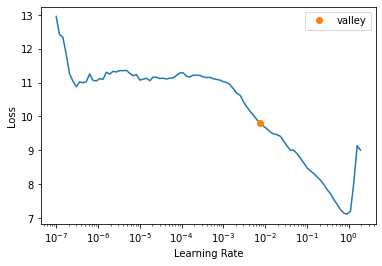

<Figure size 720x720 with 0 Axes>

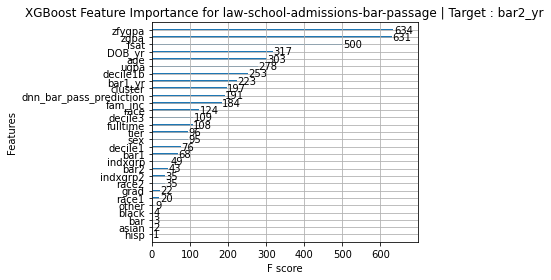

Target Variable: bar1_yr
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:01<01:08,  1.67s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.4769696360611402, 'Adjusted R-Squared': 0.47221601498015076, 'RMSE': 0.4978675756594516, 'Time taken': 1.6729166507720947}


  5%|▍         | 2/42 [00:02<00:42,  1.07s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.983628132563879, 'Adjusted R-Squared': 0.9834793349805162, 'RMSE': 0.08808450169990098, 'Time taken': 0.6466407775878906}
{'Model': 'BayesianRidge', 'R-Squared': 0.3398594138735912, 'Adjusted R-Squared': 0.33385965090955416, 'RMSE': 0.559330638456162, 'Time taken': 0.09230160713195801}


 10%|▉         | 4/42 [00:02<00:18,  2.06it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9672773764977595, 'Adjusted R-Squared': 0.9669799732041264, 'RMSE': 0.12453013240552854, 'Time taken': 0.18075203895568848}
{'Model': 'DummyRegressor', 'R-Squared': -0.0001189128884071522, 'Adjusted R-Squared': -0.00920860762811504, 'RMSE': 0.6884560363776218, 'Time taken': 0.02796149253845215}
{'Model': 'ElasticNet', 'R-Squared': -0.0001189128884071522, 'Adjusted R-Squared': -0.00920860762811504, 'RMSE': 0.6884560363776218, 'Time taken': 0.04918479919433594}


 19%|█▉        | 8/42 [00:03<00:11,  2.88it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.33466378832699806, 'Adjusted R-Squared': 0.3286168043279504, 'RMSE': 0.5615274257450817, 'Time taken': 0.9524292945861816}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.7049686042297987, 'Adjusted R-Squared': 0.7022871777597842, 'RMSE': 0.37392500578990095, 'Time taken': 0.13197612762451172}


 24%|██▍       | 10/42 [00:08<00:31,  1.02it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9277566807413534, 'Adjusted R-Squared': 0.9271000890995177, 'RMSE': 0.18503302032152166, 'Time taken': 4.322638988494873}
{'Model': 'GammaRegressor', 'R-Squared': 0.1566934581635202, 'Adjusted R-Squared': 0.14902897053259034, 'RMSE': 0.6321834566345408, 'Time taken': 0.10195755958557129}


 26%|██▌       | 11/42 [01:29<11:24, 22.07s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -8.952365103758885, 'Adjusted R-Squared': -9.042818308438338, 'RMSE': 2.171768561526353, 'Time taken': 80.89848279953003}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.14895682391343523, 'Adjusted R-Squared': 0.1412220210002526, 'RMSE': 0.635076713982981, 'Time taken': 0.08708000183105469}


 31%|███       | 13/42 [01:32<06:25, 13.29s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9605303486723493, 'Adjusted R-Squared': 0.9601716242472558, 'RMSE': 0.13676722558262341, 'Time taken': 3.1923704147338867}


 33%|███▎      | 14/42 [01:33<04:50, 10.38s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9870442676475524, 'Adjusted R-Squared': 0.9869265179972903, 'RMSE': 0.07835764515252037, 'Time taken': 0.9186270236968994}


 36%|███▌      | 15/42 [01:35<03:46,  8.38s/it]

{'Model': 'HuberRegressor', 'R-Squared': -0.0807935827145283, 'Adjusted R-Squared': -0.09061649838676344, 'RMSE': 0.7156847624257051, 'Time taken': 2.411315679550171}


 38%|███▊      | 16/42 [01:40<03:13,  7.44s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.27533111333038074, 'Adjusted R-Squared': 0.2687448775515102, 'RMSE': 0.5860304734891599, 'Time taken': 4.8252997398376465}


 40%|████      | 17/42 [02:12<05:56, 14.25s/it]

{'Model': 'KernelRidge', 'R-Squared': -47.01403797281492, 'Adjusted R-Squared': -47.450419029876606, 'RMSE': 4.77017715197219, 'Time taken': 32.300870418548584}
{'Model': 'Lars', 'R-Squared': 0.33254485801130185, 'Adjusted R-Squared': 0.3264786158725508, 'RMSE': 0.5624208775338658, 'Time taken': 0.08008265495300293}


 45%|████▌     | 19/42 [02:13<03:06,  8.10s/it]

{'Model': 'LarsCV', 'R-Squared': 0.33157029524508597, 'Adjusted R-Squared': 0.3254951956815473, 'RMSE': 0.562831327974513, 'Time taken': 0.4069054126739502}
{'Model': 'Lasso', 'R-Squared': -0.0001189128884071522, 'Adjusted R-Squared': -0.00920860762811504, 'RMSE': 0.6884560363776218, 'Time taken': 0.08401370048522949}


 50%|█████     | 21/42 [02:14<01:47,  5.12s/it]

{'Model': 'LassoCV', 'R-Squared': 0.3397294545095997, 'Adjusted R-Squared': 0.33372851039506946, 'RMSE': 0.5593856923934225, 'Time taken': 0.6321094036102295}
{'Model': 'LassoLars', 'R-Squared': -0.0001189128884071522, 'Adjusted R-Squared': -0.00920860762811504, 'RMSE': 0.6884560363776218, 'Time taken': 0.05579876899719238}


 60%|█████▉    | 25/42 [02:14<00:38,  2.26s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.33157029524508597, 'Adjusted R-Squared': 0.3254951956815473, 'RMSE': 0.562831327974513, 'Time taken': 0.2953674793243408}
{'Model': 'LassoLarsIC', 'R-Squared': 0.32923169242897754, 'Adjusted R-Squared': 0.32313533820717577, 'RMSE': 0.563815043736506, 'Time taken': 0.07960033416748047}
{'Model': 'LinearRegression', 'R-Squared': 0.342014053899134, 'Adjusted R-Squared': 0.33603387362656867, 'RMSE': 0.558417089740041, 'Time taken': 0.07218551635742188}


 62%|██████▏   | 26/42 [02:20<00:47,  2.94s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.07699658242301965, 'Adjusted R-Squared': -0.08678498862529915, 'RMSE': 0.7144264989560645, 'Time taken': 5.764020919799805}


 64%|██████▍   | 27/42 [02:30<01:06,  4.43s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.6273394604554565, 'Adjusted R-Squared': 0.6239524926635849, 'RMSE': 0.4202493944376345, 'Time taken': 9.80159330368042}


 67%|██████▋   | 28/42 [10:59<28:53, 123.82s/it]

{'Model': 'NuSVR', 'R-Squared': 0.8986478058223422, 'Adjusted R-Squared': 0.8977266548527901, 'RMSE': 0.21916286530274945, 'Time taken': 509.2276976108551}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.21950281196444887, 'Adjusted R-Squared': 0.21240917430494877, 'RMSE': 0.6081855024278117, 'Time taken': 0.045350074768066406}


 74%|███████▍  | 31/42 [10:59<10:31, 57.44s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.22753814194688182, 'Adjusted R-Squared': 0.2205175342998451, 'RMSE': 0.6050467246973606, 'Time taken': 0.22023725509643555}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.1963599599873227, 'Adjusted R-Squared': 0.18905598587965888, 'RMSE': 0.6171364179621878, 'Time taken': 0.15790867805480957}


 76%|███████▌  | 32/42 [11:00<07:15, 43.59s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.22923896544667943, 'Adjusted R-Squared': 0.22223381592789138, 'RMSE': 0.6043802550438377, 'Time taken': 0.2259197235107422}


 79%|███████▊  | 33/42 [11:00<04:52, 32.48s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [11:06<01:26, 14.38s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9835665401418998, 'Adjusted R-Squared': 0.9834171827687891, 'RMSE': 0.0882500370227529, 'Time taken': 5.9484124183654785}
{'Model': 'Ridge', 'R-Squared': 0.34202811039282754, 'Adjusted R-Squared': 0.33604805787430747, 'RMSE': 0.558411125001532, 'Time taken': 0.03893589973449707}
{'Model': 'RidgeCV', 'R-Squared': 0.3414747852317914, 'Adjusted R-Squared': 0.33548970375447373, 'RMSE': 0.5586458751463429, 'Time taken': 0.08358526229858398}


 88%|████████▊ | 37/42 [11:06<00:55, 11.00s/it]

{'Model': 'SGDRegressor', 'R-Squared': -9834.974878439702, 'Adjusted R-Squared': -9924.370257289444, 'RMSE': 68.27458948520835, 'Time taken': 0.11758136749267578}


 95%|█████████▌| 40/42 [11:14<00:11,  5.94s/it]

{'Model': 'SVR', 'R-Squared': 0.8964761627986529, 'Adjusted R-Squared': 0.8955352746039424, 'RMSE': 0.22149838941113992, 'Time taken': 7.7728705406188965}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.342014053899134, 'Adjusted R-Squared': 0.33603387362656867, 'RMSE': 0.558417089740041, 'Time taken': 0.04822516441345215}
{'Model': 'TweedieRegressor', 'R-Squared': 0.14895682391343523, 'Adjusted R-Squared': 0.1412220210002526, 'RMSE': 0.635076713982981, 'Time taken': 0.06592774391174316}


 98%|█████████▊| 41/42 [11:15<00:04,  4.89s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9778134983827543, 'Adjusted R-Squared': 0.9776118538338473, 'RMSE': 0.10254036, 'Time taken': 1.3900096416473389}


100%|██████████| 42/42 [11:16<00:00, 16.10s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9870508791442144, 'Adjusted R-Squared': 0.9869331895832933, 'RMSE': 0.07833764908415163, 'Time taken': 0.343855619430542}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: bar1_yr
bar1_yr
Target Standard Deviation: 0.685176754362997
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.99       0.99  0.08        0.34
HistGradientBoostingRegressor                0.99       0.99  0.08        0.92
BaggingRegressor                             0.98       0.98  0.09        0.65
RandomForestRegressor                        0.98       0.98  0.09        5.95
XGBRegressor                                 0.98       0.98  0.10        1.39
DecisionTreeRegressor                        0.97       0.97  0.12        0.18
GradientBoostingRegressor                    0.96       0.

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.214826,0.495860,0.704173,00:16
1,0.391998,0.267167,0.516882,00:15
2,0.103280,0.055180,0.234904,00:16
3,0.056126,0.007728,0.087908,00:15
4,0.054098,0.110841,0.332928,00:16


Better model found at epoch 0 with _rmse value: 0.7041734457015991.
Better model found at epoch 1 with _rmse value: 0.5168819427490234.
Better model found at epoch 2 with _rmse value: 0.23490433394908905.
Better model found at epoch 3 with _rmse value: 0.08790804445743561.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       5       5.00
1       5       5.00
2       5       5.00
3       5       5.01
4       5       5.00
XGBoost RMSE:  0.10253853


<Figure size 432x288 with 0 Axes>

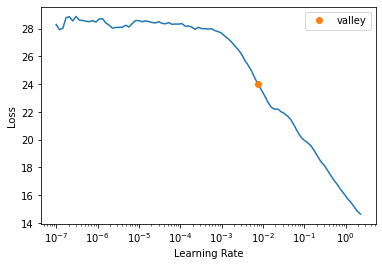

<Figure size 720x720 with 0 Axes>

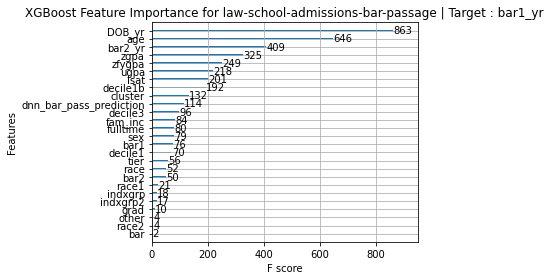

Target Variable: zgpa
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:00<00:38,  1.06it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8890306192402858, 'Adjusted R-Squared': 0.8880220613742545, 'RMSE': 30.84848425603009, 'Time taken': 0.9406948089599609}


  7%|▋         | 3/42 [00:02<00:25,  1.54it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9280455101057465, 'Adjusted R-Squared': 0.9273915435225117, 'RMSE': 24.8405494527625, 'Time taken': 1.2286031246185303}
{'Model': 'BayesianRidge', 'R-Squared': 0.8648156728896005, 'Adjusted R-Squared': 0.8635870347234873, 'RMSE': 34.04829901665623, 'Time taken': 0.10277056694030762}


 10%|▉         | 4/42 [00:02<00:19,  1.96it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9073908678779082, 'Adjusted R-Squared': 0.9065491792244381, 'RMSE': 28.181178815296388, 'Time taken': 0.2916738986968994}
{'Model': 'DummyRegressor', 'R-Squared': -0.0006377289934882402, 'Adjusted R-Squared': -0.00973213905250514, 'RMSE': 92.63405713514749, 'Time taken': 0.02996683120727539}
{'Model': 'ElasticNet', 'R-Squared': 0.7638246803978384, 'Adjusted R-Squared': 0.7616781740848675, 'RMSE': 45.003832992931066, 'Time taken': 0.06526732444763184}


 19%|█▉        | 8/42 [00:03<00:10,  3.33it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8443397166801848, 'Adjusted R-Squared': 0.8429249804520824, 'RMSE': 36.53601330849102, 'Time taken': 0.5876681804656982}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9064968682020923, 'Adjusted R-Squared': 0.9056470543306647, 'RMSE': 28.316875228586852, 'Time taken': 0.1848907470703125}


 21%|██▏       | 9/42 [00:13<01:29,  2.70s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9271710012997166, 'Adjusted R-Squared': 0.9265090866435162, 'RMSE': 24.991045086410562, 'Time taken': 9.987947225570679}
{'Model': 'GammaRegressor', 'R-Squared': 0.7276887764336605, 'Adjusted R-Squared': 0.7252138448385107, 'RMSE': 48.3242385229355, 'Time taken': 0.08026409149169922}


 29%|██▊       | 12/42 [01:34<07:05, 14.18s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.9464449831808102, 'Adjusted R-Squared': -0.9641354702786413, 'RMSE': 129.19726345020538, 'Time taken': 80.86987900733948}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7263316781631819, 'Adjusted R-Squared': 0.7238444124257102, 'RMSE': 48.444503922029654, 'Time taken': 0.102996826171875}


 31%|███       | 13/42 [01:37<05:30, 11.41s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9281002127051614, 'Adjusted R-Squared': 0.9274467432927367, 'RMSE': 24.831105281958045, 'Time taken': 2.9070467948913574}


 33%|███▎      | 14/42 [01:38<04:04,  8.73s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9288338037581735, 'Adjusted R-Squared': 0.9281870016716535, 'RMSE': 24.704105050757295, 'Time taken': 1.0968270301818848}


 36%|███▌      | 15/42 [01:41<03:15,  7.24s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8570422763400551, 'Adjusted R-Squared': 0.8557429887733402, 'RMSE': 35.013543130101645, 'Time taken': 3.2211215496063232}


 38%|███▊      | 16/42 [01:49<03:14,  7.48s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7742654767785366, 'Adjusted R-Squared': 0.7722138628335802, 'RMSE': 43.9978282923967, 'Time taken': 8.091172218322754}


 40%|████      | 17/42 [02:23<06:13, 14.94s/it]

{'Model': 'KernelRidge', 'R-Squared': -8.585752184620398, 'Adjusted R-Squared': -8.672873385995388, 'RMSE': 286.7116546541111, 'Time taken': 33.65227198600769}
{'Model': 'Lars', 'R-Squared': 0.8653264364622637, 'Adjusted R-Squared': 0.8641024404291007, 'RMSE': 33.98391622549493, 'Time taken': 0.07153010368347168}


 48%|████▊     | 20/42 [02:24<02:19,  6.35s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8612485445336484, 'Adjusted R-Squared': 0.8599874861148682, 'RMSE': 34.494592772593656, 'Time taken': 0.4233274459838867}
{'Model': 'Lasso', 'R-Squared': 0.8664238525442627, 'Adjusted R-Squared': 0.8652098305022514, 'RMSE': 33.84517042462105, 'Time taken': 0.1339273452758789}


 50%|█████     | 21/42 [02:24<01:42,  4.87s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8652003599122696, 'Adjusted R-Squared': 0.863975218018011, 'RMSE': 33.99981976477656, 'Time taken': 0.570080041885376}
{'Model': 'LassoLars', 'R-Squared': -0.0006377289934882402, 'Adjusted R-Squared': -0.00973213905250514, 'RMSE': 92.63405713514749, 'Time taken': 0.058129072189331055}


 60%|█████▉    | 25/42 [02:25<00:31,  1.83s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8657907970106868, 'Adjusted R-Squared': 0.8645710213712989, 'RMSE': 33.925276592430535, 'Time taken': 0.30596113204956055}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8662841403524911, 'Adjusted R-Squared': 0.8650688485202997, 'RMSE': 33.862865751322595, 'Time taken': 0.08562254905700684}
{'Model': 'LinearRegression', 'R-Squared': 0.8647836212585329, 'Adjusted R-Squared': 0.8635546917875173, 'RMSE': 34.05233513113671, 'Time taken': 0.07696199417114258}


 62%|██████▏   | 26/42 [02:25<00:24,  1.52s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8543446794611145, 'Adjusted R-Squared': 0.8530208744776759, 'RMSE': 35.34235013872112, 'Time taken': 0.3657572269439697}


 64%|██████▍   | 27/42 [02:57<02:08,  8.57s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8976921825063655, 'Adjusted R-Squared': 0.8967623462453782, 'RMSE': 29.620109421312232, 'Time taken': 31.824368476867676}


 67%|██████▋   | 28/42 [03:24<03:03, 13.11s/it]

{'Model': 'NuSVR', 'R-Squared': 0.7647664377579539, 'Adjusted R-Squared': 0.7626284907140979, 'RMSE': 44.91401618630916, 'Time taken': 26.748679876327515}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8589850648406202, 'Adjusted R-Squared': 0.8577034345286441, 'RMSE': 34.77481310045307, 'Time taken': 0.04615449905395508}


 74%|███████▍  | 31/42 [03:24<01:05,  5.97s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8620385695282239, 'Adjusted R-Squared': 0.8607846913416589, 'RMSE': 34.396249686465666, 'Time taken': 0.18221259117126465}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8417504831348982, 'Adjusted R-Squared': 0.8403122143625822, 'RMSE': 36.83862780721365, 'Time taken': 0.15561175346374512}


 76%|███████▌  | 32/42 [03:25<00:46,  4.61s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.837706795625663, 'Adjusted R-Squared': 0.836231775338494, 'RMSE': 37.30632042747919, 'Time taken': 0.4559969902038574}


 79%|███████▊  | 33/42 [03:25<00:31,  3.47s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.8545867384963013, 'Adjusted R-Squared': 0.8532651334939956, 'RMSE': 35.312970874095235, 'Time taken': 0.21857047080993652}


 81%|████████  | 34/42 [03:37<00:46,  5.77s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9288220699863133, 'Adjusted R-Squared': 0.9281751612560702, 'RMSE': 24.706141554044965, 'Time taken': 11.951427221298218}
{'Model': 'Ridge', 'R-Squared': 0.8648176468367789, 'Adjusted R-Squared': 0.8635890266111096, 'RMSE': 34.048050430926814, 'Time taken': 0.05503249168395996}


 88%|████████▊ | 37/42 [03:37<00:12,  2.56s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8648176468361859, 'Adjusted R-Squared': 0.8635890266105113, 'RMSE': 34.048050431001485, 'Time taken': 0.199951171875}
{'Model': 'SGDRegressor', 'R-Squared': -43670.29483476843, 'Adjusted R-Squared': -44067.20637580646, 'RMSE': 19352.19728993944, 'Time taken': 0.13539361953735352}


 95%|█████████▌| 40/42 [04:03<00:09,  4.92s/it]

{'Model': 'SVR', 'R-Squared': 0.777890259317107, 'Adjusted R-Squared': 0.7758715896214281, 'RMSE': 43.64314620465046, 'Time taken': 25.661181211471558}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8647836212585329, 'Adjusted R-Squared': 0.8635546917875173, 'RMSE': 34.05233513113671, 'Time taken': 0.05612063407897949}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7263316781631819, 'Adjusted R-Squared': 0.7238444124257102, 'RMSE': 48.444503922029654, 'Time taken': 0.13844633102416992}


 98%|█████████▊| 41/42 [04:04<00:04,  4.12s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9282731479679888, 'Adjusted R-Squared': 0.9276212502974126, 'RMSE': 24.801224, 'Time taken': 1.4510407447814941}


100%|██████████| 42/42 [04:05<00:00,  5.84s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9293652646968389, 'Adjusted R-Squared': 0.9287232928536393, 'RMSE': 24.61168848592855, 'Time taken': 0.3516879081726074}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: zgpa
zgpa
Target Standard Deviation: 94.38289782444451
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
LGBMRegressor                                0.93       0.93    24.61   
HistGradientBoostingRegressor                0.93       0.93    24.70   
RandomForestRegressor                        0.93       0.93    24.71   
XGBRegressor                                 0.93       0.93    24.80   
GradientBoostingRegressor                    0.93       0.93    24.83   
BaggingRegressor                             0.93       0.93    24.84   
ExtraTreesRegressor                          0.93       0.93    24.99   
DecisionTreeRegressor                   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,12358.469727,10744.554688,103.655945,00:15
1,3051.698730,4685.523438,68.450890,00:16
2,1643.711792,7670.431641,87.581001,00:15


Better model found at epoch 0 with _rmse value: 103.65594482421875.
Better model found at epoch 1 with _rmse value: 68.45088958740234.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0     161     170.34
1     348     353.91
2     241     242.62
3     217     214.89
4     405     399.75
XGBoost RMSE:  24.801924


<Figure size 432x288 with 0 Axes>

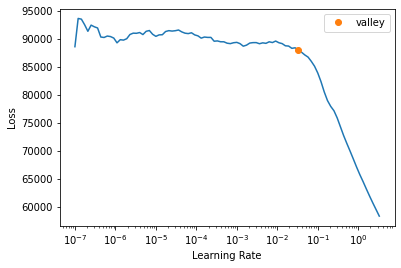

<Figure size 720x720 with 0 Axes>

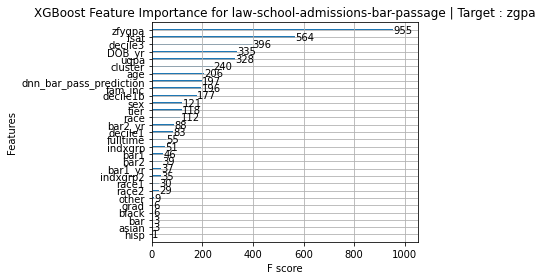

Target Variable: DOB_yr
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:01<01:18,  1.91s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8419451859450519, 'Adjusted R-Squared': 0.8405086867514194, 'RMSE': 2.1743160408702193, 'Time taken': 1.9142985343933105}


  5%|▍         | 2/42 [00:02<00:44,  1.12s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9238706144101063, 'Adjusted R-Squared': 0.9231787038114605, 'RMSE': 1.5090199039559642, 'Time taken': 0.5600810050964355}
{'Model': 'BayesianRidge', 'R-Squared': 0.8257438940920659, 'Adjusted R-Squared': 0.8241601476107012, 'RMSE': 2.2830362543123868, 'Time taken': 0.09465217590332031}


 10%|▉         | 4/42 [00:02<00:19,  1.99it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9237034543984256, 'Adjusted R-Squared': 0.9230100245469597, 'RMSE': 1.5106756999883422, 'Time taken': 0.1753709316253662}
{'Model': 'DummyRegressor', 'R-Squared': -0.00015407693480162798, 'Adjusted R-Squared': -0.009244091266953358, 'RMSE': 5.4695583595192225, 'Time taken': 0.030010700225830078}
{'Model': 'ElasticNet', 'R-Squared': 0.660187473992109, 'Adjusted R-Squared': 0.6570990491154909, 'RMSE': 3.1881481730162995, 'Time taken': 0.04343461990356445}


 19%|█▉        | 8/42 [00:03<00:10,  3.19it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8257978170874447, 'Adjusted R-Squared': 0.82421456069137, 'RMSE': 2.2826829878426715, 'Time taken': 0.7035746574401855}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9227752522325142, 'Adjusted R-Squared': 0.922073386309861, 'RMSE': 1.5198371466957368, 'Time taken': 0.12829804420471191}


 24%|██▍       | 10/42 [00:06<00:24,  1.29it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9239159650299837, 'Adjusted R-Squared': 0.923224466605616, 'RMSE': 1.5085703720024604, 'Time taken': 3.1604111194610596}
{'Model': 'GammaRegressor', 'R-Squared': 0.6323219841207277, 'Adjusted R-Squared': 0.6289803005631276, 'RMSE': 3.3162910394410616, 'Time taken': 0.146864652633667}


 29%|██▊       | 12/42 [01:26<07:50, 15.68s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -12.305286124203437, 'Adjusted R-Squared': -12.426212733764489, 'RMSE': 19.94944945242172, 'Time taken': 79.51228213310242}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6105909062097834, 'Adjusted R-Squared': 0.6070517172735431, 'RMSE': 3.412886538632446, 'Time taken': 0.11385416984558105}


 31%|███       | 13/42 [01:29<05:52, 12.14s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9172708485476392, 'Adjusted R-Squared': 0.916518955224669, 'RMSE': 1.5730701519709147, 'Time taken': 3.081563711166382}


 33%|███▎      | 14/42 [01:30<04:08,  8.86s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9244470676886164, 'Adjusted R-Squared': 0.9237603962513001, 'RMSE': 1.5032958828399527, 'Time taken': 0.6854233741760254}


 36%|███▌      | 15/42 [01:32<03:09,  7.00s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8060412558535099, 'Adjusted R-Squared': 0.804278439698682, 'RMSE': 2.4086488357000966, 'Time taken': 2.470426321029663}


 38%|███▊      | 16/42 [01:37<02:43,  6.28s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7088489033168153, 'Adjusted R-Squared': 0.7062027433873543, 'RMSE': 2.9510598735350313, 'Time taken': 4.530487537384033}


 40%|████      | 17/42 [02:08<05:40, 13.61s/it]

{'Model': 'KernelRidge', 'R-Squared': -64.92814484455366, 'Adjusted R-Squared': -65.52734030388311, 'RMSE': 44.40728618383573, 'Time taken': 31.114591598510742}
{'Model': 'Lars', 'R-Squared': 0.8254441090906063, 'Adjusted R-Squared': 0.8238576379790844, 'RMSE': 2.284999244109094, 'Time taken': 0.07044005393981934}


 45%|████▌     | 19/42 [02:08<02:52,  7.49s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8256147345066454, 'Adjusted R-Squared': 0.8240298141436662, 'RMSE': 2.2838821971098575, 'Time taken': 0.4117612838745117}
{'Model': 'Lasso', 'R-Squared': 0.734170938158514, 'Adjusted R-Squared': 0.7317549204290785, 'RMSE': 2.8198112251275522, 'Time taken': 0.06717324256896973}


 52%|█████▏    | 22/42 [02:10<01:14,  3.74s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8259335511824994, 'Adjusted R-Squared': 0.8243515284212195, 'RMSE': 2.281793509069983, 'Time taken': 1.0901448726654053}
{'Model': 'LassoLars', 'R-Squared': -0.00015407693480162798, 'Adjusted R-Squared': -0.009244091266953358, 'RMSE': 5.4695583595192225, 'Time taken': 0.13503146171569824}


 55%|█████▍    | 23/42 [02:10<00:56,  2.97s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8252082783140267, 'Adjusted R-Squared': 0.8236196638276103, 'RMSE': 2.286542277854347, 'Time taken': 0.4894988536834717}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8251288476207449, 'Adjusted R-Squared': 0.8235395112194187, 'RMSE': 2.287061756144506, 'Time taken': 0.0934603214263916}


 60%|█████▉    | 25/42 [02:10<00:30,  1.80s/it]

{'Model': 'LinearRegression', 'R-Squared': -1.5333594037328208e+22, 'Adjusted R-Squared': -1.5472955154557143e+22, 'RMSE': 677237169999.973, 'Time taken': 0.10744833946228027}


 62%|██████▏   | 26/42 [02:13<00:31,  1.99s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8060412865066322, 'Adjusted R-Squared': 0.8042784706303986, 'RMSE': 2.408648645369388, 'Time taken': 2.6323602199554443}


 64%|██████▍   | 27/42 [02:45<02:18,  9.25s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9035108621181884, 'Adjusted R-Squared': 0.9026339095901033, 'RMSE': 1.698861673727672, 'Time taken': 31.8396577835083}


 67%|██████▋   | 28/42 [03:24<03:58, 17.03s/it]

{'Model': 'NuSVR', 'R-Squared': 0.860913535747645, 'Adjusted R-Squared': 0.8596494325633266, 'RMSE': 2.0396762511581294, 'Time taken': 39.45417881011963}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8206413865507869, 'Adjusted R-Squared': 0.8190112653480169, 'RMSE': 2.316220626070442, 'Time taken': 0.043883323669433594}


 74%|███████▍  | 31/42 [03:25<01:23,  7.60s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8234833790613706, 'Adjusted R-Squared': 0.8218790876314815, 'RMSE': 2.2977967367424714, 'Time taken': 0.1946394443511963}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8091066377923237, 'Adjusted R-Squared': 0.8073716817106584, 'RMSE': 2.3895395298104396, 'Time taken': 0.1457231044769287}


 76%|███████▌  | 32/42 [03:25<00:57,  5.76s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8286907919168474, 'Adjusted R-Squared': 0.8271338286522694, 'RMSE': 2.2636493814518612, 'Time taken': 0.1919093132019043}
{'Model': 'RANSACRegressor', 'R-Squared': -2.038932162958906e+20, 'Adjusted R-Squared': -2.0574632303324283e+20, 'RMSE': 78094454219.61589, 'Time taken': 0.0926513671875}


 86%|████████▌ | 36/42 [03:30<00:16,  2.71s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9240615213453074, 'Adjusted R-Squared': 0.9233713458261029, 'RMSE': 1.507126658706126, 'Time taken': 4.358011484146118}
{'Model': 'Ridge', 'R-Squared': 0.82574322540602, 'Adjusted R-Squared': 0.8241594728472259, 'RMSE': 2.2830406347414485, 'Time taken': 0.03950953483581543}
{'Model': 'RidgeCV', 'R-Squared': 0.8257434901608142, 'Adjusted R-Squared': 0.8241597400082742, 'RMSE': 2.2830389003865452, 'Time taken': 0.08706045150756836}


 88%|████████▊ | 37/42 [03:30<00:10,  2.18s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.8294871639351575, 'Adjusted R-Squared': 0.8279374385884435, 'RMSE': 2.2583816932464784, 'Time taken': 0.18162059783935547}


 95%|█████████▌| 40/42 [03:46<00:06,  3.21s/it]

{'Model': 'SVR', 'R-Squared': 0.8611630197820677, 'Adjusted R-Squared': 0.859901184061834, 'RMSE': 2.0378461124007057, 'Time taken': 15.614823818206787}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -1.5333594037328208e+22, 'Adjusted R-Squared': -1.5472955154557143e+22, 'RMSE': 677237169999.973, 'Time taken': 0.050514936447143555}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6105909062097834, 'Adjusted R-Squared': 0.6070517172735431, 'RMSE': 3.412886538632446, 'Time taken': 0.06962394714355469}


 98%|█████████▊| 41/42 [03:47<00:02,  2.80s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9216116121712701, 'Adjusted R-Squared': 0.9208991703732812, 'RMSE': 1.531245, 'Time taken': 1.3530914783477783}


100%|██████████| 42/42 [03:47<00:00,  5.42s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9243731351270716, 'Adjusted R-Squared': 0.9236857917452425, 'RMSE': 1.5040312304668324, 'Time taken': 0.3547978401184082}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: DOB_yr
DOB_yr
Target Standard Deviation: 5.538920449523137
                                       Adjusted R-Squared  \
Model                                                       
HistGradientBoostingRegressor                        0.92   
LGBMRegressor                                        0.92   
RandomForestRegressor                                0.92   
ExtraTreesRegressor                                  0.92   
BaggingRegressor                                     0.92   
DecisionTreeRegressor                                0.92   
ExtraTreeRegressor                                   0.92   
XGBRegressor                                         0.92   
GradientBoostingRegressor                            0.92   
MLPRegressor         

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,69.776009,66.009865,8.124645,00:16
1,25.681692,33.530994,5.790595,00:16
2,21.054201,37.432564,6.118217,00:16


Better model found at epoch 0 with _rmse value: 8.124645233154297.
Better model found at epoch 1 with _rmse value: 5.790595054626465.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      48      48.00
1      44      44.00
2      46      46.00
3      41      41.00
4      48      48.00
XGBoost RMSE:  1.531245


<Figure size 432x288 with 0 Axes>

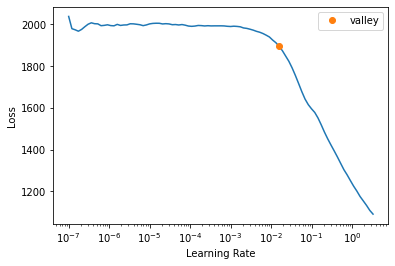

<Figure size 720x720 with 0 Axes>

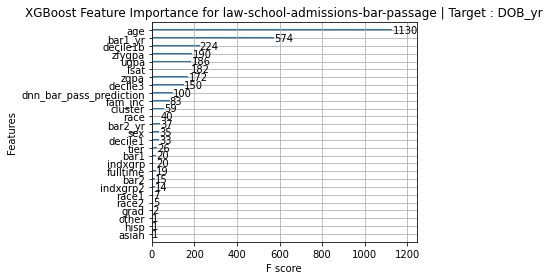

Target Variable: zfygpa
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:01<01:16,  1.86s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8818299676472522, 'Adjusted R-Squared': 0.8807559658384415, 'RMSE': 30.913123453103147, 'Time taken': 1.8609333038330078}


  7%|▋         | 3/42 [00:03<00:34,  1.12it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9434014586261364, 'Adjusted R-Squared': 0.942887056331398, 'RMSE': 21.393992071595495, 'Time taken': 1.29205322265625}
{'Model': 'BayesianRidge', 'R-Squared': 0.881387401612687, 'Adjusted R-Squared': 0.8803093774920248, 'RMSE': 30.970956698281068, 'Time taken': 0.13947629928588867}


 10%|▉         | 4/42 [00:03<00:25,  1.51it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9259075482211736, 'Adjusted R-Squared': 0.9252341505276523, 'RMSE': 24.478014862439373, 'Time taken': 0.30205726623535156}
{'Model': 'DummyRegressor', 'R-Squared': -7.644751865099053e-06, 'Adjusted R-Squared': -0.009096328218430871, 'RMSE': 89.92715854206837, 'Time taken': 0.027797460556030273}
{'Model': 'ElasticNet', 'R-Squared': 0.7954840818711449, 'Adjusted R-Squared': 0.7936253156372044, 'RMSE': 40.66799571723065, 'Time taken': 0.059717416763305664}


 17%|█▋        | 7/42 [00:04<00:13,  2.56it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8658333949176239, 'Adjusted R-Squared': 0.8646140064341689, 'RMSE': 32.93907706984251, 'Time taken': 0.5992038249969482}


 19%|█▉        | 8/42 [00:04<00:11,  2.86it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9251842984511698, 'Adjusted R-Squared': 0.9245043274196733, 'RMSE': 24.597195185742272, 'Time taken': 0.20576071739196777}


 24%|██▍       | 10/42 [00:14<01:04,  2.01s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9447681563827977, 'Adjusted R-Squared': 0.9442661754764055, 'RMSE': 21.13411085371321, 'Time taken': 9.729562044143677}
{'Model': 'GammaRegressor', 'R-Squared': 0.7528637042713957, 'Adjusted R-Squared': 0.7506175778774977, 'RMSE': 44.705141874331865, 'Time taken': 0.1496868133544922}


 26%|██▌       | 11/42 [01:31<11:37, 22.50s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.1996249872035962, 'Adjusted R-Squared': -1.2196165296270571, 'RMSE': 133.37165284304976, 'Time taken': 77.38191270828247}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7549498214103142, 'Adjusted R-Squared': 0.7527226549298223, 'RMSE': 44.516060372906665, 'Time taken': 0.08629274368286133}


 31%|███       | 13/42 [01:34<06:25, 13.31s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9443230430944535, 'Adjusted R-Squared': 0.9438170167252034, 'RMSE': 21.21909983883556, 'Time taken': 2.8576109409332275}


 33%|███▎      | 14/42 [01:35<04:49, 10.34s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9464017234333598, 'Adjusted R-Squared': 0.9459145893873111, 'RMSE': 20.819228113527142, 'Time taken': 0.8223080635070801}


 36%|███▌      | 15/42 [01:37<03:42,  8.25s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8742459658680723, 'Adjusted R-Squared': 0.8731030359946188, 'RMSE': 31.889680933912405, 'Time taken': 2.1206791400909424}


 38%|███▊      | 16/42 [01:42<03:10,  7.34s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8030932444658632, 'Adjusted R-Squared': 0.8013036349735054, 'RMSE': 39.90428367892304, 'Time taken': 4.799128293991089}


 40%|████      | 17/42 [02:21<06:43, 16.13s/it]

{'Model': 'KernelRidge', 'R-Squared': -8.658743155057937, 'Adjusted R-Squared': -8.746527743187725, 'RMSE': 279.4792182524215, 'Time taken': 39.279784202575684}
{'Model': 'Lars', 'R-Squared': 0.8809373008912702, 'Adjusted R-Squared': 0.879855185978896, 'RMSE': 31.02966399646815, 'Time taken': 0.08094310760498047}


 48%|████▊     | 20/42 [02:22<02:33,  6.99s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8826552429060388, 'Adjusted R-Squared': 0.8815887417054877, 'RMSE': 30.804988869294927, 'Time taken': 0.43011021614074707}
{'Model': 'Lasso', 'R-Squared': 0.8822290865102331, 'Adjusted R-Squared': 0.8811587121387028, 'RMSE': 30.860874816265433, 'Time taken': 0.1385505199432373}


 52%|█████▏    | 22/42 [02:23<01:19,  3.96s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8818837765416124, 'Adjusted R-Squared': 0.8808102637810716, 'RMSE': 30.906084484075862, 'Time taken': 0.5760042667388916}
{'Model': 'LassoLars', 'R-Squared': -7.644751865099053e-06, 'Adjusted R-Squared': -0.009096328218430871, 'RMSE': 89.92715854206837, 'Time taken': 0.09984803199768066}


 60%|█████▉    | 25/42 [02:23<00:28,  1.69s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8813959809654968, 'Adjusted R-Squared': 0.8803180348192604, 'RMSE': 30.969836599855917, 'Time taken': 0.320096492767334}
{'Model': 'LassoLarsIC', 'R-Squared': 0.882649546974176, 'Adjusted R-Squared': 0.881582994005499, 'RMSE': 30.805736499580174, 'Time taken': 0.0890510082244873}
{'Model': 'LinearRegression', 'R-Squared': 0.8813583652076786, 'Adjusted R-Squared': 0.8802800771863397, 'RMSE': 30.974747316751692, 'Time taken': 0.07007527351379395}


 62%|██████▏   | 26/42 [02:23<00:21,  1.37s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8806203794620475, 'Adjusted R-Squared': 0.879535384173139, 'RMSE': 31.070933975274862, 'Time taken': 0.36702442169189453}


 64%|██████▍   | 27/42 [02:56<02:18,  9.23s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9074638144678754, 'Adjusted R-Squared': 0.9066227887978031, 'RMSE': 27.35552208093133, 'Time taken': 32.19088411331177}


 67%|██████▋   | 28/42 [03:22<03:13, 13.82s/it]

{'Model': 'NuSVR', 'R-Squared': 0.7601049829537173, 'Adjusted R-Squared': 0.7579246697465307, 'RMSE': 44.04532558261345, 'Time taken': 26.422831296920776}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8653431927970354, 'Adjusted R-Squared': 0.8641193490557311, 'RMSE': 32.99919666323513, 'Time taken': 0.04785609245300293}


 74%|███████▍  | 31/42 [03:22<01:06,  6.06s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8806662223482737, 'Adjusted R-Squared': 0.8795816437076622, 'RMSE': 31.064967638412107, 'Time taken': 0.17968225479125977}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8702610076315467, 'Adjusted R-Squared': 0.8690818600109296, 'RMSE': 32.391008597120205, 'Time taken': 0.1247718334197998}


 79%|███████▊  | 33/42 [03:23<00:31,  3.45s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8542043693272594, 'Adjusted R-Squared': 0.8528792891191759, 'RMSE': 34.336930188027786, 'Time taken': 0.3963136672973633}
{'Model': 'RANSACRegressor', 'R-Squared': -4.7357591027255744e+17, 'Adjusted R-Squared': -4.7788005891426714e+17, 'RMSE': 61884802947.596565, 'Time taken': 0.1715695858001709}


 81%|████████  | 34/42 [03:35<00:45,  5.72s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9446010296258474, 'Adjusted R-Squared': 0.9440975297688745, 'RMSE': 21.166061692880284, 'Time taken': 11.711350679397583}
{'Model': 'Ridge', 'R-Squared': 0.8813863043169711, 'Adjusted R-Squared': 0.8803082702234116, 'RMSE': 30.9710999554897, 'Time taken': 0.06269621849060059}


 88%|████████▊ | 37/42 [03:35<00:12,  2.52s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8813863043159951, 'Adjusted R-Squared': 0.8803082702224267, 'RMSE': 30.971099955617124, 'Time taken': 0.16983795166015625}
{'Model': 'SGDRegressor', 'R-Squared': 0.8812398675087479, 'Adjusted R-Squared': 0.8801605025075652, 'RMSE': 30.9902120406237, 'Time taken': 0.17319178581237793}


 95%|█████████▌| 40/42 [04:01<00:09,  4.90s/it]

{'Model': 'SVR', 'R-Squared': 0.7650794197444692, 'Adjusted R-Squared': 0.7629443172730733, 'RMSE': 43.58627388237512, 'Time taken': 25.711674451828003}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8813583652076786, 'Adjusted R-Squared': 0.8802800771863397, 'RMSE': 30.974747316751692, 'Time taken': 0.05289959907531738}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7549498214103142, 'Adjusted R-Squared': 0.7527226549298223, 'RMSE': 44.516060372906665, 'Time taken': 0.07192635536193848}


 98%|█████████▊| 41/42 [04:02<00:04,  4.10s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9434345800492442, 'Adjusted R-Squared': 0.942920478782335, 'RMSE': 21.387732, 'Time taken': 1.4084136486053467}


100%|██████████| 42/42 [04:03<00:00,  5.79s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9458243132031777, 'Adjusted R-Squared': 0.9453319312984351, 'RMSE': 20.931069699901375, 'Time taken': 0.3447151184082031}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: zfygpa
zfygpa
Target Standard Deviation: 90.02305020196277
                                  Adjusted R-Squared              R-Squared  \
Model                                                                         
HistGradientBoostingRegressor                   0.95                   0.95   
LGBMRegressor                                   0.95                   0.95   
ExtraTreesRegressor                             0.94                   0.94   
RandomForestRegressor                           0.94                   0.94   
GradientBoostingRegressor                       0.94                   0.94   
XGBRegressor                                    0.94                   0.94   
BaggingRegressor                                0.94        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,10412.907227,6955.429688,83.399223,00:16
1,2429.968750,2749.489258,52.435574,00:16
2,1076.440063,1869.219727,43.234474,00:16
3,774.339600,1168.835693,34.188236,00:16
4,986.324890,2085.364746,45.665798,00:16


Better model found at epoch 0 with _rmse value: 83.39922332763672.
Better model found at epoch 1 with _rmse value: 52.43557357788086.
Better model found at epoch 2 with _rmse value: 43.234474182128906.
Better model found at epoch 3 with _rmse value: 34.188236236572266.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0     327     337.03
1     484     475.35
2     205     208.34
3     309     308.94
4     403     440.07
XGBoost RMSE:  21.387012


<Figure size 432x288 with 0 Axes>

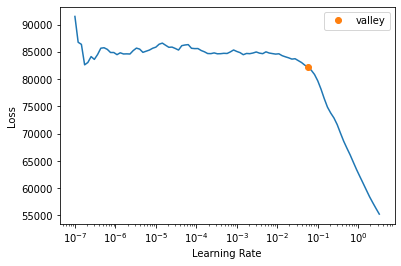

<Figure size 720x720 with 0 Axes>

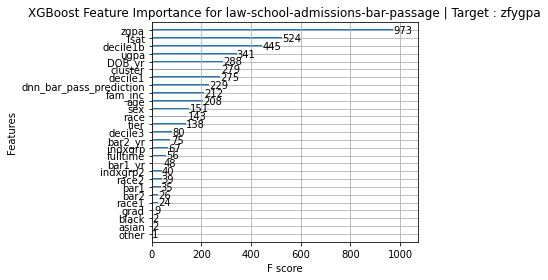

Target Variable: ugpa
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:00<00:08,  5.08it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9770469375796255, 'Adjusted R-Squared': 0.9768383260554817, 'RMSE': 0.5085443240702623, 'Time taken': 0.19658613204956055}


  5%|▍         | 2/42 [00:00<00:10,  3.74it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.3160586357116699}


 10%|▉         | 4/42 [00:00<00:07,  4.79it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9999993565148912, 'Adjusted R-Squared': 0.9999993506665035, 'RMSE': 0.0026926365904028355, 'Time taken': 0.2539966106414795}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12480449676513672}
{'Model': 'DummyRegressor', 'R-Squared': -0.0013434081646248597, 'Adjusted R-Squared': -0.010444231869226384, 'RMSE': 3.358922737107156, 'Time taken': 0.027749061584472656}
{'Model': 'ElasticNet', 'R-Squared': 0.8243006061251731, 'Adjusted R-Squared': 0.8227037421566061, 'RMSE': 1.4069984669269067, 'Time taken': 0.052851200103759766}


 17%|█▋        | 7/42 [00:01<00:07,  4.87it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999785223058142, 'Adjusted R-Squared': 0.9999783271033424, 'RMSE': 0.015556157076601197, 'Time taken': 0.5276963710784912}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08258605003356934}


 24%|██▍       | 10/42 [00:03<00:13,  2.44it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999999977800652, 'Adjusted R-Squared': 0.9999999977598891, 'RMSE': 0.00015815342630852327, 'Time taken': 1.7930774688720703}
{'Model': 'GammaRegressor', 'R-Squared': 0.8075790647851094, 'Adjusted R-Squared': 0.8058302251820455, 'RMSE': 1.4724299855811704, 'Time taken': 0.14745593070983887}


 29%|██▊       | 12/42 [01:26<07:22, 14.74s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.5698818042038347, 'Adjusted R-Squared': -0.5841498539264649, 'RMSE': 4.205735637322393, 'Time taken': 83.12763094902039}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7998900570620743, 'Adjusted R-Squared': 0.7980713350358776, 'RMSE': 1.5015604703452774, 'Time taken': 0.12229084968566895}


 31%|███       | 13/42 [01:29<05:39, 11.70s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999985139336, 'Adjusted R-Squared': 0.9999999985004273, 'RMSE': 0.00012939801028889918, 'Time taken': 3.1641736030578613}


 33%|███▎      | 14/42 [01:31<04:07,  8.85s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999979729916, 'Adjusted R-Squared': 0.9999999979545688, 'RMSE': 0.0001511249874147839, 'Time taken': 1.217580795288086}


 36%|███▌      | 15/42 [01:33<03:10,  7.05s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999998816059216, 'Adjusted R-Squared': 0.9999998805298835, 'RMSE': 0.0011549773922434666, 'Time taken': 2.4183292388916016}


 38%|███▊      | 16/42 [01:38<02:46,  6.39s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8461505245634373, 'Adjusted R-Squared': 0.8447522460691893, 'RMSE': 1.3166080390018065, 'Time taken': 4.743596315383911}


 40%|████      | 17/42 [02:10<05:44, 13.80s/it]

{'Model': 'KernelRidge', 'R-Squared': -6.79955658065744, 'Adjusted R-Squared': -6.870443739683865, 'RMSE': 9.37439931778962, 'Time taken': 31.928977489471436}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 1.6231414737664645e-14, 'Time taken': 0.07272052764892578}


 45%|████▌     | 19/42 [02:10<02:54,  7.61s/it]

{'Model': 'LarsCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 1.6231414737664645e-14, 'Time taken': 0.19116568565368652}
{'Model': 'Lasso', 'R-Squared': 0.9083587360932597, 'Adjusted R-Squared': 0.9075258440203885, 'RMSE': 1.0161411235157054, 'Time taken': 0.08150029182434082}


 52%|█████▏    | 22/42 [02:11<01:14,  3.75s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999989986565918, 'Adjusted R-Squared': 0.9999989895557682, 'RMSE': 0.0033589227371068875, 'Time taken': 0.658876895904541}
{'Model': 'LassoLars', 'R-Squared': -0.0013434081646248597, 'Adjusted R-Squared': -0.010444231869226384, 'RMSE': 3.358922737107156, 'Time taken': 0.12095808982849121}


 60%|█████▉    | 25/42 [02:11<00:29,  1.76s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 1.6231414737664645e-14, 'Time taken': 0.1715865135192871}
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 1.6231414737664645e-14, 'Time taken': 0.06822609901428223}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 8.313798807721056e-15, 'Time taken': 0.09572172164916992}


 62%|██████▏   | 26/42 [02:11<00:22,  1.40s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999999999725, 'Adjusted R-Squared': 0.9999999999999722, 'RMSE': 5.572730722547636e-07, 'Time taken': 0.1804344654083252}


 64%|██████▍   | 27/42 [02:27<01:11,  4.76s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9989787527874464, 'Adjusted R-Squared': 0.9989694710657469, 'RMSE': 0.10726892656141977, 'Time taken': 15.212342023849487}


 67%|██████▋   | 28/42 [03:18<03:53, 16.66s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9841356268235599, 'Adjusted R-Squared': 0.9839914416596236, 'RMSE': 0.42278537053409165, 'Time taken': 50.96210741996765}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 5.009822945873704e-15, 'Time taken': 0.0470881462097168}


 76%|███████▌  | 32/42 [03:18<01:00,  6.05s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 5.009822945873704e-15, 'Time taken': 0.23804879188537598}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.999861967331746, 'Adjusted R-Squared': 0.9998607128061068, 'RMSE': 0.03943659716055317, 'Time taken': 0.07131791114807129}
{'Model': 'PoissonRegressor', 'R-Squared': 0.9615484020718128, 'Adjusted R-Squared': 0.9611989303410845, 'RMSE': 0.6582118379241281, 'Time taken': 0.10265827178955078}


 79%|███████▊  | 33/42 [03:18<00:43,  4.79s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 2.951207917806318e-14, 'Time taken': 0.11728572845458984}


 86%|████████▌ | 36/42 [03:21<00:15,  2.62s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.7174525260925293}
{'Model': 'Ridge', 'R-Squared': 0.9999999842284016, 'Adjusted R-Squared': 0.9999999840850596, 'RMSE': 0.0004215473343605022, 'Time taken': 0.04105520248413086}
{'Model': 'RidgeCV', 'R-Squared': 0.9999999998417671, 'Adjusted R-Squared': 0.9999999998403291, 'RMSE': 4.222376091174742e-05, 'Time taken': 0.10246062278747559}


 88%|████████▊ | 37/42 [03:21<00:10,  2.07s/it]

{'Model': 'SGDRegressor', 'R-Squared': -3756.249649826369, 'Adjusted R-Squared': -3790.397841544054, 'RMSE': 205.75174107659132, 'Time taken': 0.14221668243408203}


 95%|█████████▌| 40/42 [03:33<00:05,  2.68s/it]

{'Model': 'SVR', 'R-Squared': 0.9835568536154623, 'Adjusted R-Squared': 0.983407408205252, 'RMSE': 0.430428435131735, 'Time taken': 11.997148513793945}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 8.313798807721056e-15, 'Time taken': 0.05843949317932129}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7998900570620743, 'Adjusted R-Squared': 0.7980713350358776, 'RMSE': 1.5015604703452774, 'Time taken': 0.12904667854309082}


 98%|█████████▊| 41/42 [03:34<00:02,  2.24s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999875073, 'Adjusted R-Squared': 0.9999999999873938, 'RMSE': 1.1864147e-05, 'Time taken': 0.7377297878265381}


100%|██████████| 42/42 [03:35<00:00,  5.12s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992935443, 'Adjusted R-Squared': 0.9999999992871236, 'RMSE': 8.921768618093444e-05, 'Time taken': 0.4052317142486572}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: ugpa
ugpa
Target Standard Deviation: 3.3055671691406006
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
OrthogonalMatchingPursuit                    1.00       1.00   0.00   
RANSACRegressor                              1.00       1.00   0.00   
DecisionTreeRegressor                        1.00       1.00   0.00   
TransformedTargetRegressor                   1.00       1.00   0.00   
LinearRegression                             1.00       1.00   0.00   
ExtraTreeRegressor                           1.00       1.00   0.00   
LassoLarsIC                                  1.00       1.00   0.00   
LassoLarsCV                                  1.00    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,12.554542,10.876376,3.297935,00:16
1,3.939903,3.885749,1.971230,00:16
2,2.036212,2.187382,1.478980,00:16
3,2.570487,5.325700,2.307748,00:16


Better model found at epoch 0 with _rmse value: 3.2979352474212646.
Better model found at epoch 1 with _rmse value: 1.9712302684783936.
Better model found at epoch 2 with _rmse value: 1.4789799451828003.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       6       6.00
1       8       8.00
2      12      12.00
3      12      12.00
4       8       8.00
XGBoost RMSE:  1.1864147e-05


<Figure size 432x288 with 0 Axes>

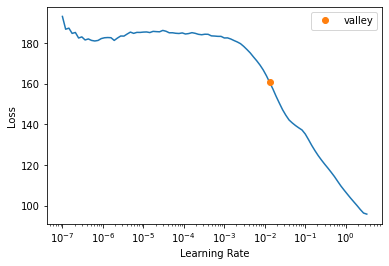

<Figure size 720x720 with 0 Axes>

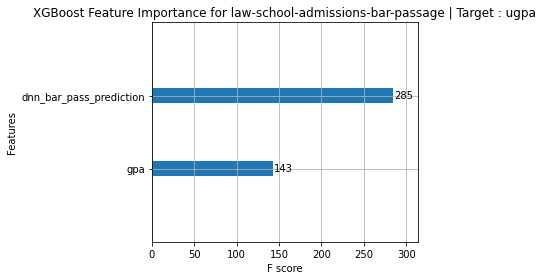

Target Variable: lsat
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:01<01:21,  1.99s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.928092823983422, 'Adjusted R-Squared': 0.9274392874177575, 'RMSE': 5.139742701588933, 'Time taken': 1.9904916286468506}


  5%|▍         | 2/42 [00:03<01:00,  1.50s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9396704203350075, 'Adjusted R-Squared': 0.9391221080734726, 'RMSE': 4.707826093037945, 'Time taken': 1.1547675132751465}
{'Model': 'BayesianRidge', 'R-Squared': 0.9372824579016867, 'Adjusted R-Squared': 0.9367124423713814, 'RMSE': 4.800094383365355, 'Time taken': 0.06200075149536133}


 10%|▉         | 4/42 [00:03<00:25,  1.51it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9022044576895903, 'Adjusted R-Squared': 0.9013156317559436, 'RMSE': 5.993973127811674, 'Time taken': 0.258772611618042}
{'Model': 'DummyRegressor', 'R-Squared': -0.0007455267055933579, 'Adjusted R-Squared': -0.009840916496404173, 'RMSE': 19.17419283066334, 'Time taken': 0.029948949813842773}
{'Model': 'ElasticNet', 'R-Squared': 0.8231985633556598, 'Adjusted R-Squared': 0.8215916833457643, 'RMSE': 8.059315485218374, 'Time taken': 0.06618523597717285}


 19%|█▉        | 8/42 [00:04<00:12,  2.66it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9358217610777818, 'Adjusted R-Squared': 0.9352384698378929, 'RMSE': 4.855669956610414, 'Time taken': 0.6456396579742432}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.8982491029248515, 'Adjusted R-Squared': 0.8973243282985689, 'RMSE': 6.113985231230433, 'Time taken': 0.1962730884552002}


 24%|██▍       | 10/42 [00:13<00:58,  1.82s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9369944127362171, 'Adjusted R-Squared': 0.9364217792745921, 'RMSE': 4.811104541288165, 'Time taken': 8.982435703277588}
{'Model': 'GammaRegressor', 'R-Squared': 0.7794566214523851, 'Adjusted R-Squared': 0.7774521878175167, 'RMSE': 9.001238593336224, 'Time taken': 0.09904360771179199}


 29%|██▊       | 12/42 [01:30<07:54, 15.83s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.740549344347969, 'Adjusted R-Squared': -2.774545753435706, 'RMSE': 37.07003158115153, 'Time taken': 77.3550488948822}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7596552074231855, 'Adjusted R-Squared': 0.7574708063798213, 'RMSE': 9.396640686054498, 'Time taken': 0.11484551429748535}


 31%|███       | 13/42 [01:34<05:54, 12.23s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9476694672812199, 'Adjusted R-Squared': 0.947193855269638, 'RMSE': 4.384628877472208, 'Time taken': 3.031686305999756}


 33%|███▎      | 14/42 [01:34<04:11,  8.97s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9473082913193931, 'Adjusted R-Squared': 0.946829396718913, 'RMSE': 4.3997338208884305, 'Time taken': 0.8550317287445068}


 36%|███▌      | 15/42 [01:37<03:09,  7.03s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9371545690074007, 'Adjusted R-Squared': 0.9365833911443021, 'RMSE': 4.804985886742559, 'Time taken': 2.2797231674194336}


 38%|███▊      | 16/42 [01:41<02:45,  6.36s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7893422511318268, 'Adjusted R-Squared': 0.7874276641691269, 'RMSE': 8.797190192194257, 'Time taken': 4.743695259094238}


 40%|████      | 17/42 [02:19<06:29, 15.58s/it]

{'Model': 'KernelRidge', 'R-Squared': -17.485027580626575, 'Adjusted R-Squared': -17.65303086083424, 'RMSE': 82.40722946052972, 'Time taken': 37.582977533340454}
{'Model': 'Lars', 'R-Squared': 0.886335398627428, 'Adjusted R-Squared': 0.8853023449416384, 'RMSE': 6.462013760699877, 'Time taken': 0.07323050498962402}


 48%|████▊     | 20/42 [02:20<02:22,  6.48s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9139884803681319, 'Adjusted R-Squared': 0.913206754867817, 'RMSE': 5.621258694219477, 'Time taken': 0.44514012336730957}
{'Model': 'Lasso', 'R-Squared': 0.9249510538448085, 'Adjusted R-Squared': 0.9242689629431203, 'RMSE': 5.250825201895609, 'Time taken': 0.09960508346557617}


 50%|█████     | 21/42 [02:20<01:43,  4.95s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9373935411445913, 'Adjusted R-Squared': 0.936824535207001, 'RMSE': 4.795841614978401, 'Time taken': 0.5909600257873535}
{'Model': 'LassoLars', 'R-Squared': -0.0007455267055933579, 'Adjusted R-Squared': -0.009840916496404173, 'RMSE': 19.17419283066334, 'Time taken': 0.0553746223449707}


 60%|█████▉    | 25/42 [02:21<00:31,  1.85s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9218797587263373, 'Adjusted R-Squared': 0.9211697540088791, 'RMSE': 5.357190004800415, 'Time taken': 0.40216636657714844}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9327693794303987, 'Adjusted R-Squared': 0.9321583462719777, 'RMSE': 4.969798972087739, 'Time taken': 0.06837677955627441}
{'Model': 'LinearRegression', 'R-Squared': 0.9364059346721352, 'Adjusted R-Squared': 0.9358279527605464, 'RMSE': 4.833520404046427, 'Time taken': 0.07402300834655762}


 62%|██████▏   | 26/42 [02:22<00:26,  1.69s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9367936547645608, 'Adjusted R-Squared': 0.9362191966912268, 'RMSE': 4.818763381209329, 'Time taken': 1.0559821128845215}


 64%|██████▍   | 27/42 [02:54<02:10,  8.68s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.943463633560941, 'Adjusted R-Squared': 0.9429497963501846, 'RMSE': 4.557421622602793, 'Time taken': 31.66620969772339}


 67%|██████▋   | 28/42 [03:20<03:03, 13.13s/it]

{'Model': 'NuSVR', 'R-Squared': 0.8732354503991503, 'Adjusted R-Squared': 0.8720833363406725, 'RMSE': 6.824238094562876, 'Time taken': 26.49317717552185}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9360135048977688, 'Adjusted R-Squared': 0.9354319563434441, 'RMSE': 4.848410945007601, 'Time taken': 0.04065823554992676}


 74%|███████▍  | 31/42 [03:20<01:05,  5.97s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9366985663622236, 'Adjusted R-Squared': 0.9361232440671062, 'RMSE': 4.82238672238919, 'Time taken': 0.17721295356750488}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.825563061789228, 'Adjusted R-Squared': 0.8239776717928665, 'RMSE': 8.00524244658572, 'Time taken': 0.1411914825439453}


 79%|███████▊  | 33/42 [03:21<00:30,  3.41s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9170192519516772, 'Adjusted R-Squared': 0.916265071964366, 'RMSE': 5.521332921135039, 'Time taken': 0.2840390205383301}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9360608580678719, 'Adjusted R-Squared': 0.9354797398882312, 'RMSE': 4.846616581055369, 'Time taken': 0.13087940216064453}


 81%|████████  | 34/42 [03:32<00:43,  5.49s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9428654724172494, 'Adjusted R-Squared': 0.9423461987507563, 'RMSE': 4.581467206500908, 'Time taken': 11.06621789932251}
{'Model': 'Ridge', 'R-Squared': 0.937283187636543, 'Adjusted R-Squared': 0.9367131787385161, 'RMSE': 4.800066458113054, 'Time taken': 0.07544922828674316}


 88%|████████▊ | 37/42 [03:32<00:12,  2.44s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9372738100827239, 'Adjusted R-Squared': 0.9367037159557302, 'RMSE': 4.8004253028738875, 'Time taken': 0.20003628730773926}
{'Model': 'SGDRegressor', 'R-Squared': -13062.013131954338, 'Adjusted R-Squared': -13180.737815809514, 'RMSE': 2190.669913041275, 'Time taken': 0.15100979804992676}


 95%|█████████▌| 40/42 [03:58<00:09,  4.84s/it]

{'Model': 'SVR', 'R-Squared': 0.8751631053832069, 'Adjusted R-Squared': 0.874028511036778, 'RMSE': 6.7721526720538225, 'Time taken': 25.459552526474}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9364059346721352, 'Adjusted R-Squared': 0.9358279527605464, 'RMSE': 4.833520404046427, 'Time taken': 0.0554044246673584}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7596552074231855, 'Adjusted R-Squared': 0.7574708063798213, 'RMSE': 9.396640686054498, 'Time taken': 0.13161945343017578}


 98%|█████████▊| 41/42 [03:59<00:04,  4.07s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9447096991364416, 'Adjusted R-Squared': 0.9442071869347026, 'RMSE': 4.506919, 'Time taken': 1.4995217323303223}


100%|██████████| 42/42 [04:00<00:00,  5.72s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9471945613394377, 'Adjusted R-Squared': 0.9467146330910711, 'RMSE': 4.404479462436056, 'Time taken': 0.36522436141967773}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: lsat
lsat
Target Standard Deviation: 19.01034028347469
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
GradientBoostingRegressor                    0.95       0.95    4.38   
HistGradientBoostingRegressor                0.95       0.95    4.40   
LGBMRegressor                                0.95       0.95    4.40   
XGBRegressor                                 0.94       0.94    4.51   
MLPRegressor                                 0.94       0.94    4.56   
RandomForestRegressor                        0.94       0.94    4.58   
BaggingRegressor                             0.94       0.94    4.71   
LassoCV                                      0.9

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,493.168396,576.043457,24.000906,00:16
1,146.161057,187.361725,13.688016,00:16
2,92.843742,154.038040,12.411206,00:16
3,108.293015,200.531555,14.160914,00:16


Better model found at epoch 0 with _rmse value: 24.000905990600586.
Better model found at epoch 1 with _rmse value: 13.688015937805176.
Better model found at epoch 2 with _rmse value: 12.411206245422363.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      79      77.75
1      89      90.22
2      92      94.07
3      77      71.97
4     110     102.83
XGBoost RMSE:  4.5080743


<Figure size 432x288 with 0 Axes>

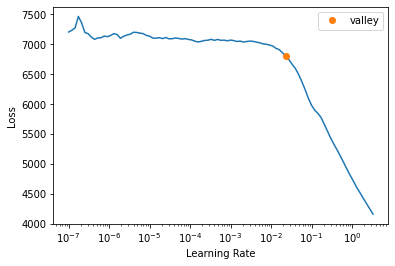

<Figure size 720x720 with 0 Axes>

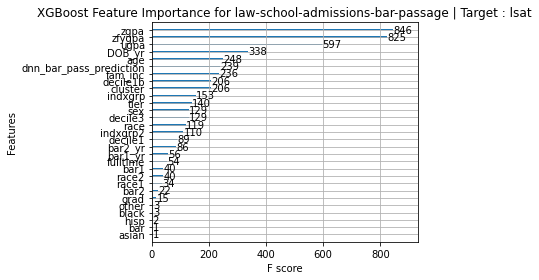

Target Variable: cluster
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:00<00:07,  5.44it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8962922524186103, 'Adjusted R-Squared': 0.8953496927334474, 'RMSE': 0.4427729358855888, 'Time taken': 0.18353915214538574}


  5%|▍         | 2/42 [00:00<00:09,  4.27it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.26850390434265137}
{'Model': 'BayesianRidge', 'R-Squared': 0.14696610333778548, 'Adjusted R-Squared': 0.13921320753373612, 'RMSE': 1.269868091420193, 'Time taken': 0.08389019966125488}


 10%|▉         | 4/42 [00:00<00:05,  6.46it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12956523895263672}
{'Model': 'DummyRegressor', 'R-Squared': -0.00048282628724671817, 'Adjusted R-Squared': -0.009575828495361094, 'RMSE': 1.3752456668889923, 'Time taken': 0.02939438819885254}
{'Model': 'ElasticNet', 'R-Squared': -0.00048282628724671817, 'Adjusted R-Squared': -0.009575828495361094, 'RMSE': 1.3752456668889923, 'Time taken': 0.045433759689331055}


 17%|█▋        | 7/42 [00:02<00:13,  2.65it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.14709080784228445, 'Adjusted R-Squared': 0.13933904542933884, 'RMSE': 1.2697752674071396, 'Time taken': 1.5486366748809814}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08100295066833496}


 21%|██▏       | 9/42 [00:04<00:18,  1.75it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999850088072637, 'Adjusted R-Squared': 0.9999848725580998, 'RMSE': 0.005323454666360215, 'Time taken': 1.761770248413086}
{'Model': 'GammaRegressor', 'R-Squared': 0.09005672384437513, 'Adjusted R-Squared': 0.08178660065790644, 'RMSE': 1.311543279068507, 'Time taken': 0.07189583778381348}


 26%|██▌       | 11/42 [01:23<07:04, 13.69s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.3949333965366009, 'Adjusted R-Squared': -1.4167000217007808, 'RMSE': 2.1277577754070354, 'Time taken': 79.2958083152771}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.09172286702925236, 'Adjusted R-Squared': 0.08346788677503703, 'RMSE': 1.3103419843414505, 'Time taken': 0.08562588691711426}


 31%|███       | 13/42 [01:26<04:42,  9.76s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999964150538423, 'Adjusted R-Squared': 0.9999963824716505, 'RMSE': 0.0026032554414679695, 'Time taken': 3.0173280239105225}


 33%|███▎      | 14/42 [01:27<03:45,  8.04s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999865131225, 'Adjusted R-Squared': 0.9999999863905454, 'RMSE': 0.00015967288518697857, 'Time taken': 0.6198244094848633}


 36%|███▌      | 15/42 [01:29<03:03,  6.79s/it]

{'Model': 'HuberRegressor', 'R-Squared': -0.03941906097671177, 'Adjusted R-Squared': -0.04886593959200125, 'RMSE': 1.401750773790374, 'Time taken': 2.134657382965088}


 38%|███▊      | 16/42 [01:34<02:44,  6.32s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4963594348524595, 'Adjusted R-Squared': 0.4917820401679577, 'RMSE': 0.9757438383197762, 'Time taken': 4.752249717712402}


 43%|████▎     | 18/42 [02:06<03:46,  9.45s/it]

{'Model': 'KernelRidge', 'R-Squared': -7.553329590989094, 'Adjusted R-Squared': -7.631067501939764, 'RMSE': 4.021083298632415, 'Time taken': 32.22302770614624}
{'Model': 'Lars', 'R-Squared': 0.14591289331669044, 'Adjusted R-Squared': 0.13815042529331278, 'RMSE': 1.2706517796404073, 'Time taken': 0.11835694313049316}


 45%|████▌     | 19/42 [02:06<02:41,  7.00s/it]

{'Model': 'LarsCV', 'R-Squared': 0.14623028589159692, 'Adjusted R-Squared': 0.1384707025268147, 'RMSE': 1.2704156603314203, 'Time taken': 0.465787410736084}
{'Model': 'Lasso', 'R-Squared': -0.00048282628724671817, 'Adjusted R-Squared': -0.009575828495361094, 'RMSE': 1.3752456668889923, 'Time taken': 0.07895684242248535}


 52%|█████▏    | 22/42 [02:08<01:03,  3.19s/it]

{'Model': 'LassoCV', 'R-Squared': 0.14708887528674153, 'Adjusted R-Squared': 0.13933709530954452, 'RMSE': 1.2697767059599563, 'Time taken': 0.880645751953125}
{'Model': 'LassoLars', 'R-Squared': -0.00048282628724671817, 'Adjusted R-Squared': -0.009575828495361094, 'RMSE': 1.3752456668889923, 'Time taken': 0.11405491828918457}


 60%|█████▉    | 25/42 [02:08<00:24,  1.46s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.14710759940931772, 'Adjusted R-Squared': 0.1393559896084431, 'RMSE': 1.2697627680568817, 'Time taken': 0.3134126663208008}
{'Model': 'LassoLarsIC', 'R-Squared': 0.14700741391905636, 'Adjusted R-Squared': 0.13925489357093368, 'RMSE': 1.2698373425693366, 'Time taken': 0.0907135009765625}
{'Model': 'LinearRegression', 'R-Squared': 0.1467087502218447, 'Adjusted R-Squared': 0.13895351543466639, 'RMSE': 1.2700596312093018, 'Time taken': 0.09923338890075684}


 62%|██████▏   | 26/42 [02:11<00:29,  1.87s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.10138931525235506, 'Adjusted R-Squared': -0.11139941758739291, 'RMSE': 1.442932102218879, 'Time taken': 3.1964380741119385}


 64%|██████▍   | 27/42 [02:33<01:42,  6.82s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9484955918041998, 'Adjusted R-Squared': 0.948027488119512, 'RMSE': 0.31203094532267694, 'Time taken': 21.8137788772583}


 67%|██████▋   | 28/42 [03:10<03:25, 14.67s/it]

{'Model': 'NuSVR', 'R-Squared': 0.4975108900473776, 'Adjusted R-Squared': 0.49294396049466505, 'RMSE': 0.9746277961527189, 'Time taken': 36.84126281738281}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.1183991172436849, 'Adjusted R-Squared': 0.11038658713027227, 'RMSE': 1.2909561010725805, 'Time taken': 0.056224822998046875}


 74%|███████▍  | 31/42 [03:10<01:11,  6.52s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.12460770155751566, 'Adjusted R-Squared': 0.11665159887033327, 'RMSE': 1.2864023562394535, 'Time taken': 0.3104128837585449}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.8061348907163057, 'Adjusted R-Squared': -0.8225501535453354, 'RMSE': 1.8477812562218816, 'Time taken': 0.13366007804870605}


 76%|███████▌  | 32/42 [03:11<00:49,  4.92s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.13779741727133454, 'Adjusted R-Squared': 0.12996119081886504, 'RMSE': 1.2766743292423992, 'Time taken': 0.1363229751586914}


 79%|███████▊  | 33/42 [03:11<00:33,  3.74s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -2.287068960587756e+18, 'Adjusted R-Squared': -2.3078552475307397e+18, 'RMSE': 2079290149.208323, 'Time taken': 0.4233560562133789}


 86%|████████▌ | 36/42 [03:13<00:11,  1.90s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.139025926589966}
{'Model': 'Ridge', 'R-Squared': 0.14673222251451745, 'Adjusted R-Squared': 0.13897720105794653, 'RMSE': 1.2700421627210232, 'Time taken': 0.05433845520019531}
{'Model': 'RidgeCV', 'R-Squared': 0.1468388930462221, 'Adjusted R-Squared': 0.13908484107693764, 'RMSE': 1.2699627736296206, 'Time taken': 0.13782238960266113}


 88%|████████▊ | 37/42 [03:13<00:07,  1.48s/it]

{'Model': 'SGDRegressor', 'R-Squared': -208406.02301859157, 'Adjusted R-Squared': -210300.15400285547, 'RMSE': 627.6703894416372, 'Time taken': 0.14429926872253418}


 95%|█████████▌| 40/42 [03:39<00:08,  4.35s/it]

{'Model': 'SVR', 'R-Squared': 0.44834537042103195, 'Adjusted R-Squared': 0.4433315944389964, 'RMSE': 1.0211959876465908, 'Time taken': 24.956739902496338}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.1467087502218447, 'Adjusted R-Squared': 0.13895351543466639, 'RMSE': 1.2700596312093018, 'Time taken': 0.05696868896484375}
{'Model': 'TweedieRegressor', 'R-Squared': 0.09172286702925236, 'Adjusted R-Squared': 0.08346788677503703, 'RMSE': 1.3103419843414505, 'Time taken': 0.13013482093811035}


 98%|█████████▊| 41/42 [03:39<00:03,  3.51s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999998533518, 'Adjusted R-Squared': 0.9999999998520189, 'RMSE': 1.6649985e-05, 'Time taken': 0.6774687767028809}


100%|██████████| 42/42 [03:40<00:00,  5.24s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992941514, 'Adjusted R-Squared': 0.9999999992877362, 'RMSE': 3.652844914674133e-05, 'Time taken': 0.2577955722808838}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: cluster
cluster
Target Standard Deviation: 1.3812939218178437
                                   Adjusted R-Squared               R-Squared  \
Model                                                                           
DecisionTreeRegressor                            1.00                    1.00   
RandomForestRegressor                            1.00                    1.00   
BaggingRegressor                                 1.00                    1.00   
ExtraTreeRegressor                               1.00                    1.00   
XGBRegressor                                     1.00                    1.00   
LGBMRegressor                                    1.00                    1.00   
HistGradientBoostingRegressor         

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,2.394149,1.553900,1.246555,00:16
1,0.549288,0.637811,0.798631,00:16
2,0.268678,0.187716,0.433262,00:16
3,0.126200,0.044320,0.210524,00:16
4,0.112518,0.531835,0.729271,00:16


Better model found at epoch 0 with _rmse value: 1.246555209159851.
Better model found at epoch 1 with _rmse value: 0.7986310124397278.
Better model found at epoch 2 with _rmse value: 0.4332624077796936.
Better model found at epoch 3 with _rmse value: 0.2105240672826767.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       6       6.00
1       4       4.00
2       6       6.00
3       5       5.00
4       5       5.00
XGBoost RMSE:  1.6649985e-05


<Figure size 432x288 with 0 Axes>

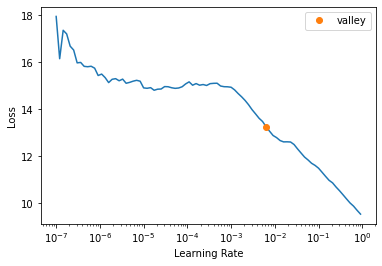

<Figure size 720x720 with 0 Axes>

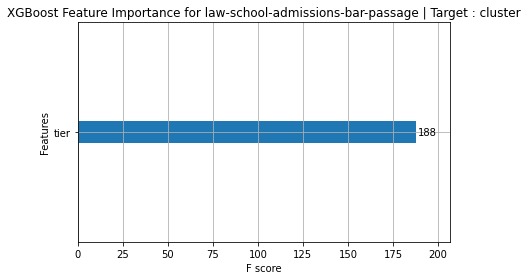

Target Variable: race
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:00<00:08,  4.72it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9810108605778517, 'Adjusted R-Squared': 0.9808382756197105, 'RMSE': 0.19790613685847652, 'Time taken': 0.21166610717773438}


 10%|▉         | 4/42 [00:00<00:06,  5.97it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9817286448701656, 'Adjusted R-Squared': 0.9815625835763827, 'RMSE': 0.1941297070815948, 'Time taken': 0.3459315299987793}
{'Model': 'BayesianRidge', 'R-Squared': 0.9810224129780404, 'Adjusted R-Squared': 0.9808499330152051, 'RMSE': 0.1978459277390746, 'Time taken': 0.06121683120727539}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9667727397253958, 'Adjusted R-Squared': 0.9664707499829354, 'RMSE': 0.26179050237464074, 'Time taken': 0.1252729892730713}
{'Model': 'DummyRegressor', 'R-Squared': -0.00048349970273742215, 'Adjusted R-Squared': -0.009576508031265085, 'RMSE': 1.4365196964684697, 'Time taken': 0.028478384017944336}
{'Model': 'ElasticNet', 'R-Squared': 0.5912921739934954, 'Adjusted R-Squared': 0.587577586329715, 'RMSE': 0.9181488544549173, 'Time taken': 0.044863224029541016}


 17%|█▋        | 7/42 [00:01<00:07,  4.91it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9810410947546162, 'Adjusted R-Squared': 0.9808687845832368, 'RMSE': 0.19774852274529497, 'Time taken': 0.6146888732910156}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9647111943798912, 'Adjusted R-Squared': 0.9643904680475701, 'RMSE': 0.2697895350020054, 'Time taken': 0.07612299919128418}


 24%|██▍       | 10/42 [00:03<00:11,  2.83it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.982692526459825, 'Adjusted R-Squared': 0.9825352255137391, 'RMSE': 0.18893980291236223, 'Time taken': 1.5244817733764648}
{'Model': 'GammaRegressor', 'R-Squared': 0.8583991216521798, 'Adjusted R-Squared': 0.857112165928746, 'RMSE': 0.5404301794165685, 'Time taken': 0.10771918296813965}


 26%|██▌       | 11/42 [01:20<09:03, 17.52s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -4.747495400078425, 'Adjusted R-Squared': -4.799732167158158, 'RMSE': 3.443070663649947, 'Time taken': 77.17179822921753}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8380120171906354, 'Adjusted R-Squared': 0.8365397709444509, 'RMSE': 0.5780268581512199, 'Time taken': 0.07704615592956543}


 31%|███       | 13/42 [01:23<05:28, 11.32s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9816393067528665, 'Adjusted R-Squared': 0.9814724334994211, 'RMSE': 0.19460372868919132, 'Time taken': 3.1259143352508545}


 33%|███▎      | 14/42 [01:24<04:13,  9.05s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.98008561494902, 'Adjusted R-Squared': 0.9799046207905158, 'RMSE': 0.20267028111180618, 'Time taken': 0.8901171684265137}


 36%|███▌      | 15/42 [01:26<03:20,  7.44s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9733561770622644, 'Adjusted R-Squared': 0.9731140216404622, 'RMSE': 0.23442552067104722, 'Time taken': 2.2645206451416016}


 38%|███▊      | 16/42 [01:31<02:54,  6.73s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.973874157103793, 'Adjusted R-Squared': 0.9736367094026409, 'RMSE': 0.2321356143975669, 'Time taken': 4.634805917739868}


 40%|████      | 17/42 [02:09<06:13, 14.96s/it]

{'Model': 'KernelRidge', 'R-Squared': -26.257138294907882, 'Adjusted R-Squared': -26.504867903243323, 'RMSE': 7.498022661407634, 'Time taken': 37.71561312675476}
{'Model': 'Lars', 'R-Squared': 0.9783216019325376, 'Adjusted R-Squared': 0.9781245753406597, 'RMSE': 0.21145609765046383, 'Time taken': 0.08301687240600586}


 48%|████▊     | 20/42 [02:09<02:25,  6.61s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9809816539612977, 'Adjusted R-Squared': 0.9808088035554927, 'RMSE': 0.19805827507961338, 'Time taken': 0.37872910499572754}
{'Model': 'Lasso', 'R-Squared': 0.37205663778061115, 'Adjusted R-Squared': 0.3663495029560977, 'RMSE': 1.1380644485588844, 'Time taken': 0.12108993530273438}


 52%|█████▏    | 22/42 [02:10<01:15,  3.78s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9810604435256881, 'Adjusted R-Squared': 0.9808883092078201, 'RMSE': 0.19764758950143832, 'Time taken': 0.6237151622772217}
{'Model': 'LassoLars', 'R-Squared': -0.00048349970273742215, 'Adjusted R-Squared': -0.009576508031265085, 'RMSE': 1.4365196964684697, 'Time taken': 0.1152191162109375}


 60%|█████▉    | 25/42 [02:10<00:27,  1.63s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9810607169299927, 'Adjusted R-Squared': 0.980888585096991, 'RMSE': 0.19764616291320564, 'Time taken': 0.2971971035003662}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9809574866125955, 'Adjusted R-Squared': 0.9807844165590872, 'RMSE': 0.19818407528698484, 'Time taken': 0.08823609352111816}
{'Model': 'LinearRegression', 'R-Squared': 0.9810220754790858, 'Adjusted R-Squared': 0.9808495924488528, 'RMSE': 0.19784768698530628, 'Time taken': 0.09888362884521484}


 62%|██████▏   | 26/42 [02:13<00:30,  1.90s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9807239952189687, 'Adjusted R-Squared': 0.9805488030523145, 'RMSE': 0.1993953988408552, 'Time taken': 2.781505823135376}


 64%|██████▍   | 27/42 [02:27<01:15,  5.01s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9771298856651028, 'Adjusted R-Squared': 0.9769220280240889, 'RMSE': 0.21719048130079244, 'Time taken': 14.095037937164307}


 67%|██████▋   | 28/42 [09:26<26:53, 115.23s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9703024891910293, 'Adjusted R-Squared': 0.9700325799789307, 'RMSE': 0.24749512241782595, 'Time taken': 418.4985156059265}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9707728142594839, 'Adjusted R-Squared': 0.9705071796503805, 'RMSE': 0.24552748745603287, 'Time taken': 0.07145309448242188}


 74%|███████▍  | 31/42 [09:26<09:10, 50.06s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.981074331834941, 'Adjusted R-Squared': 0.9809023237425547, 'RMSE': 0.1975751090751569, 'Time taken': 0.243818998336792}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9386005337826661, 'Adjusted R-Squared': 0.9380424977352477, 'RMSE': 0.35586798364892414, 'Time taken': 0.1375436782836914}


 76%|███████▌  | 32/42 [09:26<06:14, 37.48s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9661002751628885, 'Adjusted R-Squared': 0.9657921736496, 'RMSE': 0.26442633544203675, 'Time taken': 0.15621304512023926}


 79%|███████▊  | 33/42 [09:27<04:08, 27.66s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [09:30<02:47, 20.91s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9823178345299108, 'Adjusted R-Squared': 0.9821571281535101, 'RMSE': 0.19097404415985797, 'Time taken': 3.060901641845703}
{'Model': 'Ridge', 'R-Squared': 0.9810225728379722, 'Adjusted R-Squared': 0.9808500943280422, 'RMSE': 0.19784509444812193, 'Time taken': 0.056854963302612305}


 88%|████████▊ | 37/42 [09:30<00:44,  8.99s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9810221329100643, 'Adjusted R-Squared': 0.9808496504017994, 'RMSE': 0.19784738762183154, 'Time taken': 0.15779590606689453}
{'Model': 'SGDRegressor', 'R-Squared': -71197.64878492913, 'Adjusted R-Squared': -71844.74582008627, 'RMSE': 383.21499605476504, 'Time taken': 0.13103699684143066}


 95%|█████████▌| 40/42 [09:36<00:09,  4.69s/it]

{'Model': 'SVR', 'R-Squared': 0.9683716918339578, 'Adjusted R-Squared': 0.9680842343499948, 'RMSE': 0.25541394242314697, 'Time taken': 5.299148082733154}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9810220754790858, 'Adjusted R-Squared': 0.9808495924488528, 'RMSE': 0.19784768698530628, 'Time taken': 0.04943394660949707}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8380120171906354, 'Adjusted R-Squared': 0.8365397709444509, 'RMSE': 0.5780268581512199, 'Time taken': 0.06682443618774414}


 98%|█████████▊| 41/42 [09:37<00:03,  3.93s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9801713397489238, 'Adjusted R-Squared': 0.9799911247100349, 'RMSE': 0.20223358, 'Time taken': 1.407346487045288}


100%|██████████| 42/42 [09:37<00:00, 13.76s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9798584250292444, 'Adjusted R-Squared': 0.9796753660292576, 'RMSE': 0.20382306753800822, 'Time taken': 0.2948737144470215}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: race
race
Target Standard Deviation: 1.395045540426612
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.98       0.98   0.19   
RandomForestRegressor                        0.98       0.98   0.19   
BaggingRegressor                             0.98       0.98   0.19   
GradientBoostingRegressor                    0.98       0.98   0.19   
OrthogonalMatchingPursuitCV                  0.98       0.98   0.20   
LassoLarsCV                                  0.98       0.98   0.20   
LassoCV                                      0.98       0.98   0.20   
ElasticNetCV                                 0.98       

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,2.825087,1.856625,1.362580,00:16
1,1.009696,0.810277,0.900154,00:16
2,0.390590,0.501355,0.708064,00:16
3,0.386711,6.169887,2.483926,00:16


Better model found at epoch 0 with _rmse value: 1.362580418586731.
Better model found at epoch 1 with _rmse value: 0.9001541137695312.
Better model found at epoch 2 with _rmse value: 0.7080644965171814.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       8       8.00
1       8       8.00
2       8       8.00
3       8       8.00
4       8       8.00
XGBoost RMSE:  0.20225465


<Figure size 432x288 with 0 Axes>

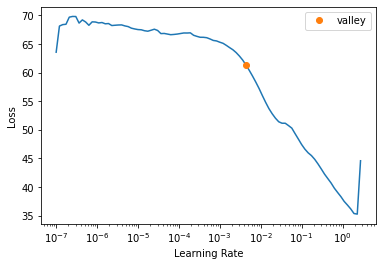

<Figure size 720x720 with 0 Axes>

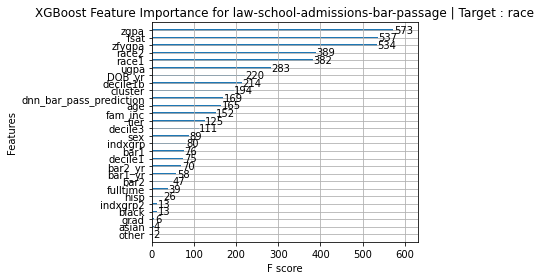

Target Variable: sex
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  5%|▍         | 2/42 [00:00<00:04,  8.67it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05974864959716797}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1705489158630371}


 10%|▉         | 4/42 [00:00<00:04,  8.74it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9999999999002465, 'Adjusted R-Squared': 0.9999999998993399, 'RMSE': 4.963043690519232e-06, 'Time taken': 0.09717893600463867}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12038445472717285}
{'Model': 'DummyRegressor', 'R-Squared': -0.00011771123992621035, 'Adjusted R-Squared': -0.009207395058314916, 'RMSE': 0.49694635618066285, 'Time taken': 0.02876901626586914}
{'Model': 'ElasticNet', 'R-Squared': -0.00011771123992621035, 'Adjusted R-Squared': -0.009207395058314916, 'RMSE': 0.49694635618066285, 'Time taken': 0.05325055122375488}


 17%|█▋        | 7/42 [00:01<00:08,  4.30it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999543664706659, 'Adjusted R-Squared': 0.999953951725133, 'RMSE': 0.0033568039745635737, 'Time taken': 0.835503339767456}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06111478805541992}


 21%|██▏       | 9/42 [00:02<00:09,  3.50it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.6844348907470703}
{'Model': 'GammaRegressor', 'R-Squared': 0.8878168423358245, 'Adjusted R-Squared': 0.886797252920043, 'RMSE': 0.16643619609005275, 'Time taken': 0.07593274116516113}


 26%|██▌       | 11/42 [01:28<07:47, 15.07s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.4212001244607215, 'Adjusted R-Squared': -5.479559933721157, 'RMSE': 1.2591922848480521, 'Time taken': 86.0592565536499}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8887685299839517, 'Adjusted R-Squared': 0.8877575900898397, 'RMSE': 0.1657287252094466, 'Time taken': 0.0854184627532959}


 31%|███       | 13/42 [01:30<05:03, 10.46s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992944091, 'Adjusted R-Squared': 0.9999999992879962, 'RMSE': 1.3199590392704213e-05, 'Time taken': 2.1505305767059326}


 33%|███▎      | 14/42 [01:31<04:00,  8.60s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9989855469361753, 'Adjusted R-Squared': 0.9989763269638708, 'RMSE': 0.01582704839849091, 'Time taken': 0.7178783416748047}


 36%|███▌      | 15/42 [01:33<03:14,  7.20s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9997473853453724, 'Adjusted R-Squared': 0.9997450894282892, 'RMSE': 0.007897928939732932, 'Time taken': 2.0816421508789062}


 38%|███▊      | 16/42 [01:38<02:52,  6.62s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9788495407507102, 'Adjusted R-Squared': 0.978657312390959, 'RMSE': 0.0722676366408424, 'Time taken': 4.706993818283081}


 40%|████      | 17/42 [02:10<05:28, 13.14s/it]

{'Model': 'KernelRidge', 'R-Squared': -25.42444617978541, 'Adjusted R-Squared': -25.664607770917012, 'RMSE': 2.5543881939396953, 'Time taken': 32.59951066970825}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 5.538938745043918e-16, 'Time taken': 0.0929265022277832}


 48%|████▊     | 20/42 [02:11<02:11,  5.98s/it]

{'Model': 'LarsCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 5.538938745043918e-16, 'Time taken': 0.28337597846984863}
{'Model': 'Lasso', 'R-Squared': -0.00011771123992621035, 'Adjusted R-Squared': -0.009207395058314916, 'RMSE': 0.49694635618066285, 'Time taken': 0.12251567840576172}


 52%|█████▏    | 22/42 [02:11<01:09,  3.47s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999989998822888, 'Adjusted R-Squared': 0.999998990792605, 'RMSE': 0.0004969463561786208, 'Time taken': 0.5960967540740967}
{'Model': 'LassoLars', 'R-Squared': -0.00011771123992621035, 'Adjusted R-Squared': -0.009207395058314916, 'RMSE': 0.49694635618066285, 'Time taken': 0.11490225791931152}


 60%|█████▉    | 25/42 [02:12<00:25,  1.49s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 5.538938745043918e-16, 'Time taken': 0.19447040557861328}
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 5.538938745043918e-16, 'Time taken': 0.07428145408630371}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 6.838917282737923e-16, 'Time taken': 0.10370826721191406}


 62%|██████▏   | 26/42 [02:12<00:19,  1.24s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999998868762, 'Adjusted R-Squared': 0.999999999885848, 'RMSE': 5.2851940924332124e-06, 'Time taken': 0.43656110763549805}


 64%|██████▍   | 27/42 [02:19<00:38,  2.58s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.986482064797569, 'Adjusted R-Squared': 0.9863592055026214, 'RMSE': 0.0577748905645622, 'Time taken': 6.517313003540039}


 67%|██████▋   | 28/42 [18:02<58:58, 252.72s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9964079116019585, 'Adjusted R-Squared': 0.9963752644971038, 'RMSE': 0.02978224686771835, 'Time taken': 943.1685013771057}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 3.5308613314783428e-15, 'Time taken': 0.045014381408691406}


 74%|███████▍  | 31/42 [18:02<20:08, 109.82s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 3.5308613314783428e-15, 'Time taken': 0.19089555740356445}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.987367337769125, 'Adjusted R-Squared': 0.9872525243784884, 'RMSE': 0.055851056584752166, 'Time taken': 0.12352895736694336}


 76%|███████▌  | 32/42 [18:02<13:41, 82.20s/it] 

{'Model': 'PoissonRegressor', 'R-Squared': 0.9711547653994584, 'Adjusted R-Squared': 0.9708926021968279, 'RMSE': 0.08439583008315238, 'Time taken': 0.15054702758789062}


 79%|███████▊  | 33/42 [18:03<09:04, 60.55s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [18:04<02:29, 24.86s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999998987046971, 'Adjusted R-Squared': 0.9999998977840632, 'RMSE': 0.00015815342630852677, 'Time taken': 1.2286608219146729}
{'Model': 'Ridge', 'R-Squared': 0.999996710727647, 'Adjusted R-Squared': 0.9999966808327202, 'RMSE': 0.0009012263242748996, 'Time taken': 0.061713218688964844}
{'Model': 'RidgeCV', 'R-Squared': 0.99999995923484, 'Adjusted R-Squared': 0.9999999588643411, 'RMSE': 0.00010032947203541893, 'Time taken': 0.09103274345397949}


 88%|████████▊ | 37/42 [18:04<01:34, 18.95s/it]

{'Model': 'SGDRegressor', 'R-Squared': -13153.909355820735, 'Adjusted R-Squared': -13273.469248981439, 'RMSE': 56.99383507300188, 'Time taken': 0.14157366752624512}


 95%|█████████▌| 40/42 [18:07<00:17,  8.57s/it]

{'Model': 'SVR', 'R-Squared': 0.9844918244578164, 'Adjusted R-Squared': 0.9843508766366806, 'RMSE': 0.061881994874489185, 'Time taken': 2.388784170150757}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 6.838917282737923e-16, 'Time taken': 0.057048797607421875}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8887685299839517, 'Adjusted R-Squared': 0.8877575900898397, 'RMSE': 0.1657287252094466, 'Time taken': 0.12355399131774902}


 98%|█████████▊| 41/42 [18:07<00:06,  6.72s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999996335355, 'Adjusted R-Squared': 0.9999999996302048, 'RMSE': 9.512614e-06, 'Time taken': 0.5352842807769775}


100%|██████████| 42/42 [18:08<00:00, 25.91s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9989382143009661, 'Adjusted R-Squared': 0.9989285641406113, 'RMSE': 0.01619207054066488, 'Time taken': 0.30468249320983887}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: sex
sex
Target Standard Deviation: 0.49753593390969286
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.06
BaggingRegressor                             1.00       1.00  0.00        0.17
Lars                                         1.00       1.00  0.00        0.09
LassoLarsCV                                  1.00       1.00  0.00        0.19
LassoLarsIC                                  1.00       1.00  0.00        0.07
LinearRegression                             1.00       1.00  0.00        0.10
OrthogonalMatchingPursuit                    1.00       1.00  

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.846789,0.604520,0.777509,00:16
1,0.100584,0.047849,0.218744,00:16
2,0.058032,0.132221,0.363623,00:16


Better model found at epoch 0 with _rmse value: 0.7775087952613831.
Better model found at epoch 1 with _rmse value: 0.21874383091926575.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       3       3.00
1       2       2.00
2       3       3.00
3       2       2.00
4       3       3.00
XGBoost RMSE:  9.512614e-06


<Figure size 432x288 with 0 Axes>

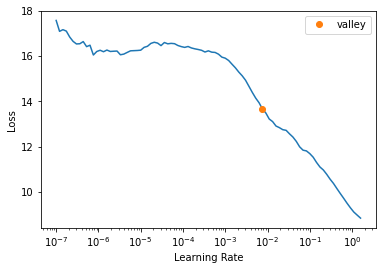

<Figure size 720x720 with 0 Axes>

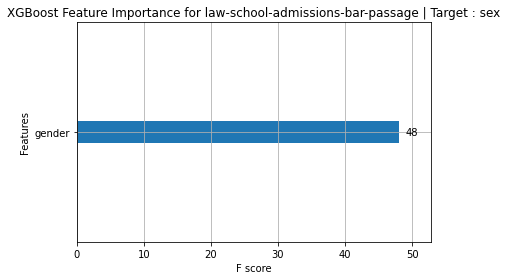

Target Variable: decile1
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:01<00:51,  1.27s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9564645548377783, 'Adjusted R-Squared': 0.9560688779819742, 'RMSE': 0.6209554087457106, 'Time taken': 1.2655246257781982}


  5%|▍         | 2/42 [00:01<00:34,  1.17it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9898857845524706, 'Adjusted R-Squared': 0.9897938603524931, 'RMSE': 0.2992988304269622, 'Time taken': 0.5689423084259033}
{'Model': 'BayesianRidge', 'R-Squared': 0.9237614773115946, 'Adjusted R-Squared': 0.9230685748079889, 'RMSE': 0.8217243482088317, 'Time taken': 0.09364771842956543}


 10%|▉         | 4/42 [00:02<00:15,  2.49it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9887601001057779, 'Adjusted R-Squared': 0.9886579449943939, 'RMSE': 0.31551509454769944, 'Time taken': 0.16490864753723145}
{'Model': 'DummyRegressor', 'R-Squared': -7.439709974521591e-06, 'Adjusted R-Squared': -0.009096121312993644, 'RMSE': 2.976052135109333, 'Time taken': 0.027375221252441406}
{'Model': 'ElasticNet', 'R-Squared': 0.8152438793565095, 'Adjusted R-Squared': 0.8135647022943622, 'RMSE': 1.2791996645549828, 'Time taken': 0.05052924156188965}


 19%|█▉        | 8/42 [00:02<00:09,  3.74it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9252864818195917, 'Adjusted R-Squared': 0.9246074394932866, 'RMSE': 0.8134643282739386, 'Time taken': 0.6257500648498535}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.982038752932851, 'Adjusted R-Squared': 0.981875510091544, 'RMSE': 0.39884776515593634, 'Time taken': 0.11875534057617188}


 21%|██▏       | 9/42 [00:06<00:33,  1.00s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9969207983589279, 'Adjusted R-Squared': 0.996892812683826, 'RMSE': 0.16514216895748943, 'Time taken': 3.399670124053955}
{'Model': 'GammaRegressor', 'R-Squared': 0.8209585796914878, 'Adjusted R-Squared': 0.8193313413347328, 'RMSE': 1.2592607780693863, 'Time taken': 0.08282089233398438}


 26%|██▌       | 11/42 [01:27<08:41, 16.83s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -42.555705231548565, 'Adjusted R-Squared': -42.9515662233021, 'RMSE': 19.640902714647574, 'Time taken': 80.83421897888184}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8326237055974308, 'Adjusted R-Squared': 0.8311024870671373, 'RMSE': 1.2175474454300725, 'Time taken': 0.09106826782226562}


 31%|███       | 13/42 [01:30<05:26, 11.27s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9889614136166306, 'Adjusted R-Squared': 0.988861088166037, 'RMSE': 0.31267679362875744, 'Time taken': 3.0621531009674072}


 33%|███▎      | 14/42 [01:31<04:16,  9.14s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9916834215705168, 'Adjusted R-Squared': 0.9916078353994839, 'RMSE': 0.27140088733841605, 'Time taken': 0.9547412395477295}


 36%|███▌      | 15/42 [01:33<03:25,  7.62s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8911103198958505, 'Adjusted R-Squared': 0.890120663626285, 'RMSE': 0.9820470162541223, 'Time taken': 2.4306094646453857}


 38%|███▊      | 16/42 [01:38<02:59,  6.89s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.857443050557673, 'Adjusted R-Squared': 0.8561474054731176, 'RMSE': 1.1236553300057475, 'Time taken': 4.645443916320801}


 43%|████▎     | 18/42 [02:10<03:56,  9.87s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.776629242215966, 'Adjusted R-Squared': -3.8200421815544603, 'RMSE': 6.504286848308805, 'Time taken': 32.306774616241455}
{'Model': 'Lars', 'R-Squared': 0.9232251183171951, 'Adjusted R-Squared': 0.9225273410537311, 'RMSE': 0.8246098105968593, 'Time taken': 0.10797739028930664}


 45%|████▌     | 19/42 [02:11<02:46,  7.24s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9254130888883536, 'Adjusted R-Squared': 0.9247351972448243, 'RMSE': 0.8127748010995458, 'Time taken': 0.44621729850769043}
{'Model': 'Lasso', 'R-Squared': 0.8005143832451944, 'Adjusted R-Squared': 0.7987013354786776, 'RMSE': 1.3292134078896585, 'Time taken': 0.08676958084106445}


 50%|█████     | 21/42 [02:12<01:28,  4.19s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9247123641989426, 'Adjusted R-Squared': 0.9240281039392007, 'RMSE': 0.8165837801716846, 'Time taken': 0.6309239864349365}
{'Model': 'LassoLars', 'R-Squared': -7.439709974521591e-06, 'Adjusted R-Squared': -0.009096121312993644, 'RMSE': 2.976052135109333, 'Time taken': 0.05737709999084473}


 60%|█████▉    | 25/42 [02:12<00:29,  1.73s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9245309596178924, 'Adjusted R-Squared': 0.9238450506419379, 'RMSE': 0.817566962295427, 'Time taken': 0.305316686630249}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9256659395554941, 'Adjusted R-Squared': 0.9249903459740747, 'RMSE': 0.8113959725995629, 'Time taken': 0.08364129066467285}
{'Model': 'LinearRegression', 'R-Squared': 0.9236870550559622, 'Adjusted R-Squared': 0.922993476157203, 'RMSE': 0.8221253243834066, 'Time taken': 0.07492232322692871}


 62%|██████▏   | 26/42 [02:17<00:38,  2.39s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8932173850775152, 'Adjusted R-Squared': 0.8922468791100299, 'RMSE': 0.9724990715723566, 'Time taken': 4.973023176193237}


 64%|██████▍   | 27/42 [02:49<02:14,  8.98s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9658420923491586, 'Adjusted R-Squared': 0.9655316443119382, 'RMSE': 0.5500276847055117, 'Time taken': 31.73482322692871}


 69%|██████▉   | 29/42 [03:25<02:30, 11.58s/it]

{'Model': 'NuSVR', 'R-Squared': 0.92791291886116, 'Adjusted R-Squared': 0.9272577472072852, 'RMSE': 0.7990383796514052, 'Time taken': 35.98553800582886}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9248512487338425, 'Adjusted R-Squared': 0.9241682507420269, 'RMSE': 0.8158302486761162, 'Time taken': 0.1332721710205078}


 71%|███████▏  | 30/42 [03:25<01:43,  8.60s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9252706696707635, 'Adjusted R-Squared': 0.9245914836339414, 'RMSE': 0.8135504033167066, 'Time taken': 0.4961986541748047}


 74%|███████▍  | 31/42 [03:26<01:09,  6.30s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8527084406090442, 'Adjusted R-Squared': 0.8513697644822897, 'RMSE': 1.142162374935362, 'Time taken': 0.32950735092163086}


 76%|███████▌  | 32/42 [03:26<00:46,  4.65s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8745961529541925, 'Adjusted R-Squared': 0.8734564057959877, 'RMSE': 1.0538877326833946, 'Time taken': 0.4787864685058594}


 79%|███████▊  | 33/42 [03:27<00:30,  3.43s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.9077411786755869, 'Adjusted R-Squared': 0.9069026738617321, 'RMSE': 0.9039467973904836, 'Time taken': 0.40023040771484375}


 86%|████████▌ | 36/42 [03:33<00:14,  2.40s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9910782729770522, 'Adjusted R-Squared': 0.9909971868440489, 'RMSE': 0.2811016436576519, 'Time taken': 6.449887752532959}
{'Model': 'Ridge', 'R-Squared': 0.9237095399235739, 'Adjusted R-Squared': 0.9230161653810969, 'RMSE': 0.8220041998420363, 'Time taken': 0.040522098541259766}
{'Model': 'RidgeCV', 'R-Squared': 0.9239053092250632, 'Adjusted R-Squared': 0.9232137139541978, 'RMSE': 0.8209488479869853, 'Time taken': 0.15510344505310059}


 88%|████████▊ | 37/42 [03:33<00:09,  1.84s/it]

{'Model': 'SGDRegressor', 'R-Squared': -275188.5993216564, 'Adjusted R-Squared': -277689.691362954, 'RMSE': 1561.1870042661972, 'Time taken': 0.11554265022277832}


 95%|█████████▌| 40/42 [03:53<00:07,  3.76s/it]

{'Model': 'SVR', 'R-Squared': 0.9259239041804108, 'Adjusted R-Squared': 0.9252506551398895, 'RMSE': 0.8099868381606725, 'Time taken': 19.77327871322632}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9236870550559622, 'Adjusted R-Squared': 0.922993476157203, 'RMSE': 0.8221253243834066, 'Time taken': 0.05380606651306152}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8326237055974308, 'Adjusted R-Squared': 0.8311024870671373, 'RMSE': 1.2175474454300725, 'Time taken': 0.07021045684814453}


 98%|█████████▊| 41/42 [03:56<00:03,  3.42s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9925613566600824, 'Adjusted R-Squared': 0.9924937497021836, 'RMSE': 0.25667632, 'Time taken': 2.3254404067993164}


100%|██████████| 42/42 [03:56<00:00,  5.63s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9919453773464411, 'Adjusted R-Squared': 0.9918721719903371, 'RMSE': 0.2670923929711857, 'Time taken': 0.3606863021850586}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: decile1
decile1
Target Standard Deviation: 2.954965485588909
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          1.00       1.00    0.17   
XGBRegressor                                 0.99       0.99    0.26   
LGBMRegressor                                0.99       0.99    0.27   
HistGradientBoostingRegressor                0.99       0.99    0.27   
RandomForestRegressor                        0.99       0.99    0.28   
BaggingRegressor                             0.99       0.99    0.30   
GradientBoostingRegressor                    0.99       0.99    0.31   
DecisionTreeRegressor                     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,9.564946,8.929769,2.988272,00:16
1,4.405485,3.791796,1.947254,00:16
2,2.627521,2.191289,1.480300,00:16
3,1.246970,0.839343,0.916157,00:16
4,0.898566,1.359051,1.165784,00:16


Better model found at epoch 0 with _rmse value: 2.988272190093994.
Better model found at epoch 1 with _rmse value: 1.9472535848617554.
Better model found at epoch 2 with _rmse value: 1.4803004264831543.
Better model found at epoch 3 with _rmse value: 0.9161568880081177.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       4       3.66
1       3       3.01
2       5       4.99
3       4       3.96
4       2       2.05
XGBoost RMSE:  0.25684997


<Figure size 432x288 with 0 Axes>

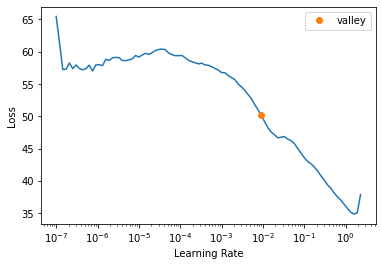

<Figure size 720x720 with 0 Axes>

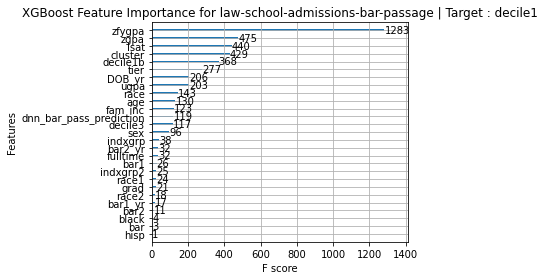

Target Variable: decile3
CATS=====================
['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
CONTS=====================
[]
37
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : []
Categorical variables that made the cut : ['decile1b', 'decile3', 'decile1', 'sex', 'race', 'cluster', 'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime', 'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'bar', 'bar_passed', 'tier', 'indxgrp', 'indxgrp2', 'dnn_bar_pass_prediction', 'gpa']
Tabular Object size: 19994


  2%|▏         | 1/42 [00:02<01:24,  2.06s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9720896585711615, 'Adjusted R-Squared': 0.971835992251687, 'RMSE': 0.5200511273139036, 'Time taken': 2.0642945766448975}


  5%|▍         | 2/42 [00:02<00:47,  1.18s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9824090310219847, 'Adjusted R-Squared': 0.9822491534952974, 'RMSE': 0.4128652672052134, 'Time taken': 0.5521972179412842}
{'Model': 'BayesianRidge', 'R-Squared': 0.903422544707634, 'Adjusted R-Squared': 0.902544789496696, 'RMSE': 0.9673894493291179, 'Time taken': 0.09370040893554688}


 10%|▉         | 4/42 [00:02<00:20,  1.90it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9819312414201078, 'Adjusted R-Squared': 0.9817670214481623, 'RMSE': 0.41843463500514144, 'Time taken': 0.1855790615081787}
{'Model': 'DummyRegressor', 'R-Squared': -0.0015494647607163792, 'Adjusted R-Squared': -0.010652161234179003, 'RMSE': 3.1152985223169454, 'Time taken': 0.029101848602294922}
{'Model': 'ElasticNet', 'R-Squared': 0.7746225386999138, 'Adjusted R-Squared': 0.7725741699529299, 'RMSE': 1.4778103667905305, 'Time taken': 0.046707868576049805}


 19%|█▉        | 8/42 [00:03<00:10,  3.33it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9064224514976111, 'Adjusted R-Squared': 0.9055719612814824, 'RMSE': 0.952246311887662, 'Time taken': 0.5362238883972168}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9832993045697282, 'Adjusted R-Squared': 0.9831475183956586, 'RMSE': 0.4022821341518026, 'Time taken': 0.14028215408325195}


 21%|██▏       | 9/42 [00:07<00:39,  1.18s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9841454851840344, 'Adjusted R-Squared': 0.984001389618931, 'RMSE': 0.3919583723851825, 'Time taken': 4.058642148971558}
{'Model': 'GammaRegressor', 'R-Squared': 0.784751493450726, 'Adjusted R-Squared': 0.7827951828635576, 'RMSE': 1.444220618523207, 'Time taken': 0.08160901069641113}


 26%|██▌       | 11/42 [01:27<08:40, 16.80s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.11707068529917075, 'Adjusted R-Squared': 0.10904608158060736, 'RMSE': 2.9250038070131694, 'Time taken': 80.13477516174316}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7919156771567104, 'Adjusted R-Squared': 0.7900244790697731, 'RMSE': 1.4199830104846356, 'Time taken': 0.09222841262817383}


 31%|███       | 13/42 [01:31<05:26, 11.26s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9802971730416841, 'Adjusted R-Squared': 0.9801181016530197, 'RMSE': 0.43694597091172915, 'Time taken': 3.083897590637207}


 33%|███▎      | 14/42 [01:32<04:16,  9.14s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.981976854187052, 'Adjusted R-Squared': 0.9818130487719382, 'RMSE': 0.417906153156783, 'Time taken': 1.0163421630859375}


 36%|███▌      | 15/42 [01:34<03:24,  7.58s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8811619982021663, 'Adjusted R-Squared': 0.8800819254769147, 'RMSE': 1.0731023300688705, 'Time taken': 2.2906384468078613}


 38%|███▊      | 16/42 [01:38<02:57,  6.81s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8558577690545232, 'Adjusted R-Squared': 0.8545477159583259, 'RMSE': 1.181841095150737, 'Time taken': 4.4281837940216064}


 40%|████      | 17/42 [02:10<05:32, 13.30s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.0084273905050356, 'Adjusted R-Squared': -3.0448584397497163, 'RMSE': 6.2323305311546795, 'Time taken': 31.817100048065186}
{'Model': 'Lars', 'R-Squared': 0.9037106519633983, 'Adjusted R-Squared': 0.9028355152480947, 'RMSE': 0.9659454265458132, 'Time taken': 0.08705759048461914}


 48%|████▊     | 20/42 [02:11<02:10,  5.95s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9046415591846572, 'Adjusted R-Squared': 0.9037748831257447, 'RMSE': 0.9612647972846186, 'Time taken': 0.3098762035369873}
{'Model': 'Lasso', 'R-Squared': 0.7571279532286552, 'Adjusted R-Squared': 0.7549205829474716, 'RMSE': 1.5340949273386886, 'Time taken': 0.13457322120666504}


 52%|█████▏    | 22/42 [02:11<01:08,  3.43s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9044665891694982, 'Adjusted R-Squared': 0.9035983228756588, 'RMSE': 0.962146289435237, 'Time taken': 0.6018664836883545}
{'Model': 'LassoLars', 'R-Squared': -0.0015494647607163792, 'Adjusted R-Squared': -0.010652161234179003, 'RMSE': 3.1152985223169454, 'Time taken': 0.11957144737243652}


 60%|█████▉    | 25/42 [02:12<00:25,  1.49s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9038091659444356, 'Adjusted R-Squared': 0.9029349245846778, 'RMSE': 0.9654511689604931, 'Time taken': 0.2979741096496582}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9075574707109532, 'Adjusted R-Squared': 0.9067172962463216, 'RMSE': 0.9464537085100431, 'Time taken': 0.09240484237670898}
{'Model': 'LinearRegression', 'R-Squared': -3.433263959582392e+20, 'Adjusted R-Squared': -3.464467570424343e+20, 'RMSE': 57678912678.423744, 'Time taken': 0.07488369941711426}


 62%|██████▏   | 26/42 [02:15<00:28,  1.79s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8739661147213158, 'Adjusted R-Squared': 0.8728206413888158, 'RMSE': 1.1051141247644147, 'Time taken': 2.7473363876342773}


 64%|██████▍   | 27/42 [02:48<02:25,  9.70s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9669744024969057, 'Adjusted R-Squared': 0.966674245589531, 'RMSE': 0.5657034265436337, 'Time taken': 32.910512924194336}


 67%|██████▋   | 28/42 [03:18<03:34, 15.34s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9358744582044299, 'Adjusted R-Squared': 0.9352916459083833, 'RMSE': 0.7882772471111579, 'Time taken': 30.866530418395996}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9042669218302977, 'Adjusted R-Squared': 0.9033968408370865, 'RMSE': 0.9631512201412076, 'Time taken': 0.041759490966796875}


 74%|███████▍  | 31/42 [03:19<01:14,  6.73s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9024023177566131, 'Adjusted R-Squared': 0.9015152900967388, 'RMSE': 0.9724856902362777, 'Time taken': 0.18565726280212402}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.830818516709166, 'Adjusted R-Squared': 0.8292808915138945, 'RMSE': 1.2803829480629663, 'Time taken': 0.14420795440673828}


 79%|███████▊  | 33/42 [03:19<00:34,  3.79s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.845239341450172, 'Adjusted R-Squared': 0.8438327815643366, 'RMSE': 1.2245985815165588, 'Time taken': 0.21896624565124512}
{'Model': 'RANSACRegressor', 'R-Squared': -3.431013512516903e+21, 'Adjusted R-Squared': -3.462196669914178e+21, 'RMSE': 182336948222.29593, 'Time taken': 0.17691874504089355}


 81%|████████  | 34/42 [03:24<00:33,  4.13s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9824428789693073, 'Adjusted R-Squared': 0.9822833090735473, 'RMSE': 0.4124678652573252, 'Time taken': 5.027303695678711}
{'Model': 'Ridge', 'R-Squared': 0.9034234718764345, 'Adjusted R-Squared': 0.9025457250921758, 'RMSE': 0.967384805722257, 'Time taken': 0.07628607749938965}


 88%|████████▊ | 37/42 [03:25<00:09,  1.83s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9034234718764322, 'Adjusted R-Squared': 0.9025457250921736, 'RMSE': 0.9673848057222677, 'Time taken': 0.16552352905273438}
{'Model': 'SGDRegressor', 'R-Squared': 0.9026815895306467, 'Adjusted R-Squared': 0.901797100064124, 'RMSE': 0.9710933294726778, 'Time taken': 0.1245119571685791}


 95%|█████████▌| 40/42 [03:49<00:08,  4.32s/it]

{'Model': 'SVR', 'R-Squared': 0.9358562372383223, 'Adjusted R-Squared': 0.9352732593389483, 'RMSE': 0.7883892317621961, 'Time taken': 23.6686007976532}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -3.433263959582392e+20, 'Adjusted R-Squared': -3.464467570424343e+20, 'RMSE': 57678912678.423744, 'Time taken': 0.05001425743103027}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7919156771567104, 'Adjusted R-Squared': 0.7900244790697731, 'RMSE': 1.4199830104846356, 'Time taken': 0.1286458969116211}


 98%|█████████▊| 41/42 [03:50<00:03,  3.64s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9822944903644942, 'Adjusted R-Squared': 0.9821335718219852, 'RMSE': 0.41420722, 'Time taken': 1.405308485031128}


100%|██████████| 42/42 [03:50<00:00,  5.50s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9820201638070212, 'Adjusted R-Squared': 0.981856752016325, 'RMSE': 0.4174037368989231, 'Time taken': 0.5472989082336426}
Project: law-school-admissions-bar-passage
law-school-admissions-bar-passage
Target: decile3
decile3
Target Standard Deviation: 3.0593941134882083
                                      Adjusted R-Squared  \
Model                                                      
ExtraTreesRegressor                                 0.98   
ExtraTreeRegressor                                  0.98   
RandomForestRegressor                               0.98   
BaggingRegressor                                    0.98   
XGBRegressor                                        0.98   
LGBMRegressor                                       0.98   
HistGradientBoostingRegressor                       0.98   
DecisionTreeRegressor                               0.98   
GradientBoostingRegressor                           0.98   
AdaBoostRegressor             

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,9.645270,9.495551,3.081486,00:16
1,3.530626,2.028178,1.424141,00:16
2,0.777852,1.631832,1.277432,00:16
3,1.115375,8.003382,2.829025,00:16


Better model found at epoch 0 with _rmse value: 3.0814855098724365.
Better model found at epoch 1 with _rmse value: 1.42414128780365.
Better model found at epoch 2 with _rmse value: 1.277431845664978.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       4       3.89
1      11      11.00
2       7       7.01
3      11      11.01
4      11      10.98
XGBoost RMSE:  0.41419953


<Figure size 432x288 with 0 Axes>

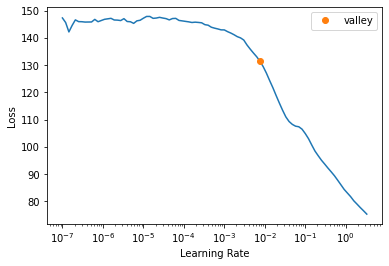

<Figure size 720x720 with 0 Axes>

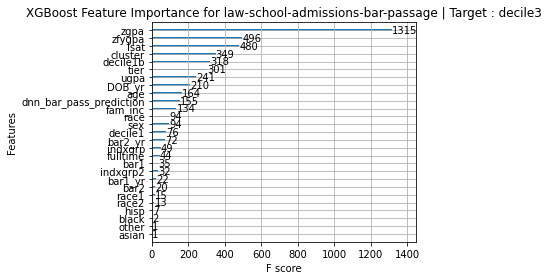

<Figure size 432x288 with 0 Axes>

In [16]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

    feature  importance
0    DOB_yr        1336
1   bar1_yr         511
2    zfygpa         120
3   decile1          50
4  decile1b         221


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

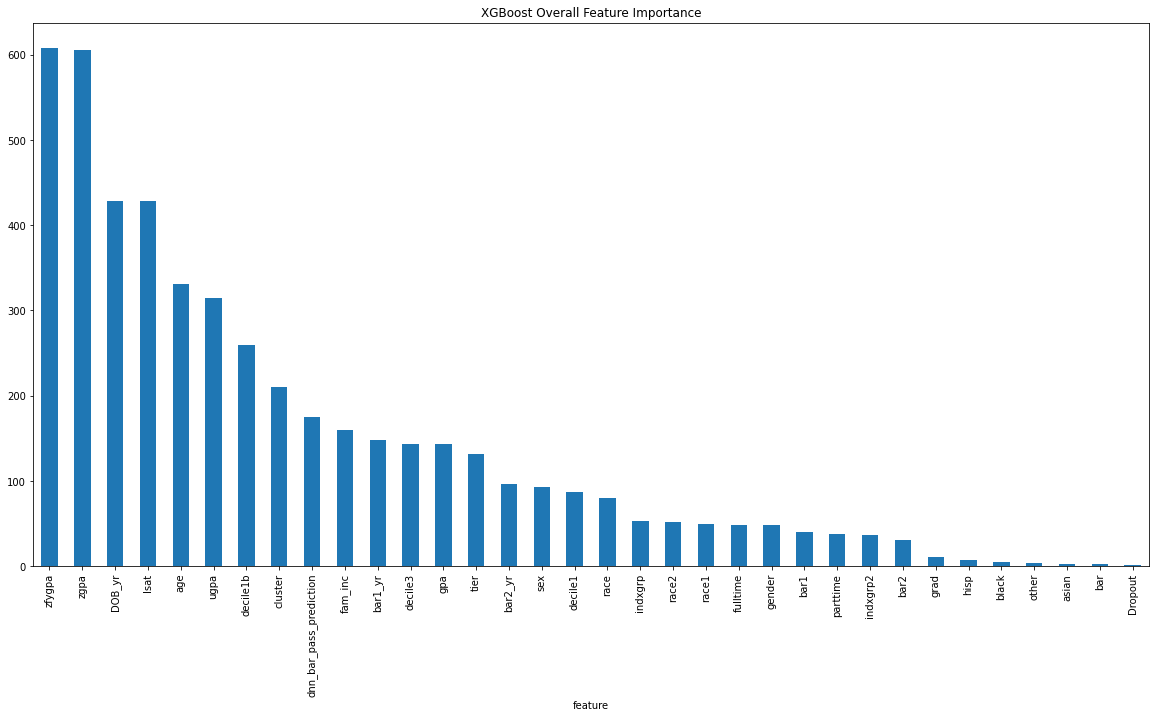

In [17]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [18]:
df.isna().sum()

decile1b                   0
decile3                    0
decile1                    0
sex                        0
race                       0
cluster                    0
lsat                       0
ugpa                       0
zfygpa                     0
DOB_yr                     0
grad                       0
zgpa                       0
bar1                       0
bar1_yr                    0
bar2                       0
bar2_yr                    0
fulltime                   0
fam_inc                    0
age                        0
gender                     0
parttime                   0
male                       0
race1                      0
race2                      0
Dropout                    0
other                      0
asian                      0
black                      0
hisp                       0
pass_bar                   0
bar                        0
bar_passed                 0
tier                       0
indxgrp                    0
indxgrp2      

# **To Be Continued...**